In [1]:
#Capston Project 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel('PD_modelling_dataset.xlsx')
df.head()

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0  4567129.0      0.0                    0.0                     0.0   
1  2635118.0      0.0                    0.0                     0.0   
2  4804232.0      0.0                    0.0                     0.0   
3  1442693.0      0.0                    0.0                     NaN   
4  4575322.0      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      NaN                       NaN   
4                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                               0.0          1.0                     1.0   
1                               NaN          1.0                     1.0   
2                               NaN          NaN                     NaN   
3                               NaN          NaN                     NaN   
4                               NaN          NaN                     NaN   

   acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0                       NaN  ...                14.0                 0.0   
1                       1.0  ...                19.0                 3.0   
2                       NaN  ...                 0.0                 3.0   
3                       NaN  ...                21.0                 0.0   
4                       NaN  ...                 0.0                 0.0   

   status_max_archived_0_6_months  status_max_archived_0_12_months  \
0                             1.0                              1.0   
1                             1.0                              2.0   
2                             1.0                              2.0   
3                             1.0                              1.0   
4                             1.0                              1.0   

   status_max_archived_0_24_months recovery_debt sum_capital_paid_acct_0_12m  \
0                              1.0           0.0                         0.0   
1                              2.0           0.0                         0.0   
2                              2.0           0.0                         0.0   
3                              1.0           0.0                         0.0   
4                              1.0           0.0                         0.0   

   sum_capital_paid_acct_12_24m  sum_paid_inv_0_12m  time_hours  
0                           0.0            178839.0    9.653333  
1                           0.0             49014.0   13.181389  
2                           0.0            124839.0   11.561944  
3                           0.0            324676.0   15.751111  
4                           0.0              7100.0   12.698611  

[5 rows x 36 columns]

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Get data types and basic statistics
data_info = df.info()
basic_stats = df.describe()

missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99977 non-null  float64
 1   default                           89977 non-null  float64
 2   acct_amt_added_12_24m             99977 non-null  float64
 3   acct_days_in_dc_12_24m            88141 non-null  float64
 4   acct_days_in_rem_12_24m           88141 non-null  float64
 5   acct_days_in_term_12_24m          88141 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 7   acct_status                       45604 non-null  float64
 8   acct_worst_status_0_3m            45604 non-null  float64
 9   acct_worst_status_12_24m          33216 non-null  float64
 10  acct_worst_status_3_6m            42275 non-null  float64
 11  acct_worst_status_6_12m           39627 non-null  float64
 12  age 

userid                                  2
default                             10002
acct_amt_added_12_24m                   2
acct_days_in_dc_12_24m              11838
acct_days_in_rem_12_24m             11838
acct_days_in_term_12_24m            11838
acct_incoming_debt_vs_paid_0_24m    59317
acct_status                         54375
acct_worst_status_0_3m              54375
acct_worst_status_12_24m            66763
acct_worst_status_3_6m              57704
acct_worst_status_6_12m             60352
age                                     2
avg_payment_span_0_12m              23838
avg_payment_span_0_3m               49307
merchant_category                       2
merchant_group                         11
has_paid                            11036
max_paid_inv_0_12m                  11036
max_paid_inv_0_24m                  11036
name_in_email                       11036
num_active_div_by_paid_inv_0_12m    29927
num_active_inv                      11036
num_arch_dc_0_12m                 

In [5]:
basic_stats

userid       default  acct_amt_added_12_24m  \
count  9.997700e+04  89977.000000           9.997700e+04   
mean   2.998947e+06      0.125454           1.225503e+04   
std    1.154211e+06     33.337757           3.548133e+04   
min    0.000000e+00      0.000000           0.000000e+00   
25%    2.000260e+06      0.000000           0.000000e+00   
50%    2.998815e+06      0.000000           0.000000e+00   
75%    4.000633e+06      0.000000           4.937000e+03   
max    4.999868e+06  10000.000000           1.128775e+06   

       acct_days_in_dc_12_24m  acct_days_in_rem_12_24m  \
count            88141.000000             88141.000000   
mean                 0.357325                 5.178850   
std                 40.287334                45.943401   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max              11836.000000             11836.000000   

       acct_days_in_term_12_24m  acct_incoming_debt_vs_paid_0_24m  \
count              88141.000000                      40662.000000   
mean                   0.421177                          2.789992   
std                   39.973774                        295.333975   
min                    0.000000                          0.000000   
25%                    0.000000                          0.000000   
50%                    0.000000                          0.152090   
75%                    0.000000                          0.662993   
max                11836.000000                      59315.000000   

        acct_status  acct_worst_status_0_3m  acct_worst_status_12_24m  ...  \
count  45604.000000            45604.000000              33216.000000  ...   
mean       2.234431                2.365165                  3.347212  ...   
std      254.608935              254.608589                366.303445  ...   
min        1.000000                1.000000                  1.000000  ...   
25%        1.000000                1.000000                  1.000000  ...   
50%        1.000000                1.000000                  1.000000  ...   
75%        1.000000                1.000000                  2.000000  ...   
max    54373.000000            54373.000000              66761.000000  ...   

       num_arch_ok_12_24m  num_arch_rem_0_12m  status_max_archived_0_6_months  \
count        88943.000000        88943.000000                    88943.000000   
mean             6.846576            0.483995                        0.821740   
std             16.067944            1.395611                        0.716644   
min              0.000000            0.000000                        0.000000   
25%              0.000000            0.000000                        0.000000   
50%              2.000000            0.000000                        1.000000   
75%              7.000000            0.000000                        1.000000   
max            313.000000           42.000000                        3.000000   

       status_max_archived_0_12_months  status_max_archived_0_24_months  \
count                     88943.000000                     88943.000000   
mean                          1.074182                         1.248193   
std                           0.776390                         0.820518   
min                           0.000000                         0.000000   
25%                           1.000000                         1.000000   
50%                           1.000000                         1.000000   
75%                           2.000000                         2.000000   
max                           5.000000                         5.000000   

       recovery_debt  sum_capital_paid_acct_0_12m  \
count   88943.000000                 88943.000000   
mean        3.601925                 10860.259886   
std       116.210849                 26630.618529   
min   

In [6]:
df.head()

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0  4567129.0      0.0                    0.0                     0.0   
1  2635118.0      0.0                    0.0                     0.0   
2  4804232.0      0.0                    0.0                     0.0   
3  1442693.0      0.0                    0.0                     NaN   
4  4575322.0      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      NaN                       NaN   
4                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                               0.0          1.0                     1.0   
1                               NaN          1.0                     1.0   
2                               NaN          NaN                     NaN   
3                               NaN          NaN                     NaN   
4                               NaN          NaN                     NaN   

   acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0                       NaN  ...                14.0                 0.0   
1                       1.0  ...                19.0                 3.0   
2                       NaN  ...                 0.0                 3.0   
3                       NaN  ...                21.0                 0.0   
4                       NaN  ...                 0.0                 0.0   

   status_max_archived_0_6_months  status_max_archived_0_12_months  \
0                             1.0                              1.0   
1                             1.0                              2.0   
2                             1.0                              2.0   
3                             1.0                              1.0   
4                             1.0                              1.0   

   status_max_archived_0_24_months recovery_debt sum_capital_paid_acct_0_12m  \
0                              1.0           0.0                         0.0   
1                              2.0           0.0                         0.0   
2                              2.0           0.0                         0.0   
3                              1.0           0.0                         0.0   
4                              1.0           0.0                         0.0   

   sum_capital_paid_acct_12_24m  sum_paid_inv_0_12m  time_hours  
0                           0.0            178839.0    9.653333  
1                           0.0             49014.0   13.181389  
2                           0.0            124839.0   11.561944  
3                           0.0            324676.0   15.751111  
4                           0.0              7100.0   12.698611  

[5 rows x 36 columns]

In [7]:
#number of rows and the number of columns

In [8]:
credit = df.copy() 

In [9]:
print('Total number of rows in the dataset:',credit.shape[0])
print('Total number of columns in the dataset:',credit.shape[1])

Total number of rows in the dataset: 99979
Total number of columns in the dataset: 36


In [10]:
credit.columns


Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [11]:
# Check for missing values
missing_values = df.isnull().sum()

# Get data types and basic statistics
data_info = df.info()
basic_stats = df.describe()

missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99977 non-null  float64
 1   default                           89977 non-null  float64
 2   acct_amt_added_12_24m             99977 non-null  float64
 3   acct_days_in_dc_12_24m            88141 non-null  float64
 4   acct_days_in_rem_12_24m           88141 non-null  float64
 5   acct_days_in_term_12_24m          88141 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 7   acct_status                       45604 non-null  float64
 8   acct_worst_status_0_3m            45604 non-null  float64
 9   acct_worst_status_12_24m          33216 non-null  float64
 10  acct_worst_status_3_6m            42275 non-null  float64
 11  acct_worst_status_6_12m           39627 non-null  float64
 12  age 

userid                                  2
default                             10002
acct_amt_added_12_24m                   2
acct_days_in_dc_12_24m              11838
acct_days_in_rem_12_24m             11838
acct_days_in_term_12_24m            11838
acct_incoming_debt_vs_paid_0_24m    59317
acct_status                         54375
acct_worst_status_0_3m              54375
acct_worst_status_12_24m            66763
acct_worst_status_3_6m              57704
acct_worst_status_6_12m             60352
age                                     2
avg_payment_span_0_12m              23838
avg_payment_span_0_3m               49307
merchant_category                       2
merchant_group                         11
has_paid                            11036
max_paid_inv_0_12m                  11036
max_paid_inv_0_24m                  11036
name_in_email                       11036
num_active_div_by_paid_inv_0_12m    29927
num_active_inv                      11036
num_arch_dc_0_12m                 

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the missing value percentages
missing_percentage.sort_values(ascending=False)


acct_worst_status_12_24m            66.777023
acct_worst_status_6_12m             60.364677
acct_incoming_debt_vs_paid_0_24m    59.329459
acct_worst_status_3_6m              57.716120
acct_worst_status_0_3m              54.386421
acct_status                         54.386421
avg_payment_span_0_3m               49.317357
num_active_div_by_paid_inv_0_12m    29.933286
avg_payment_span_0_12m              23.843007
acct_days_in_dc_12_24m              11.840487
acct_days_in_rem_12_24m             11.840487
acct_days_in_term_12_24m            11.840487
num_arch_rem_0_12m                  11.038318
max_paid_inv_0_12m                  11.038318
status_max_archived_0_12_months     11.038318
num_arch_ok_12_24m                  11.038318
status_max_archived_0_6_months      11.038318
sum_capital_paid_acct_12_24m        11.038318
status_max_archived_0_24_months     11.038318
recovery_debt                       11.038318
sum_capital_paid_acct_0_12m         11.038318
num_arch_dc_12_24m                

In [13]:
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99977 non-null  float64
 1   default                           89977 non-null  float64
 2   acct_amt_added_12_24m             99977 non-null  float64
 3   acct_days_in_dc_12_24m            88141 non-null  float64
 4   acct_days_in_rem_12_24m           88141 non-null  float64
 5   acct_days_in_term_12_24m          88141 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 7   acct_status                       45604 non-null  float64
 8   acct_worst_status_0_3m            45604 non-null  float64
 9   acct_worst_status_12_24m          33216 non-null  float64
 10  acct_worst_status_3_6m            42275 non-null  float64
 11  acct_worst_status_6_12m           39627 non-null  float64
 12  age 

In [14]:
#Checking for duplicates:

In [15]:
if credit.duplicated().sum()==0:
    print('There are no duplicate rows in the dataset.')
else:
    print('Total number of duplicate rows in the dataset :',credit.duplicated().sum())

Total number of duplicate rows in the dataset : 1


In [16]:
credit.drop_duplicates(inplace=True)


In [17]:
cat = credit.select_dtypes(include=['object']).columns
credit[cat].describe().T

count unique                        top   freq
merchant_category  99977     58  Diversified entertainment  38614
merchant_group     99968     13              Entertainment  48779
name_in_email      88943      9                        F+L  35822

In [18]:
continuous = credit.select_dtypes(include=['float64']).columns
credit[continuous].describe().T

count          mean           std  min  \
userid                            99977.0  2.998947e+06  1.154211e+06  0.0   
default                           89977.0  1.254543e-01  3.333776e+01  0.0   
acct_amt_added_12_24m             99977.0  1.225503e+04  3.548133e+04  0.0   
acct_days_in_dc_12_24m            88141.0  3.573252e-01  4.028733e+01  0.0   
acct_days_in_rem_12_24m           88141.0  5.178850e+00  4.594340e+01  0.0   
acct_days_in_term_12_24m          88141.0  4.211774e-01  3.997377e+01  0.0   
acct_incoming_debt_vs_paid_0_24m  40662.0  2.789992e+00  2.953340e+02  0.0   
acct_status                       45604.0  2.234431e+00  2.546089e+02  1.0   
acct_worst_status_0_3m            45604.0  2.365165e+00  2.546086e+02  1.0   
acct_worst_status_12_24m          33216.0  3.347212e+00  3.663034e+02  1.0   
acct_worst_status_3_6m            42275.0  2.550183e+00  2.806343e+02  1.0   
acct_worst_status_6_12m           39627.0  2.776062e+00  3.031610e+02  1.0   
age                               99977.0  3.601592e+01  1.300174e+01  0.0   
avg_payment_span_0_12m            76141.0  1.828429e+01  8.725376e+01  0.0   
avg_payment_span_0_3m             50672.0  1.596251e+01  2.192071e+02  0.0   
has_paid                          88943.0  8.657455e-01  3.409275e-01  0.0   
max_paid_inv_0_12m                88943.0  9.362712e+03  1.367242e+04  0.0   
max_paid_inv_0_24m                88943.0  1.141961e+04  1.543171e+04  0.0   
num_active_div_by_paid_inv_0_12m  70052.0  3.818166e-01  7.137492e+01  0.0   
num_active_inv                    88943.0  6.259852e-01  1.610529e+00  0.0   
num_arch_dc_0_12m                 88943.0  6.261313e-02  3.821109e-01  0.0   
num_arch_dc_12_24m                88943.0  5.922894e-02  3.623208e-01  0.0   
num_arch_ok_0_12m                 88943.0  7.786448e+00  1.674280e+01  0.0   
num_arch_ok_12_24m                88943.0  6.846576e+00  1.606794e+01  0.0   
num_arch_rem_0_12m                88943.0  4.839954e-01  1.395611e+00  0.0   
status_max_archived_0_6_months    88943.0  8.217398e-01  7.166438e-01  0.0   
status_max_archived_0_12_months   88943.0  1.074182e+00  7.763897e-01  0.0   
status_max_archived_0_24_months   88943.0  1.248193e+00  8.205178e-01  0.0   
recovery_debt                     88943.0  3.601925e+00  1.162108e+02  0.0   
sum_capital_paid_acct_0_12m       88943.0  1.086026e+04  2.663062e+04  0.0   
sum_capital_paid_acct_12_24m      88943.0  6.614946e+03  1.924381e+04  0.0   
sum_paid_inv_0_12m                88943.0  4.103591e+04  9.459642e+04  0.0   
time_hours                        88943.0  1.534165e+01  5.030877e+00  0.0   

                                           25%           50%           75%  \
userid                            2.000260e+06  2.998815e+06  4.000633e+06   
default                           0.000000e+00  0.000000e+00  0.000000e+00   
acct_amt_added_12_24m             0.000000e+00  0.000000e+00  4.937000e+03   
acct_days_in_dc_12_24m            0.000000e+00  0.000000e+00  0.000000e+00   
acct_days_in_rem_12_24m           0.000000e+00  0.000000e+00  0.000000e+00   
acct_days_in_term_12_24m          0.000000e+00  0.000000e+00  0.000000e+00   
acct_incoming_debt_vs_paid_0_24m  0.000000e+00  1.520899e-01  6.629926e-01   
acct_status                       1.000000e+00  1.000000e+00  1.000000e+00   
acct_worst_status_0_3m            1.000000e+00  1.000000e+00  1.000000e+00   
acct_worst_status_12_24m          1.000000e+00  1.000000e+00  2.000000e+00   
acct_worst_status_3_6m            1.000000e+00  1.000000e+00  1.000000e+00   
acct_worst_status_6_12m           1.000000e+00  1.000000e+00  1.000000e+00   
age                               2.500000e+01  3.400000e+01  4.500000e+01   
avg_payment_span_0_12m            1.080000e+01  1.490909e+01  2.100000e+01   
avg_payment_span_0_3m             8.400000e+00  1.300000e+01  1.828571e+01   
has_paid                          1.000000e+00  1.000000e+00  1.000000e+00   
max_paid_inv_0_12m                2.387500e+03  6.170000e

In [19]:
# Select continuous columns
continuous = credit.select_dtypes(include=['float64']).columns

# Describe the continuous columns and round to 2 decimal places
continuous_summary = credit[continuous].describe().T.round(2)

# Display the summary
continuous_summary


count        mean         std  min  \
userid                            99977.0  2998946.73  1154210.60  0.0   
default                           89977.0        0.13       33.34  0.0   
acct_amt_added_12_24m             99977.0    12255.03    35481.33  0.0   
acct_days_in_dc_12_24m            88141.0        0.36       40.29  0.0   
acct_days_in_rem_12_24m           88141.0        5.18       45.94  0.0   
acct_days_in_term_12_24m          88141.0        0.42       39.97  0.0   
acct_incoming_debt_vs_paid_0_24m  40662.0        2.79      295.33  0.0   
acct_status                       45604.0        2.23      254.61  1.0   
acct_worst_status_0_3m            45604.0        2.37      254.61  1.0   
acct_worst_status_12_24m          33216.0        3.35      366.30  1.0   
acct_worst_status_3_6m            42275.0        2.55      280.63  1.0   
acct_worst_status_6_12m           39627.0        2.78      303.16  1.0   
age                               99977.0       36.02       13.00  0.0   
avg_payment_span_0_12m            76141.0       18.28       87.25  0.0   
avg_payment_span_0_3m             50672.0       15.96      219.21  0.0   
has_paid                          88943.0        0.87        0.34  0.0   
max_paid_inv_0_12m                88943.0     9362.71    13672.42  0.0   
max_paid_inv_0_24m                88943.0    11419.61    15431.71  0.0   
num_active_div_by_paid_inv_0_12m  70052.0        0.38       71.37  0.0   
num_active_inv                    88943.0        0.63        1.61  0.0   
num_arch_dc_0_12m                 88943.0        0.06        0.38  0.0   
num_arch_dc_12_24m                88943.0        0.06        0.36  0.0   
num_arch_ok_0_12m                 88943.0        7.79       16.74  0.0   
num_arch_ok_12_24m                88943.0        6.85       16.07  0.0   
num_arch_rem_0_12m                88943.0        0.48        1.40  0.0   
status_max_archived_0_6_months    88943.0        0.82        0.72  0.0   
status_max_archived_0_12_months   88943.0        1.07        0.78  0.0   
status_max_archived_0_24_months   88943.0        1.25        0.82  0.0   
recovery_debt                     88943.0        3.60      116.21  0.0   
sum_capital_paid_acct_0_12m       88943.0    10860.26    26630.62  0.0   
sum_capital_paid_acct_12_24m      88943.0     6614.95    19243.81  0.0   
sum_paid_inv_0_12m                88943.0    41035.91    94596.42  0.0   
time_hours                        88943.0       15.34        5.03  0.0   

                                         25%         50%         75%  \
userid                            2000260.00  2998815.00  4000633.00   
default                                 0.00        0.00        0.00   
acct_amt_added_12_24m                   0.00        0.00     4937.00   
acct_days_in_dc_12_24m                  0.00        0.00        0.00   
acct_days_in_rem_12_24m                 0.00        0.00        0.00   
acct_days_in_term_12_24m                0.00        0.00        0.00   
acct_incoming_debt_vs_paid_0_24m        0.00        0.15        0.66   
acct_status                             1.00        1.00        1.00   
acct_worst_status_0_3m                  1.00        1.00        1.00   
acct_worst_status_12_24m                1.00        1.00        2.00   
acct_worst_status_3_6m                  1.00        1.00        1.00   
acct_worst_status_6_12m                 1.00        1.00        1.00   
age                                    25.00       34.00       45.00   
avg_payment_span_0_12m                 10.80       14.91       21.00   
avg_payment_span_0_3m                   8.40       13.00       18.29   
has_paid                                1.00        1.00        1.00   
max_paid_inv_0_12m                   2387.50     6170.00    11400.00   
max_paid_inv_0_24m                   3685.00     7720.00    13865.00   
num_active_div_by_paid_inv_0_12m        0.00        0.00        0.10   
num_active_inv                          0.00        0.00        1.00   
num_arc

In [20]:
for i in credit.columns:
    print('Count of',i)
    print('================================')
    print(credit[i].value_counts(),'\n')
    print('Proportion of',i)
    print('========================')
    print(credit[i].value_counts(normalize=True),'\n\n')

Count of userid
1391263.0    3
3680051.0    3
3143346.0    3
3111808.0    3
4086262.0    3
            ..
3712738.0    1
1649459.0    1
1562210.0    1
3158445.0    1
0.0          1
Name: userid, Length: 98723, dtype: int64 

Proportion of userid
1391263.0    0.00003
3680051.0    0.00003
3143346.0    0.00003
3111808.0    0.00003
4086262.0    0.00003
              ...   
3712738.0    0.00001
1649459.0    0.00001
1562210.0    0.00001
3158445.0    0.00001
0.0          0.00001
Name: userid, Length: 98723, dtype: float64 


Count of default
0.0        88688
1.0         1288
10000.0        1
Name: default, dtype: int64 

Proportion of default
0.0        0.985674
1.0        0.014315
10000.0    0.000011
Name: default, dtype: float64 


Count of acct_amt_added_12_24m
0.0        71363
50.0          34
30.0          34
90.0          25
60.0          22
           ...  
11310.0        1
10441.0        1
35425.0        1
80124.0        1
45671.0        1
Name: acct_amt_added_12_24m, Length: 23721, d

0.0      0.256243
1.0      0.138212
2.0      0.098951
3.0      0.074351
4.0      0.058869
           ...   
152.0    0.000011
199.0    0.000011
154.0    0.000011
236.0    0.000011
191.0    0.000011
Name: num_arch_ok_0_12m, Length: 201, dtype: float64 


Count of num_arch_ok_12_24m
0.0      31911
1.0       9729
2.0       7442
3.0       5649
4.0       4380
         ...  
249.0        1
269.0        1
172.0        1
173.0        1
161.0        1
Name: num_arch_ok_12_24m, Length: 200, dtype: int64 

Proportion of num_arch_ok_12_24m
0.0      0.358780
1.0      0.109385
2.0      0.083672
3.0      0.063513
4.0      0.049245
           ...   
249.0    0.000011
269.0    0.000011
172.0    0.000011
173.0    0.000011
161.0    0.000011
Name: num_arch_ok_12_24m, Length: 200, dtype: float64 


Count of num_arch_rem_0_12m
0.0     67809
1.0     12195
2.0      4338
3.0      2096
4.0       997
5.0       553
6.0       298
7.0       204
8.0       105
9.0        73
11.0       39
10.0       37
13.0       37
1

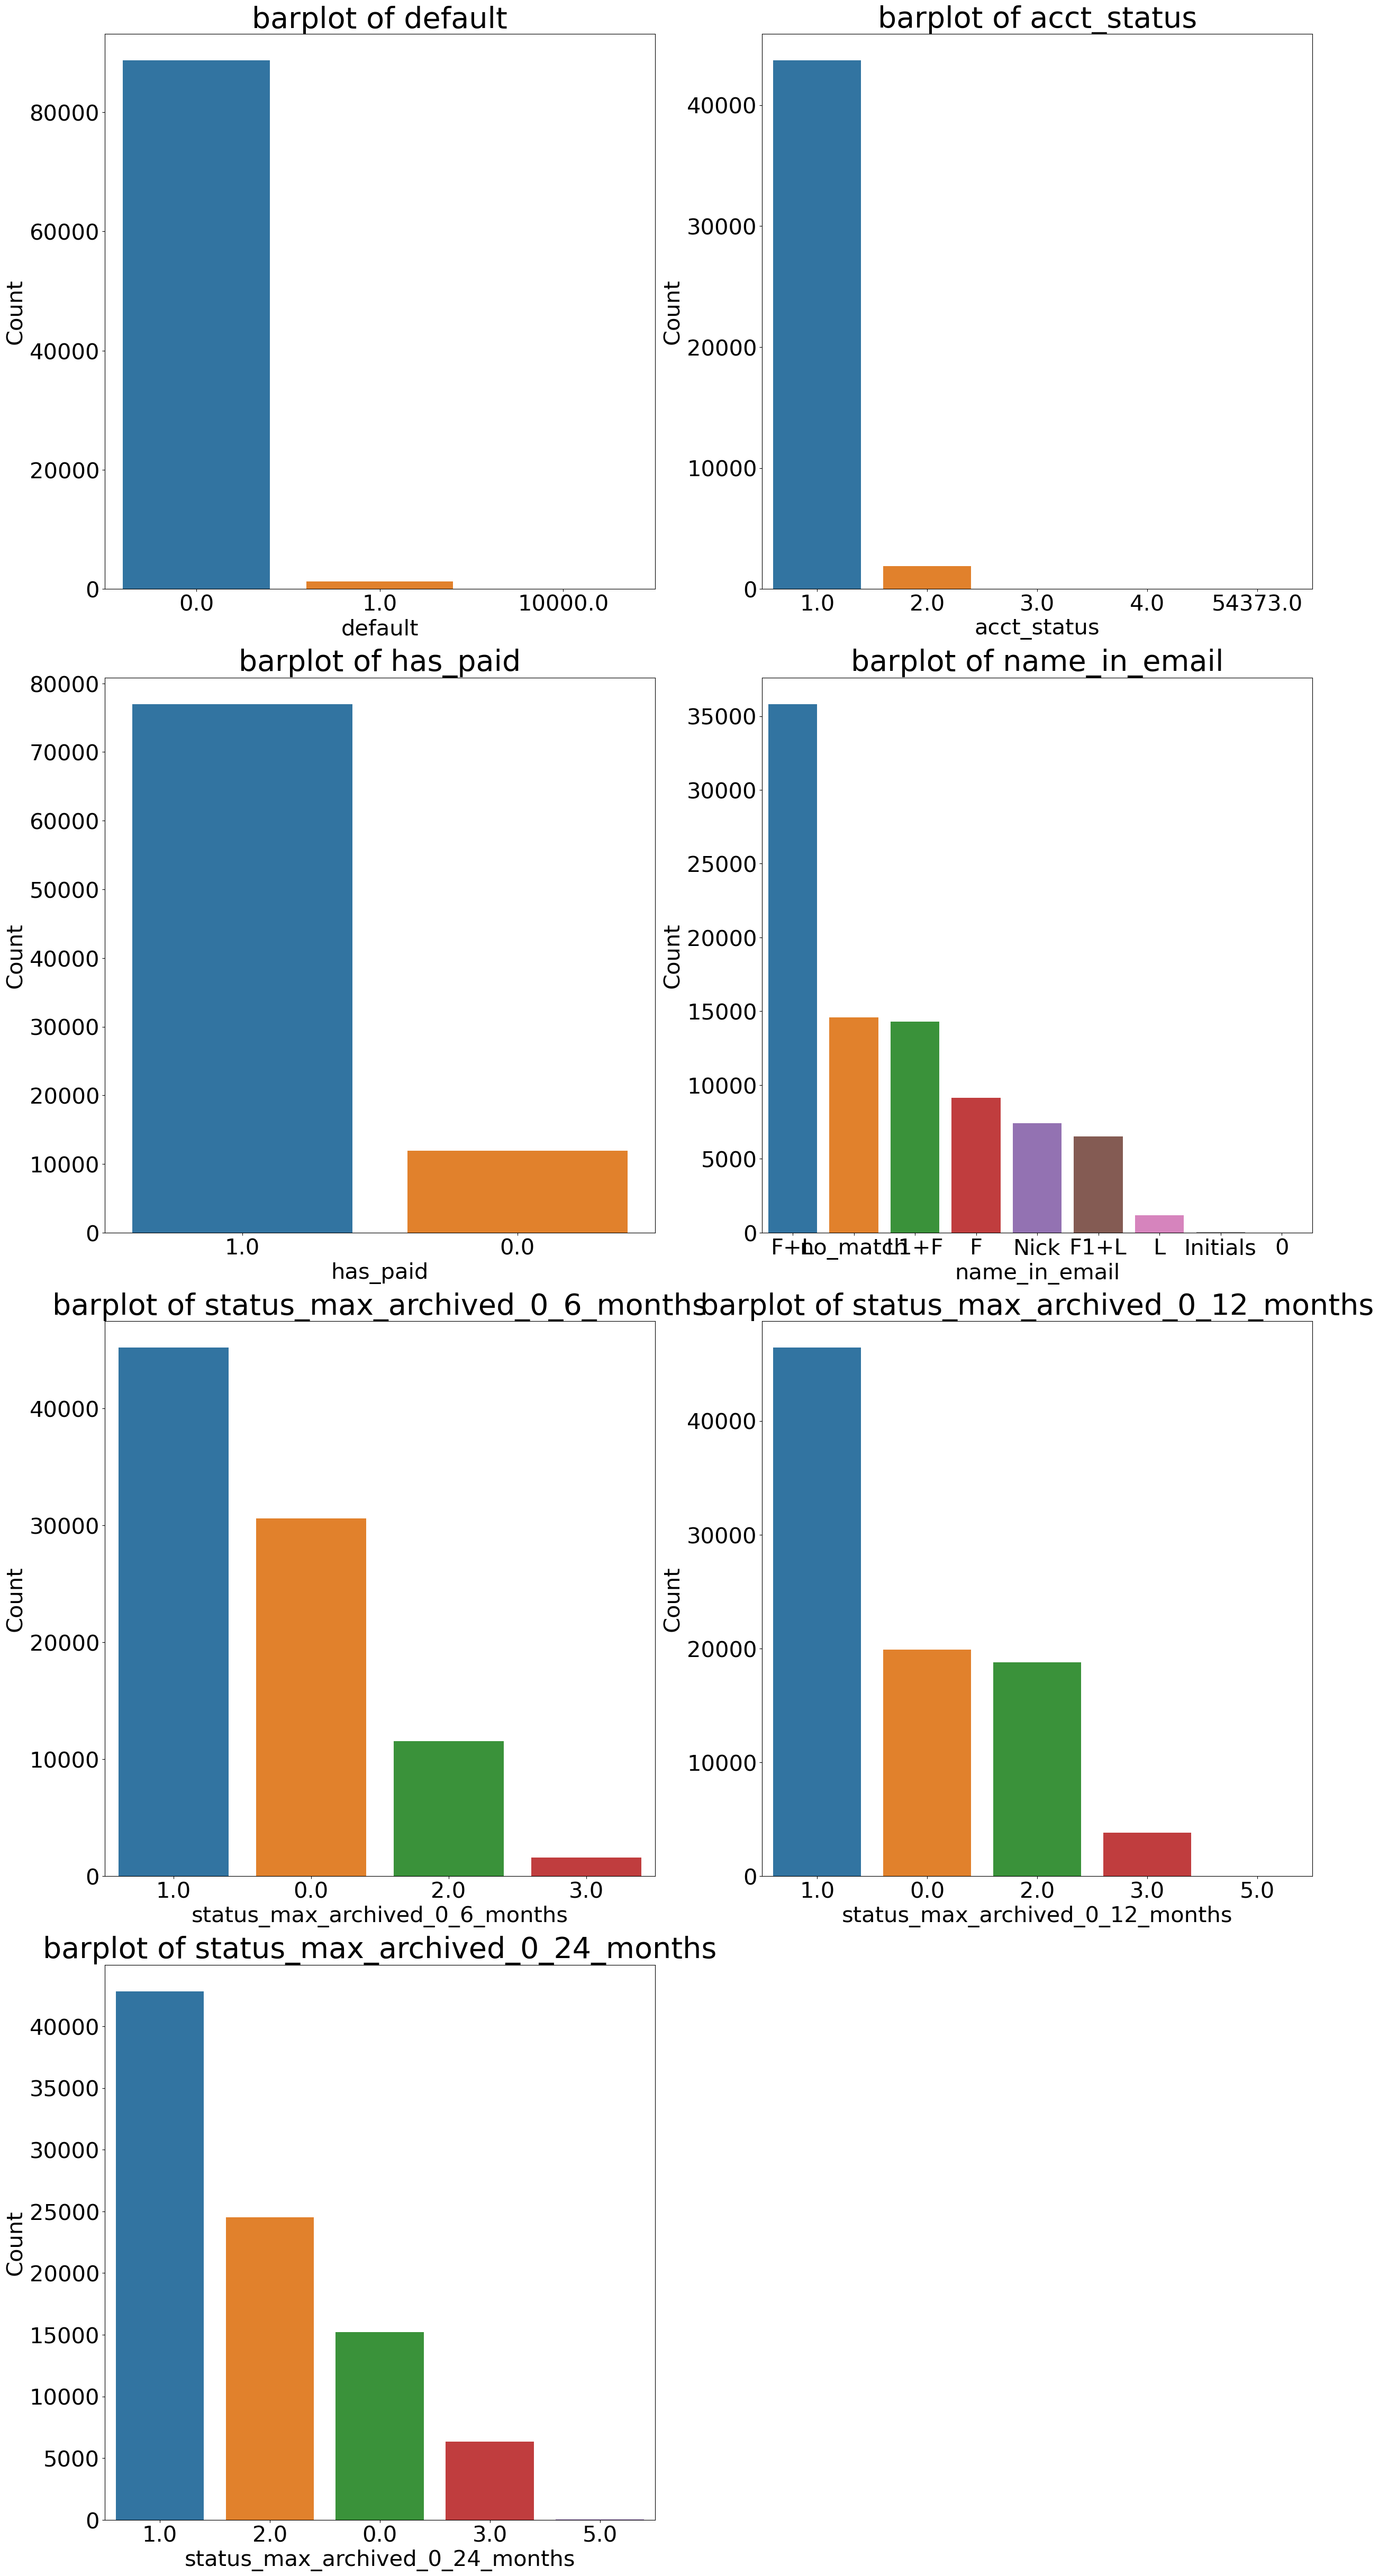

In [21]:
cat = ['default','acct_status','has_paid','name_in_email','status_max_archived_0_6_months',
       'status_max_archived_0_12_months','status_max_archived_0_24_months']

#plt.figure(figsize=(26,20))
plt.figure(figsize=(25,60))
a=1
for i in cat:
    plt.subplot(5,2,a)
    a=a+1
    sns.countplot(data=credit, x=credit[i], order=credit[i].value_counts().sort_values(ascending=False).index)
    plt.title('barplot of {}'.format(i), fontsize= 40)
    plt.xlabel(i, fontsize=30)
    plt.ylabel('Count', fontsize=30) 
    plt.tick_params(axis='both', which='both', labelsize=30) 
    plt.tight_layout()

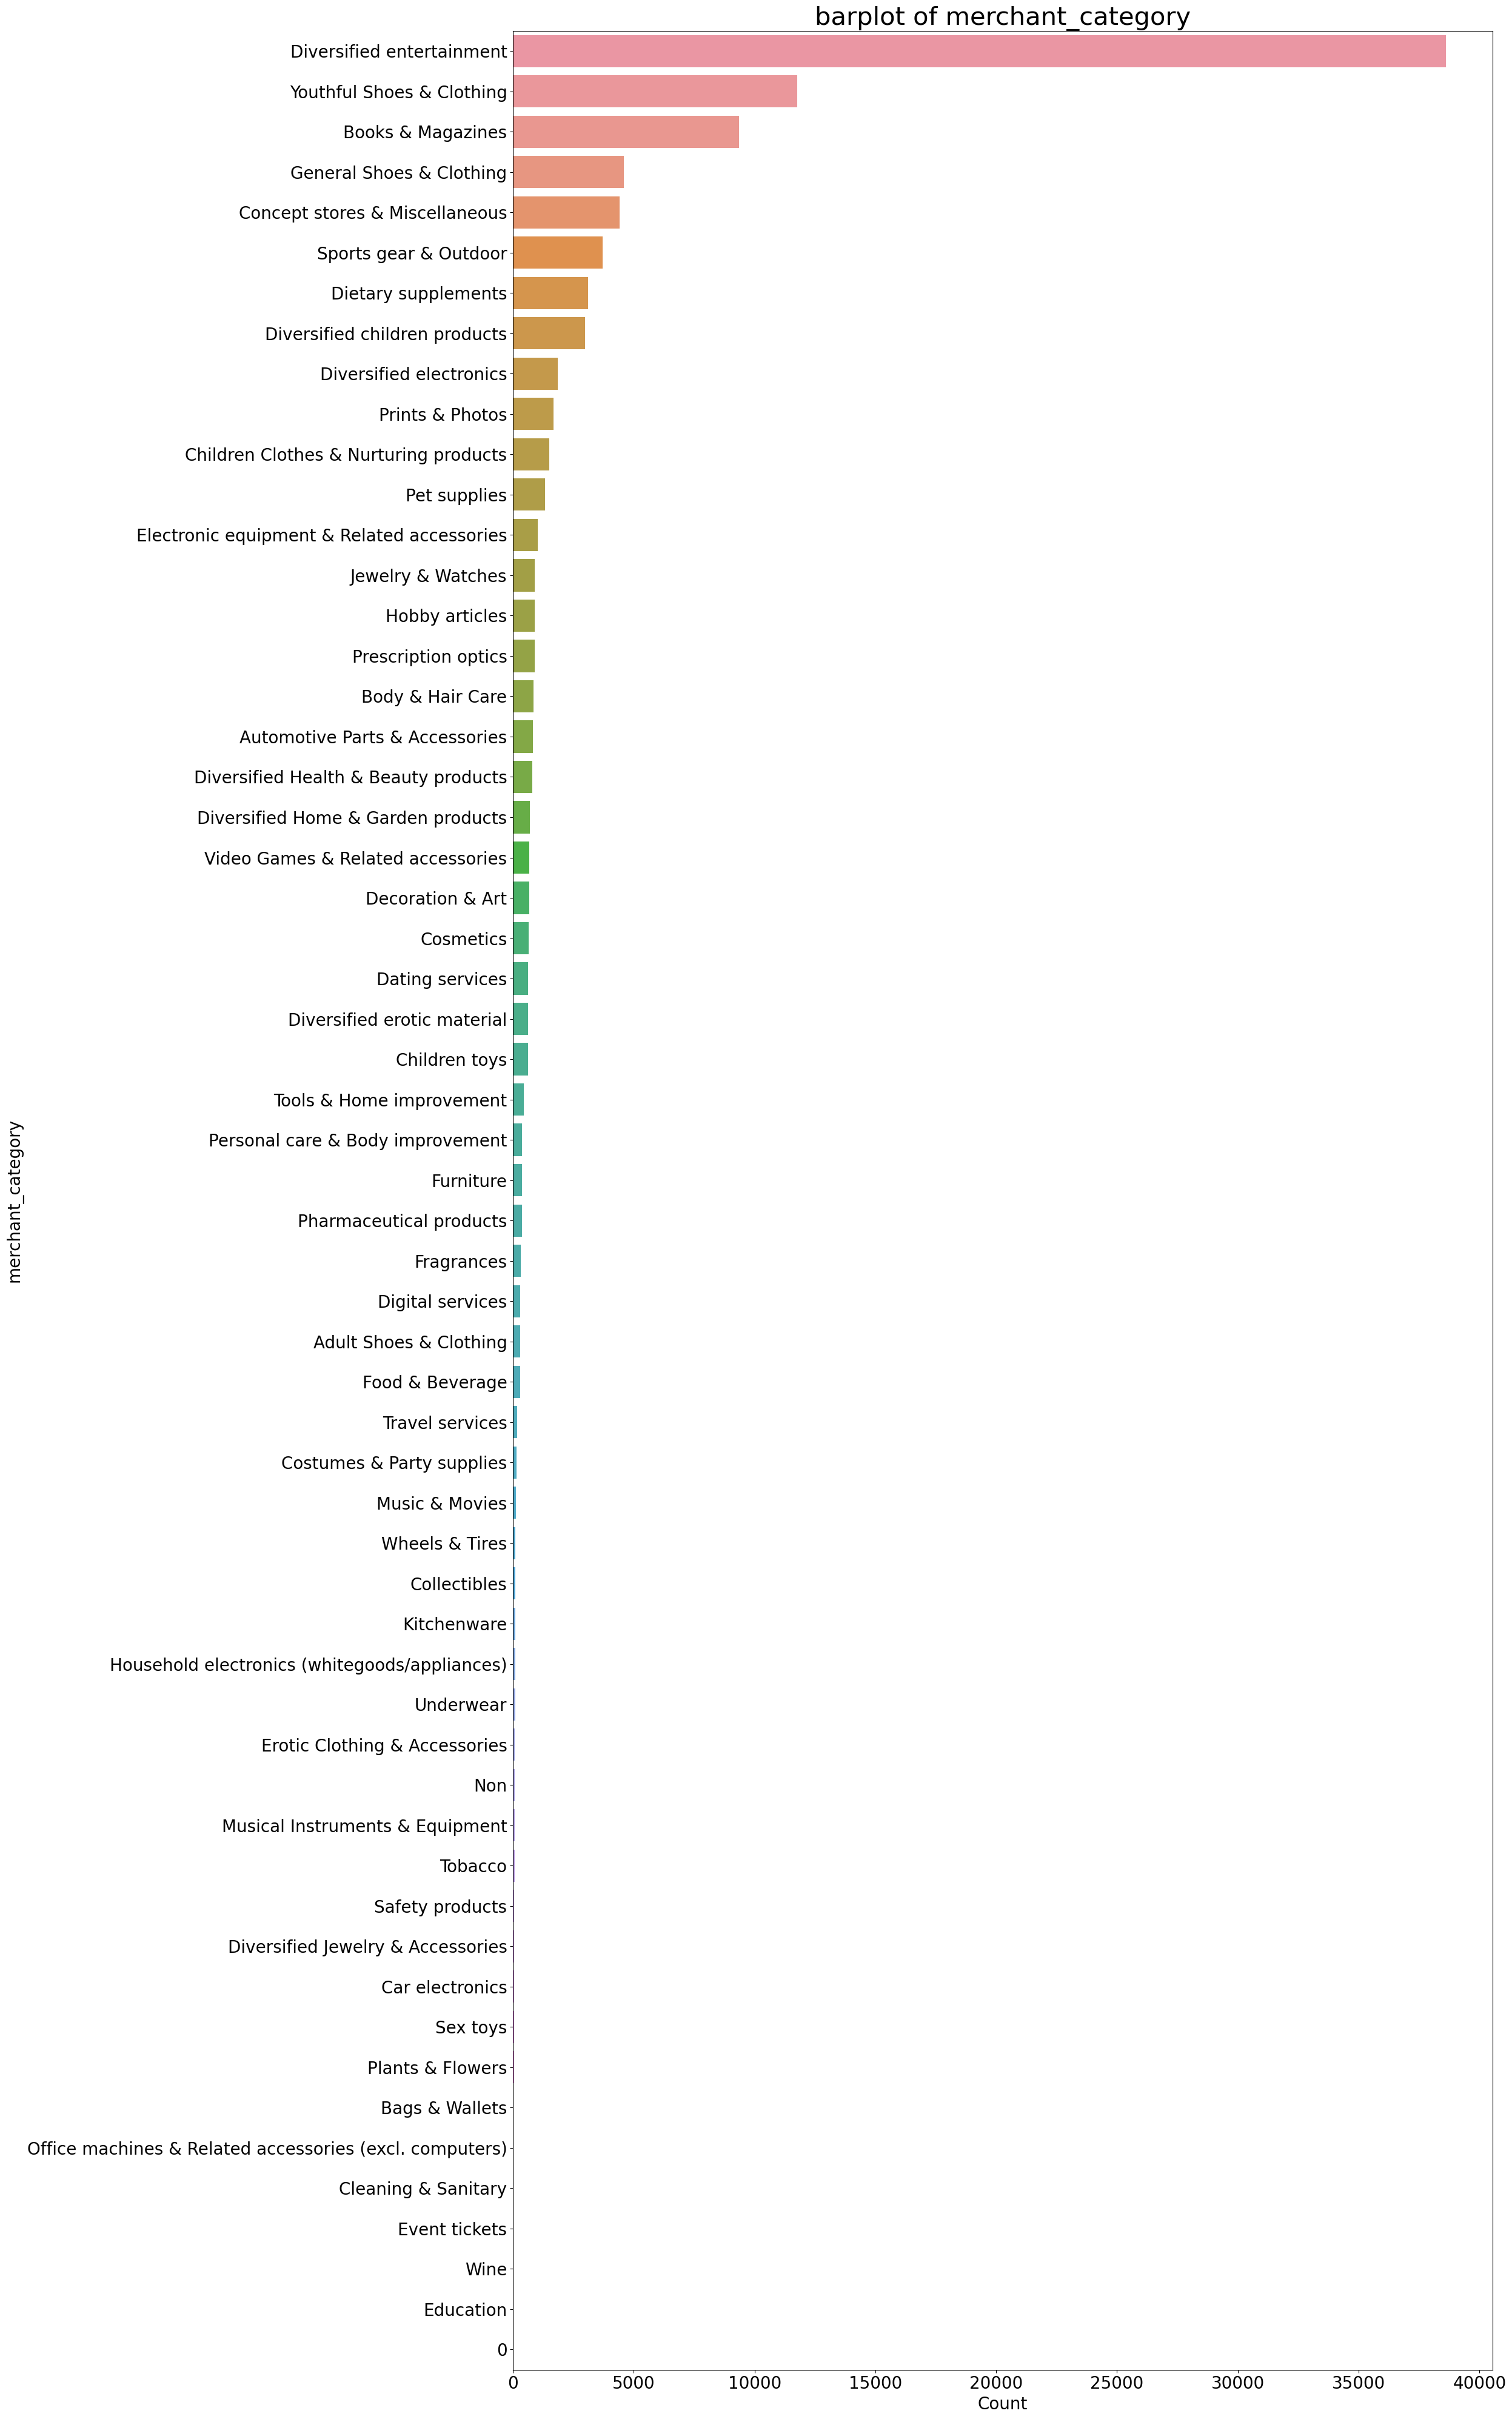

In [22]:
plt.figure(figsize=(25,40))
sns.countplot(data=credit, y='merchant_category', order=credit['merchant_category'].value_counts().sort_values(ascending=False).index)
plt.title('barplot of merchant_category', fontsize= 30)
plt.ylabel('merchant_category', fontsize=20)
plt.xlabel('Count', fontsize=20) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.tight_layout()

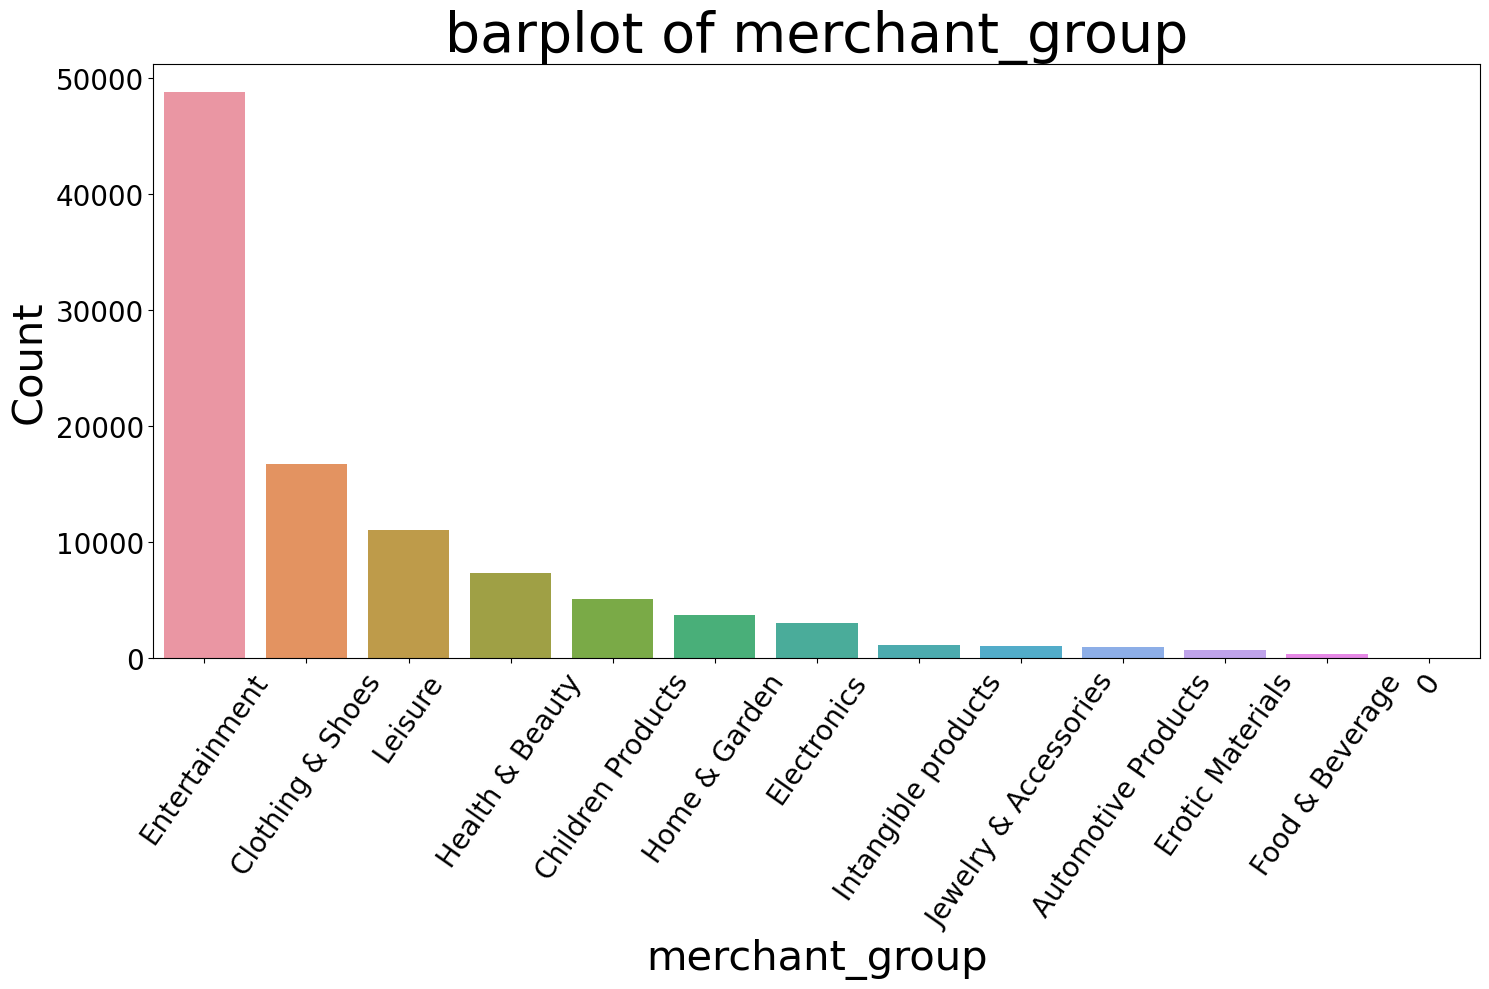

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=credit, x='merchant_group', order=credit['merchant_group'].value_counts().sort_values(ascending=False).index)
plt.title('barplot of merchant_group', fontsize= 40)
plt.xlabel('merchant_group', fontsize=30)
plt.ylabel('Count', fontsize=30) 
plt.xticks(rotation = 55, fontsize=20) 
plt.yticks(fontsize=20) 
plt.tight_layout()

/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

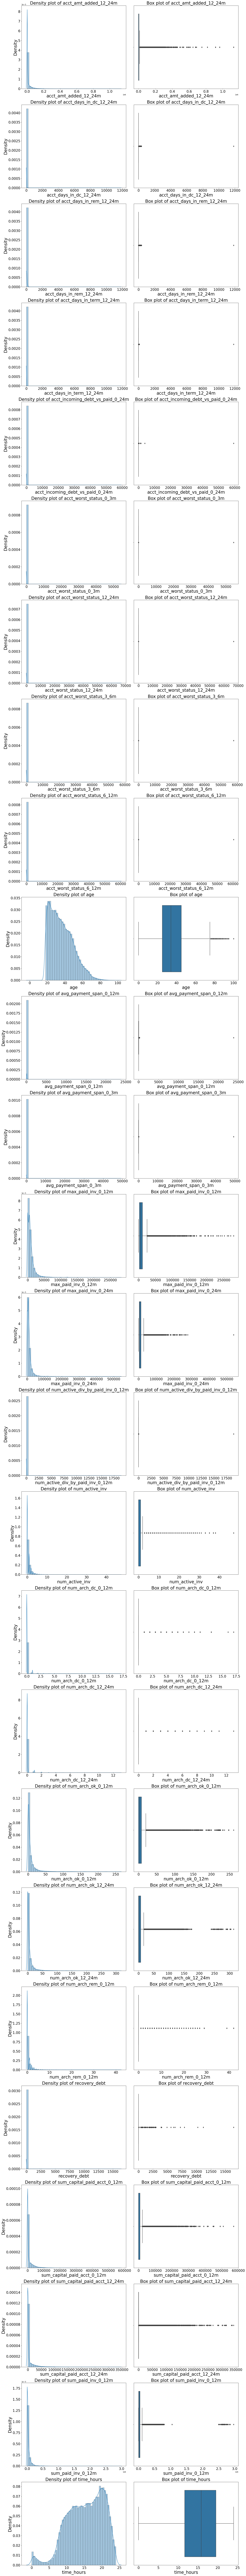

In [24]:
# List of continuous variables
continuous_vars = ['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m','num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours']

# Set the figure dimensions
fig_dims = (20, 8 * len(continuous_vars))

# Create subplots for each continuous variable
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=2, figsize=fig_dims)

# Iterate through continuous variables
for i, var in enumerate(continuous_vars):
    # Histogram
    sns.distplot(credit[var], kde=True, ax=axes[i, 0], hist_kws={"edgecolor": "black"})
    axes[i, 0].set_title('Density plot of {}'.format(var), fontsize= 25)
    axes[i, 0].set_xlabel(var, fontsize=25)
    axes[i, 0].set_ylabel('Density', fontsize=25) 
    axes[i, 0].tick_params(axis='both', which='both', labelsize=20) 

    
    
    # Box plot
    sns.boxplot(x=var, data=credit, ax=axes[i, 1])
    axes[i, 1].set_title('Box plot of {}'.format(var), fontsize= 25)
    axes[i, 1].set_xlabel(var, fontsize=25)
    axes[i, 1].tick_params(axis='both', which='both', labelsize=20) 


plt.tight_layout()
plt.show()

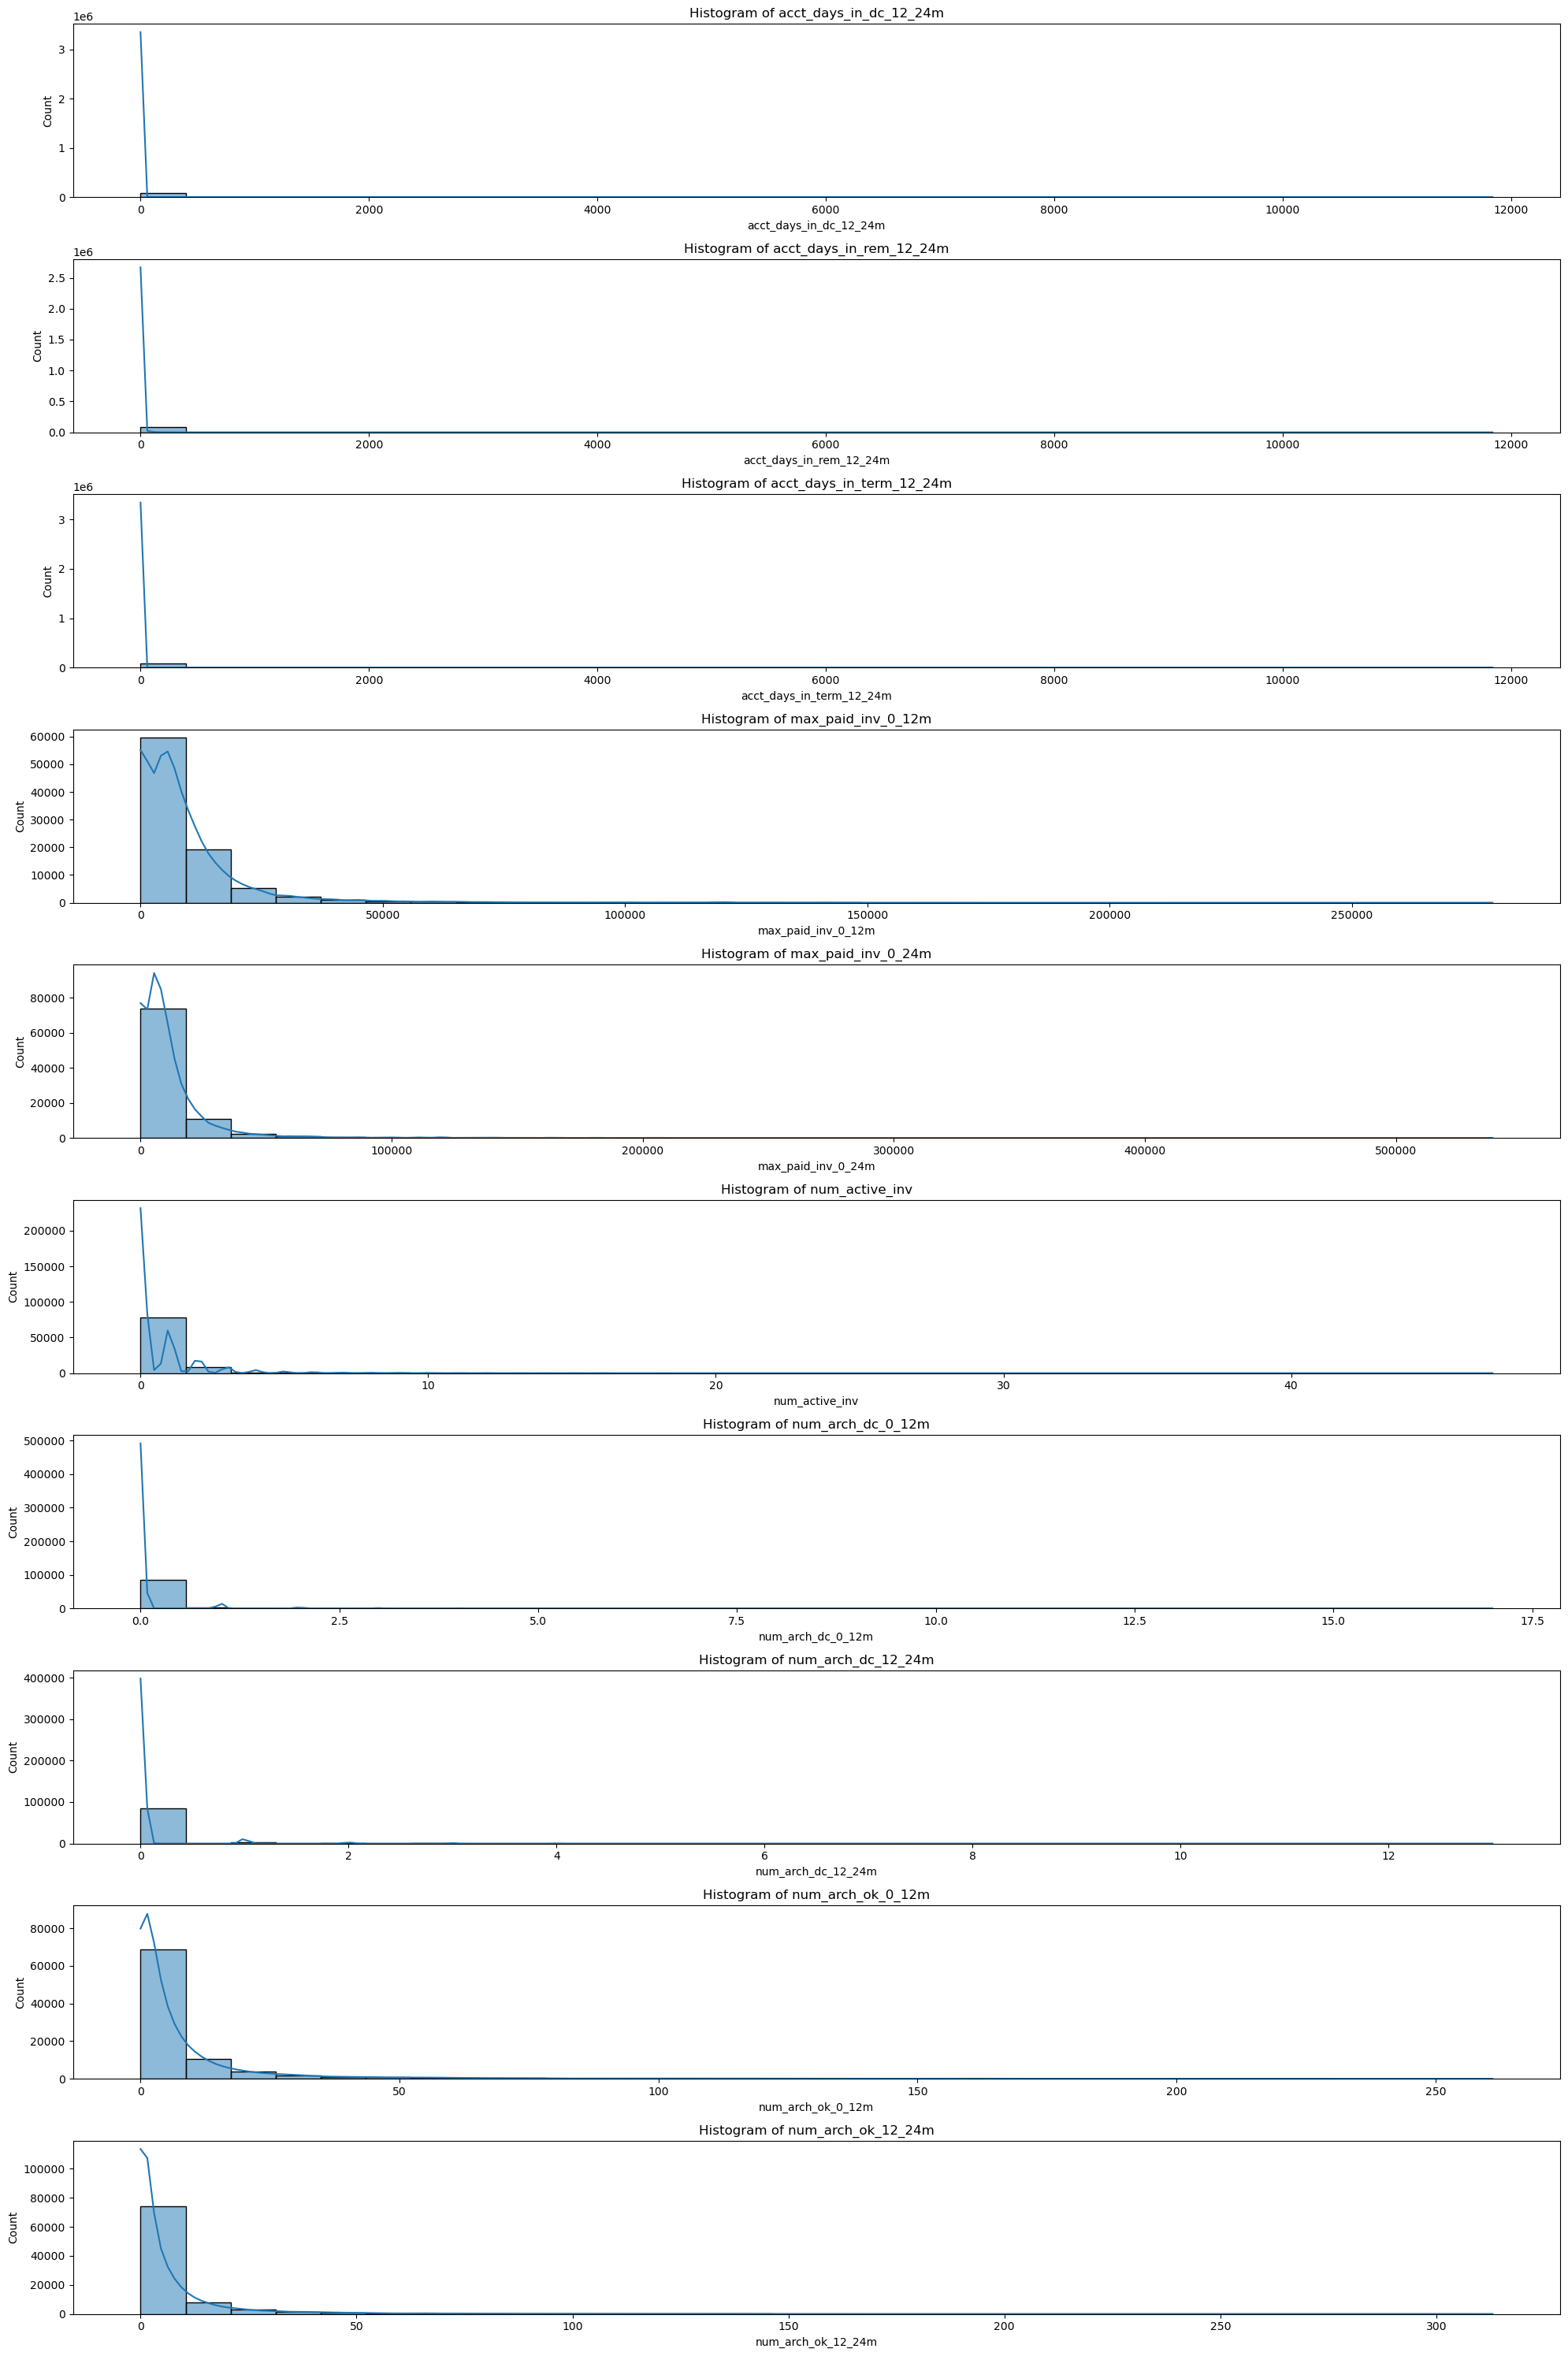

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical (continuous) attributes
numerical_vars = ['acct_days_in_dc_12_24m', 'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 
                  'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_inv', 'num_arch_dc_0_12m', 
                  'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m', ]

# Set the size of the plots
plt.figure(figsize=(20, 30))

# Generate histograms for each numerical attribute
for i, var in enumerate(numerical_vars):
    plt.subplot(len(numerical_vars), 1, i + 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()


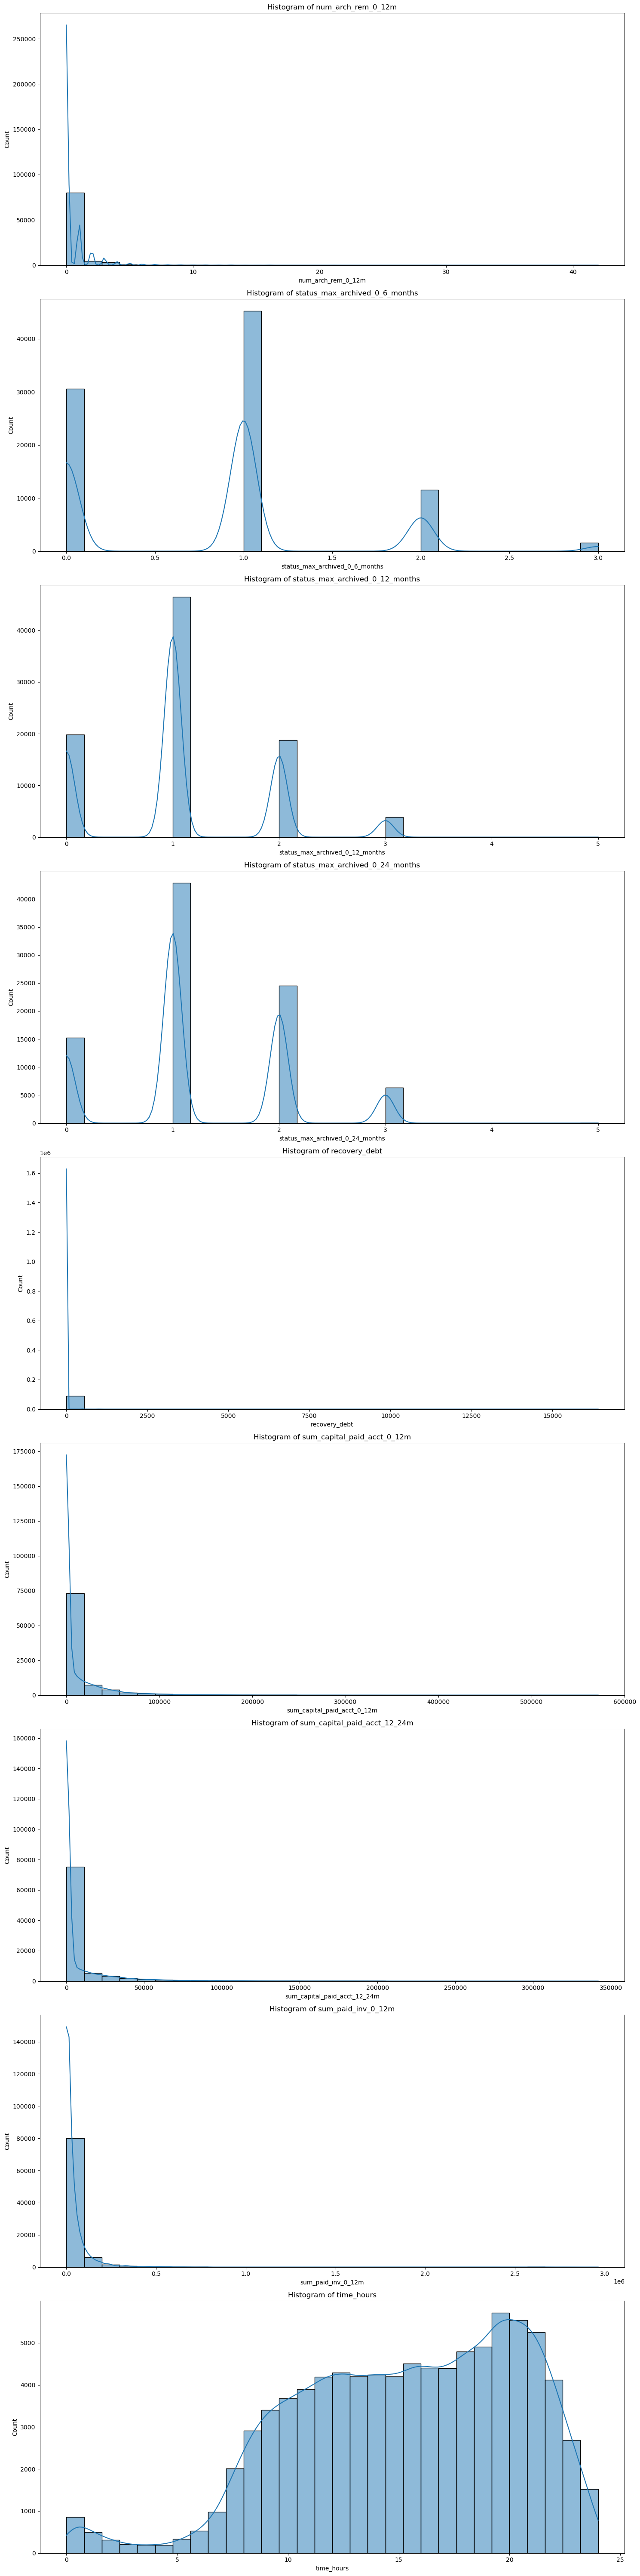

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical (continuous) attributes
numerical_vars = ['num_arch_rem_0_12m', 
                  'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months', 
                  'recovery_debt', 'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m', 'sum_paid_inv_0_12m', 'time_hours' , ]

# Set the size of the plots
plt.figure(figsize=(15, 60))

# Generate histograms for each numerical attribute
for i, var in enumerate(numerical_vars):
    plt.subplot(len(numerical_vars), 1, i + 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()


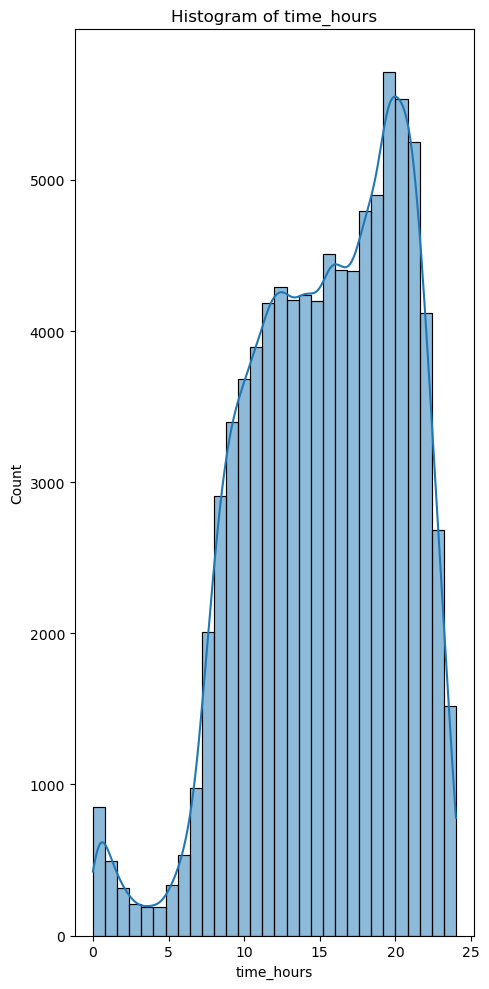

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical (continuous) attributes
numerical_vars = ['time_hours']

# Set the size of the plots
plt.figure(figsize=(5, 10))

# Generate histograms for each numerical attribute
for i, var in enumerate(numerical_vars):
    plt.subplot(len(numerical_vars), 1, i + 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()


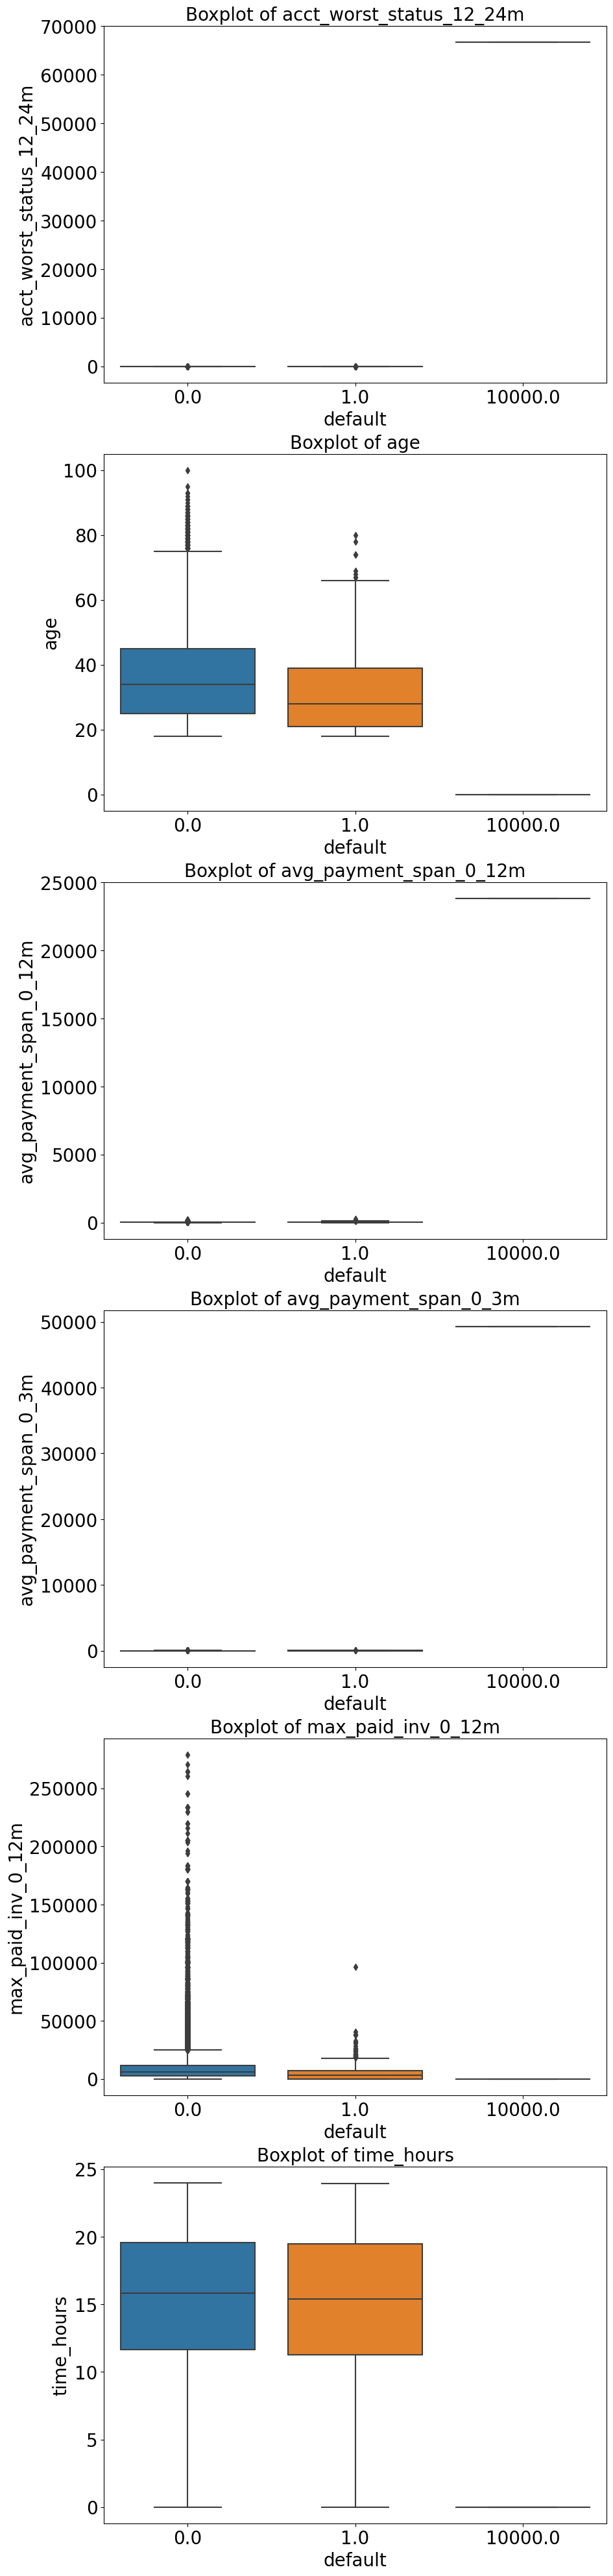

In [28]:
fig, axs = plt.subplots(nrows=6,ncols=1,figsize=(10,50))
sns.boxplot(x='default', y='acct_worst_status_12_24m', data=credit, ax=axs[0])
axs[0].set_title('Boxplot of acct_worst_status_12_24m', fontsize=20)
axs[0].set_xlabel('default', fontsize=20)
axs[0].set_ylabel('acct_worst_status_12_24m', fontsize=20)
axs[0].tick_params(axis='both', which='both', labelsize=20) 

sns.boxplot(x='default', y='age', data=credit, ax=axs[1])
axs[1].set_title('Boxplot of age', fontsize=20)
axs[1].set_xlabel('default', fontsize=20)
axs[1].set_ylabel('age', fontsize=20)
axs[1].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='avg_payment_span_0_12m', data=credit, ax=axs[2])
axs[2].set_title('Boxplot of avg_payment_span_0_12m', fontsize=20)
axs[2].set_xlabel('default', fontsize=20)
axs[2].set_ylabel('avg_payment_span_0_12m', fontsize=20)
axs[2].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='avg_payment_span_0_3m', data=credit, ax=axs[3])
axs[3].set_title('Boxplot of avg_payment_span_0_3m', fontsize=20)
axs[3].set_xlabel('default', fontsize=20)
axs[3].set_ylabel('avg_payment_span_0_3m', fontsize=20)
axs[3].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='max_paid_inv_0_12m', data=credit, ax=axs[4])
axs[4].set_title('Boxplot of max_paid_inv_0_12m', fontsize=20)
axs[4].set_xlabel('default', fontsize=20)
axs[4].set_ylabel('max_paid_inv_0_12m', fontsize=20)
axs[4].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='time_hours', data=credit, ax=axs[5])
axs[5].set_title('Boxplot of time_hours', fontsize=20)
axs[5].set_xlabel('default', fontsize=20)
axs[5].set_ylabel('time_hours', fontsize=20)
axs[5].tick_params(axis='both', which='both', labelsize=20)

plt.show()

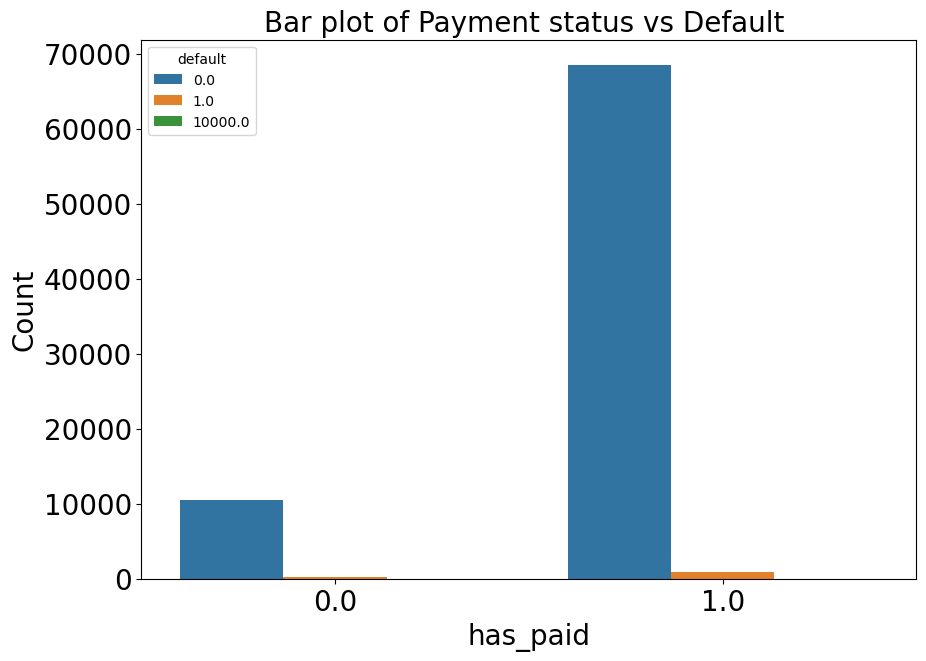

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(data=credit, x='has_paid', hue='default')
plt.title('Bar plot of Payment status vs Default ', fontsize= 20)
plt.xlabel('has_paid', fontsize=20)
plt.ylabel('Count', fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

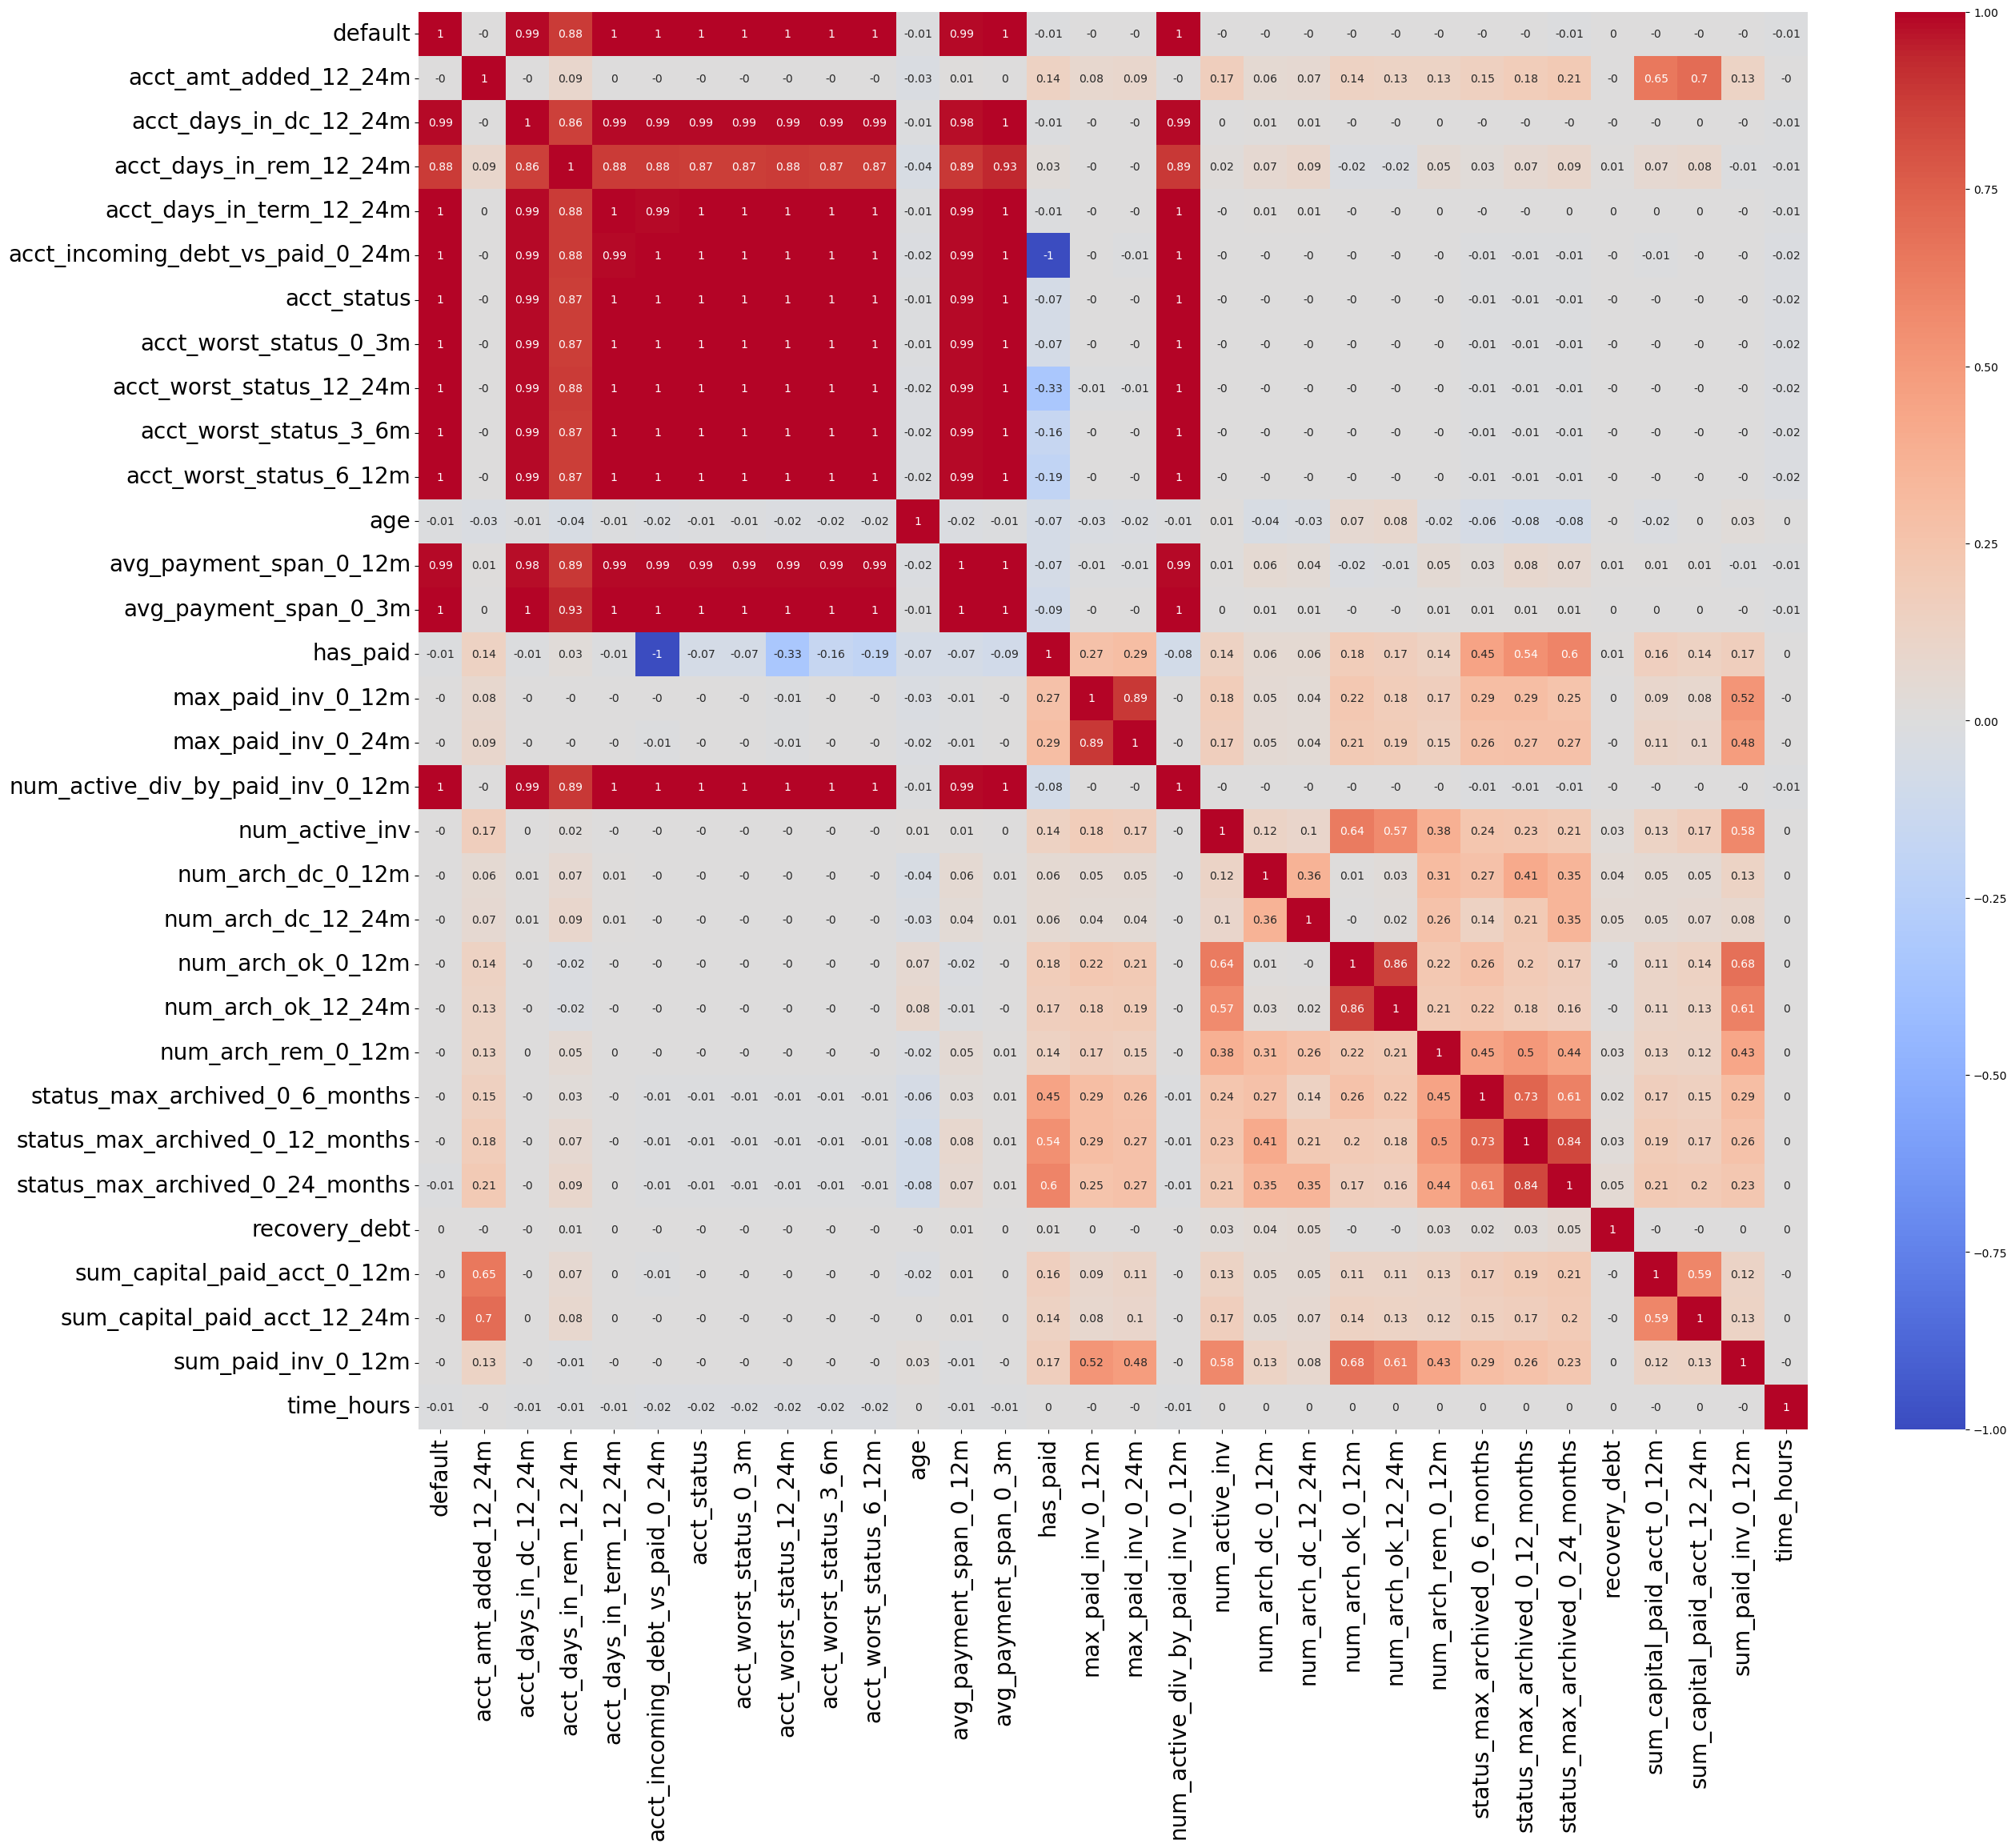

In [30]:
plt.figure(figsize = (28,23))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cor_matrix = credit.drop(['userid', 'name_in_email','merchant_category','merchant_group'], axis = 1).corr()
sns.heatmap(round(cor_matrix,2), cmap = 'coolwarm', vmin = -1, vmax= 1, annot=True)
plt.show()

In [31]:
credit.columns


Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [32]:
#removing unwanted variable
credit = credit.drop(['userid', 'name_in_email'], axis = 1)


In [33]:
credit.columns


Index(['default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [34]:
credit.shape


(99978, 34)

In [35]:
# Calculate the percentage of missing values for each column
missing_percentage = credit.isnull().mean() * 100

# Display the missing value percentages
missing_percentage.sort_values(ascending=False)


acct_worst_status_12_24m            66.776691
acct_worst_status_6_12m             60.364280
acct_incoming_debt_vs_paid_0_24m    59.329052
acct_worst_status_3_6m              57.715697
acct_status                         54.385965
acct_worst_status_0_3m              54.385965
avg_payment_span_0_3m               49.316850
num_active_div_by_paid_inv_0_12m    29.932585
avg_payment_span_0_12m              23.842245
acct_days_in_dc_12_24m              11.839605
acct_days_in_rem_12_24m             11.839605
acct_days_in_term_12_24m            11.839605
status_max_archived_0_6_months      11.037428
max_paid_inv_0_12m                  11.037428
num_arch_rem_0_12m                  11.037428
status_max_archived_0_24_months     11.037428
status_max_archived_0_12_months     11.037428
sum_paid_inv_0_12m                  11.037428
recovery_debt                       11.037428
sum_capital_paid_acct_0_12m         11.037428
sum_capital_paid_acct_12_24m        11.037428
num_arch_ok_0_12m                 

In [36]:
credit.isnull().sum()


default                             10001
acct_amt_added_12_24m                   1
acct_days_in_dc_12_24m              11837
acct_days_in_rem_12_24m             11837
acct_days_in_term_12_24m            11837
acct_incoming_debt_vs_paid_0_24m    59316
acct_status                         54374
acct_worst_status_0_3m              54374
acct_worst_status_12_24m            66762
acct_worst_status_3_6m              57703
acct_worst_status_6_12m             60351
age                                     1
avg_payment_span_0_12m              23837
avg_payment_span_0_3m               49306
merchant_category                       1
merchant_group                         10
has_paid                            11035
max_paid_inv_0_12m                  11035
max_paid_inv_0_24m                  11035
num_active_div_by_paid_inv_0_12m    29926
num_active_inv                      11035
num_arch_dc_0_12m                   11035
num_arch_dc_12_24m                  11035
num_arch_ok_0_12m                 

In [37]:
credit_num=credit.drop(['merchant_category','merchant_group'], axis=1) # taking only numarical 


In [38]:
credit_num

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0          0.0                    0.0                     0.0   
1          0.0                    0.0                     0.0   
2          0.0                    0.0                     0.0   
3          0.0                    0.0                     NaN   
4          0.0                    0.0                     0.0   
...        ...                    ...                     ...   
99973      NaN                45671.0                     0.0   
99974      NaN                56102.0                     0.0   
99975      NaN                    0.0                     0.0   
99976      NaN                    NaN                     NaN   
99978  10000.0                    0.0                 11836.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          NaN                       NaN   
4                          0.0                       0.0   
...                        ...                       ...   
99973                     20.0                       0.0   
99974                      0.0                       0.0   
99975                      0.0                       0.0   
99976                      NaN                       NaN   
99978                  11836.0                   11836.0   

       acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                              0.000000          1.0                     1.0   
1                                   NaN          1.0                     1.0   
2                                   NaN          NaN                     NaN   
3                                   NaN          NaN                     NaN   
4                                   NaN          NaN                     NaN   
...                                 ...          ...                     ...   
99973                          0.705078          2.0                     2.0   
99974                          0.064175          1.0                     2.0   
99975                               NaN          1.0                     1.0   
99976                               NaN          NaN                     NaN   
99978                      59315.000000      54373.0                 54373.0   

       acct_worst_status_12_24m  acct_worst_status_3_6m  ...  \
0                           NaN                     1.0  ...   
1                           1.0                     1.0  ...   
2                           NaN                     NaN  ...   
3                           NaN                     NaN  ...   
4                           NaN                     NaN  ...   
...                         ...                     ...  ...   
99973                       2.0                     1.0  ...   
99974                       1.0                     2.0  ...   
99975                       NaN                     1.0  ...   
99976                       NaN                     NaN  ...   
99978                   66761.0                 57702.0  ...   

       num_arch_ok_12_24m  num_arch_rem_0_12m  status_max_archived_0_6_months  \
0                    14.0                 0.0                             1.0   
1                    19.0                 3.0                             1.0   
2                     0.0                 3.0                             1.0   
3                    21.0                 0.0                             1.0   
4                     0.0                 0.0                             1.0   
...                   ...                 ...                             ...   
99973                 0.0                 0.0                             0.0   
99974                 1.0                 0.0                             1.0   
99975                 2.0                 1.0 

In [39]:
for c in credit_num.columns[1:]:
    median_value = credit_num[c].median()  # Calculate the median for the column
    credit_num[c].fillna(median_value, inplace=True)  # Impute missing values with the median

In [40]:
# Calculate the percentage of missing values for each column
missing_percentage = credit_num.isnull().mean() * 100

# Display the missing value percentages
missing_percentage.sort_values(ascending=False)


default                             10.003201
acct_amt_added_12_24m                0.000000
sum_paid_inv_0_12m                   0.000000
sum_capital_paid_acct_12_24m         0.000000
sum_capital_paid_acct_0_12m          0.000000
recovery_debt                        0.000000
status_max_archived_0_24_months      0.000000
status_max_archived_0_12_months      0.000000
status_max_archived_0_6_months       0.000000
num_arch_rem_0_12m                   0.000000
num_arch_ok_12_24m                   0.000000
num_arch_ok_0_12m                    0.000000
num_arch_dc_12_24m                   0.000000
num_arch_dc_0_12m                    0.000000
num_active_inv                       0.000000
num_active_div_by_paid_inv_0_12m     0.000000
max_paid_inv_0_24m                   0.000000
max_paid_inv_0_12m                   0.000000
has_paid                             0.000000
avg_payment_span_0_3m                0.000000
avg_payment_span_0_12m               0.000000
age                               

In [41]:
credit_num['default']

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
99973        NaN
99974        NaN
99975        NaN
99976        NaN
99978    10000.0
Name: default, Length: 99978, dtype: float64

In [42]:
credit_num['default'].fillna(0,inplace = True)


In [43]:
credit_num.isnull().sum()


default                             0
acct_amt_added_12_24m               0
acct_days_in_dc_12_24m              0
acct_days_in_rem_12_24m             0
acct_days_in_term_12_24m            0
acct_incoming_debt_vs_paid_0_24m    0
acct_status                         0
acct_worst_status_0_3m              0
acct_worst_status_12_24m            0
acct_worst_status_3_6m              0
acct_worst_status_6_12m             0
age                                 0
avg_payment_span_0_12m              0
avg_payment_span_0_3m               0
has_paid                            0
max_paid_inv_0_12m                  0
max_paid_inv_0_24m                  0
num_active_div_by_paid_inv_0_12m    0
num_active_inv                      0
num_arch_dc_0_12m                   0
num_arch_dc_12_24m                  0
num_arch_ok_0_12m                   0
num_arch_ok_12_24m                  0
num_arch_rem_0_12m                  0
status_max_archived_0_6_months      0
status_max_archived_0_12_months     0
status_max_a

In [44]:
credit_num['default'].value_counts()


0.0        98689
1.0         1288
10000.0        1
Name: default, dtype: int64

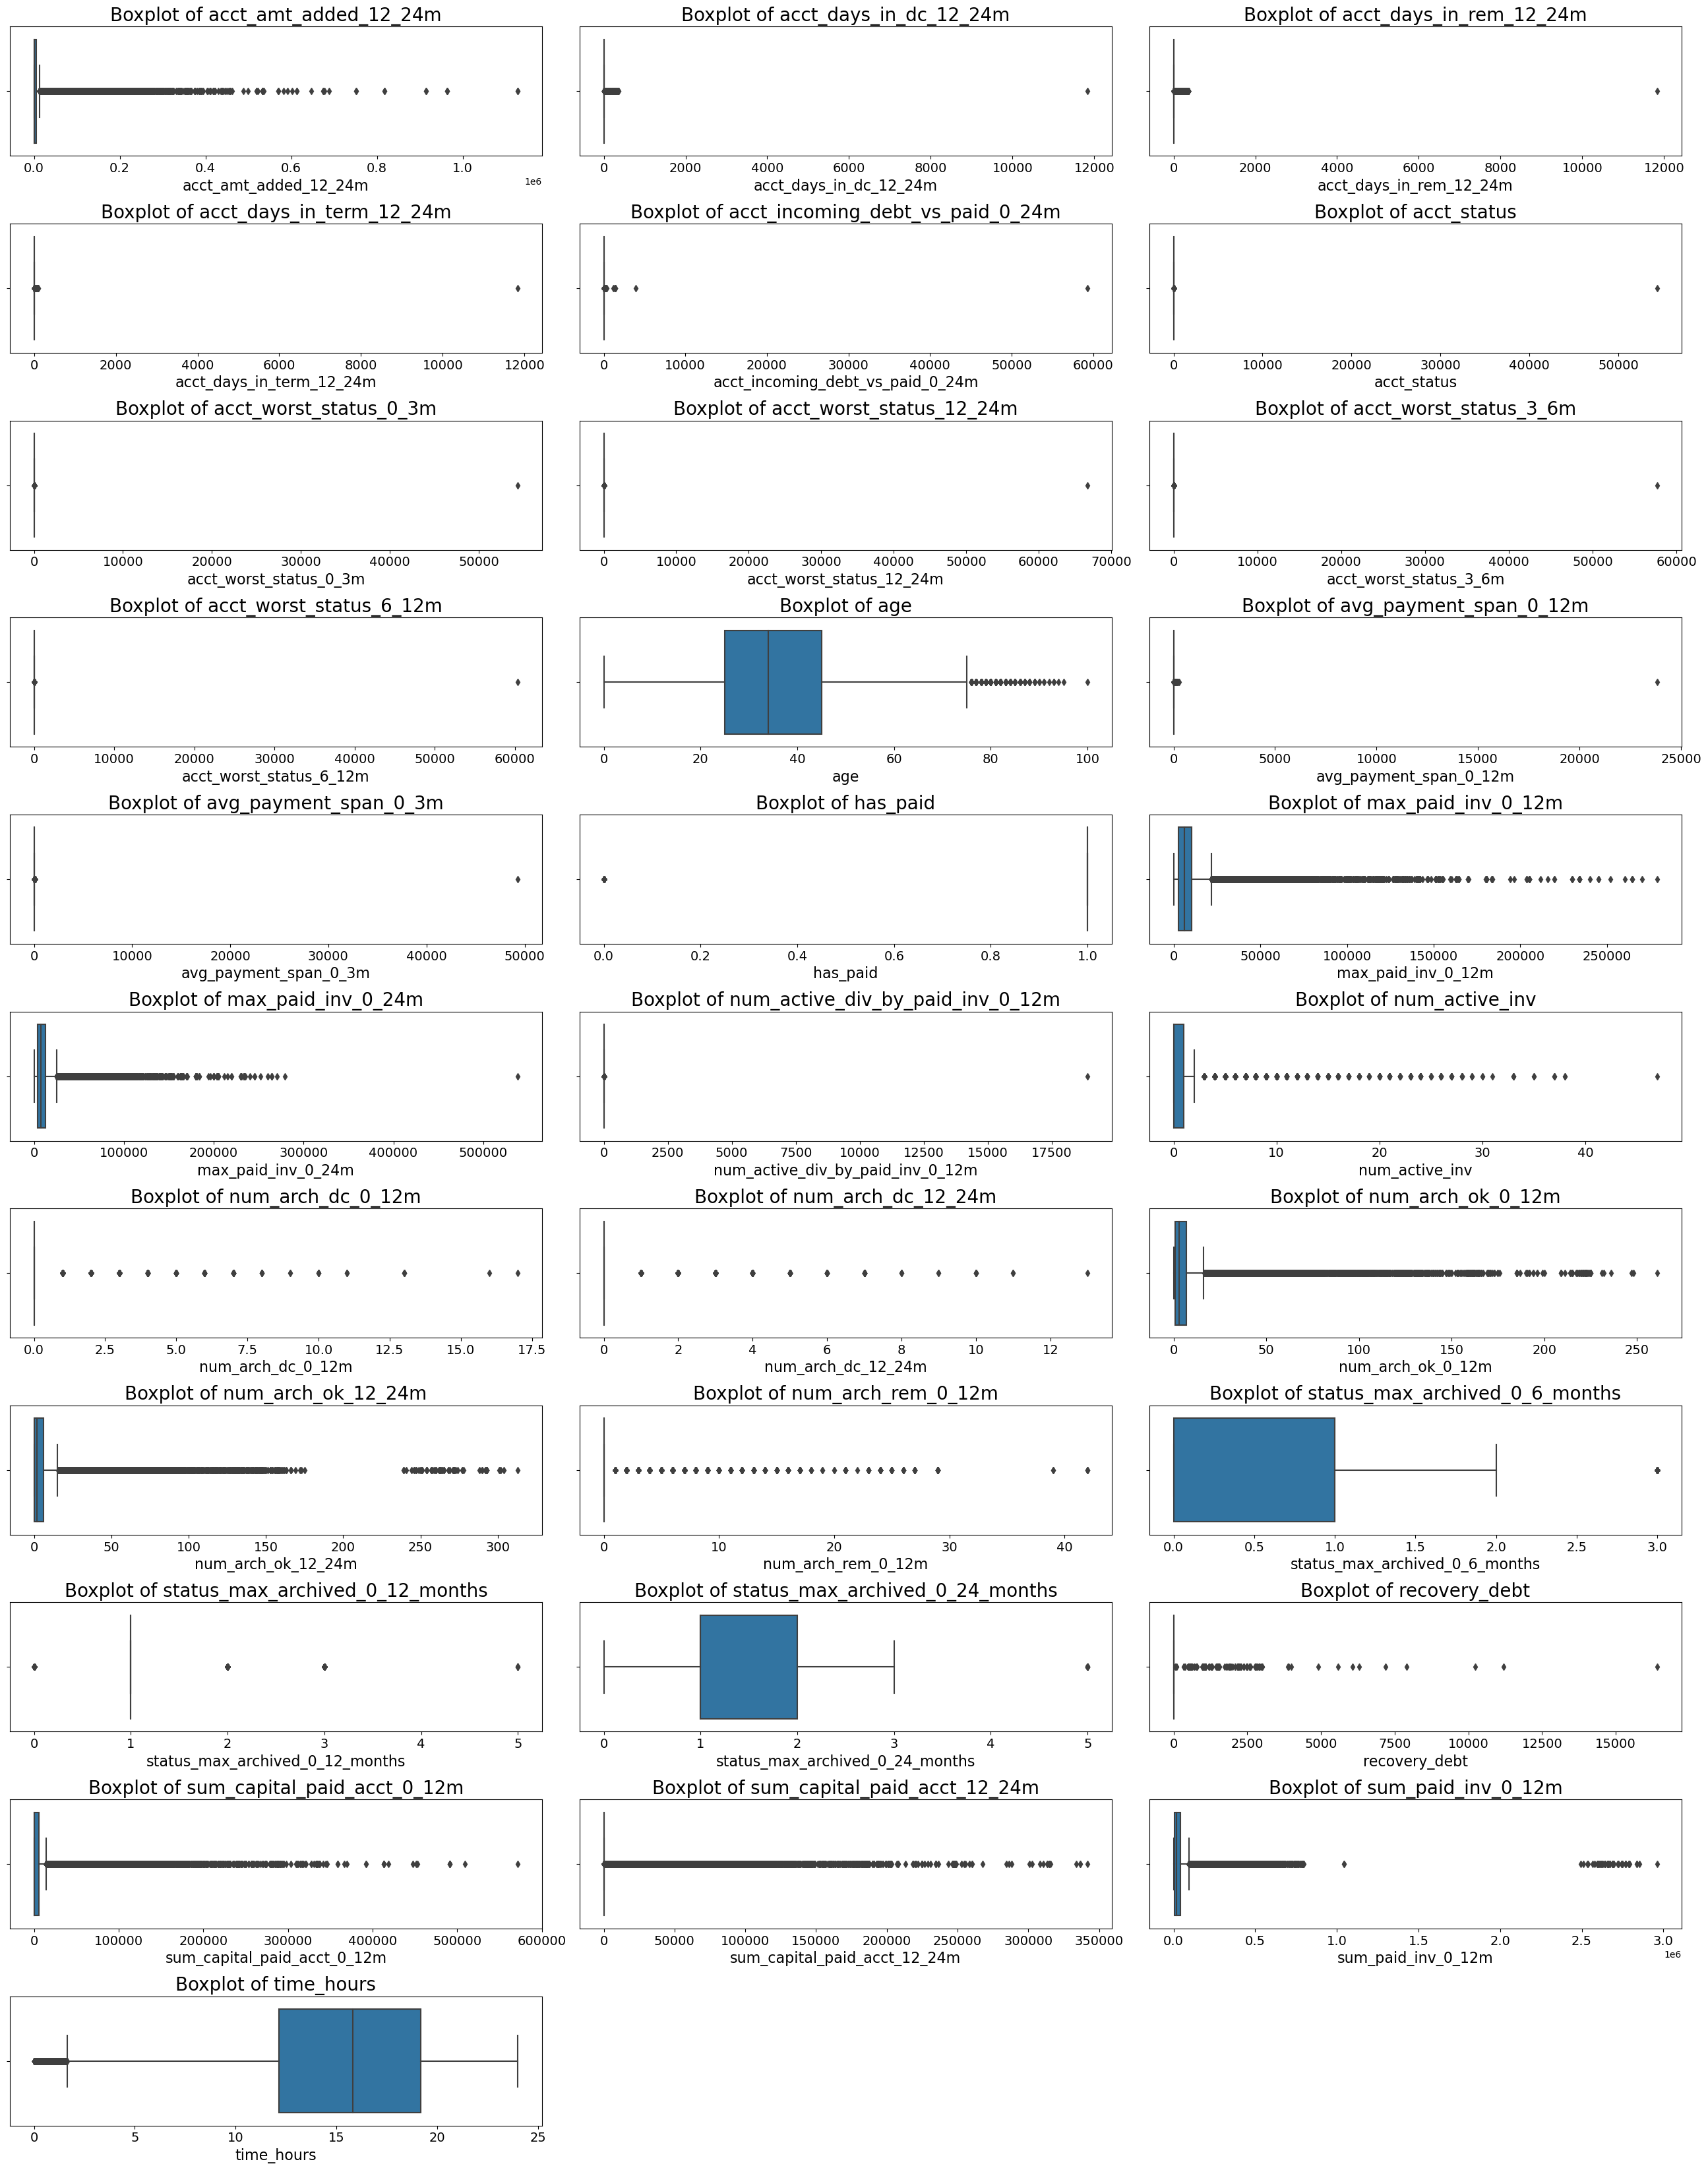

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate the number of columns and rows needed
num_columns = len(credit_num.columns)
num_rows = math.ceil(num_columns / 3)

# Generate box plots for all columns except 'default'
plt.figure(figsize=(26, num_rows * 3))
p = 1
for i in credit_num.drop(['default'], axis=1).columns:
    plt.subplot(num_rows, 3, p)
    p += 1
    sns.boxplot(data=credit_num, x=credit_num[i])
    plt.title('Boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

plt.show()


In [46]:
#Outlier treatment 

In [47]:
import numpy as np

# Assuming 'credit_num' is your DataFrame and 'default' is the column you want to exclude
columns_to_treat = credit_num.columns.difference(['default'])

# Treating outliers using the IQR method for all columns except 'default'
for i in columns_to_treat:
    q1 = credit_num[i].quantile(0.25)
    q3 = credit_num[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + (1.5 * iqr)
    ll = q1 - (1.5 * iqr)
    credit_num[i] = np.where(credit_num[i] > ul, ul, credit_num[i])
    credit_num[i] = np.where(credit_num[i] < ll, ll, credit_num[i])


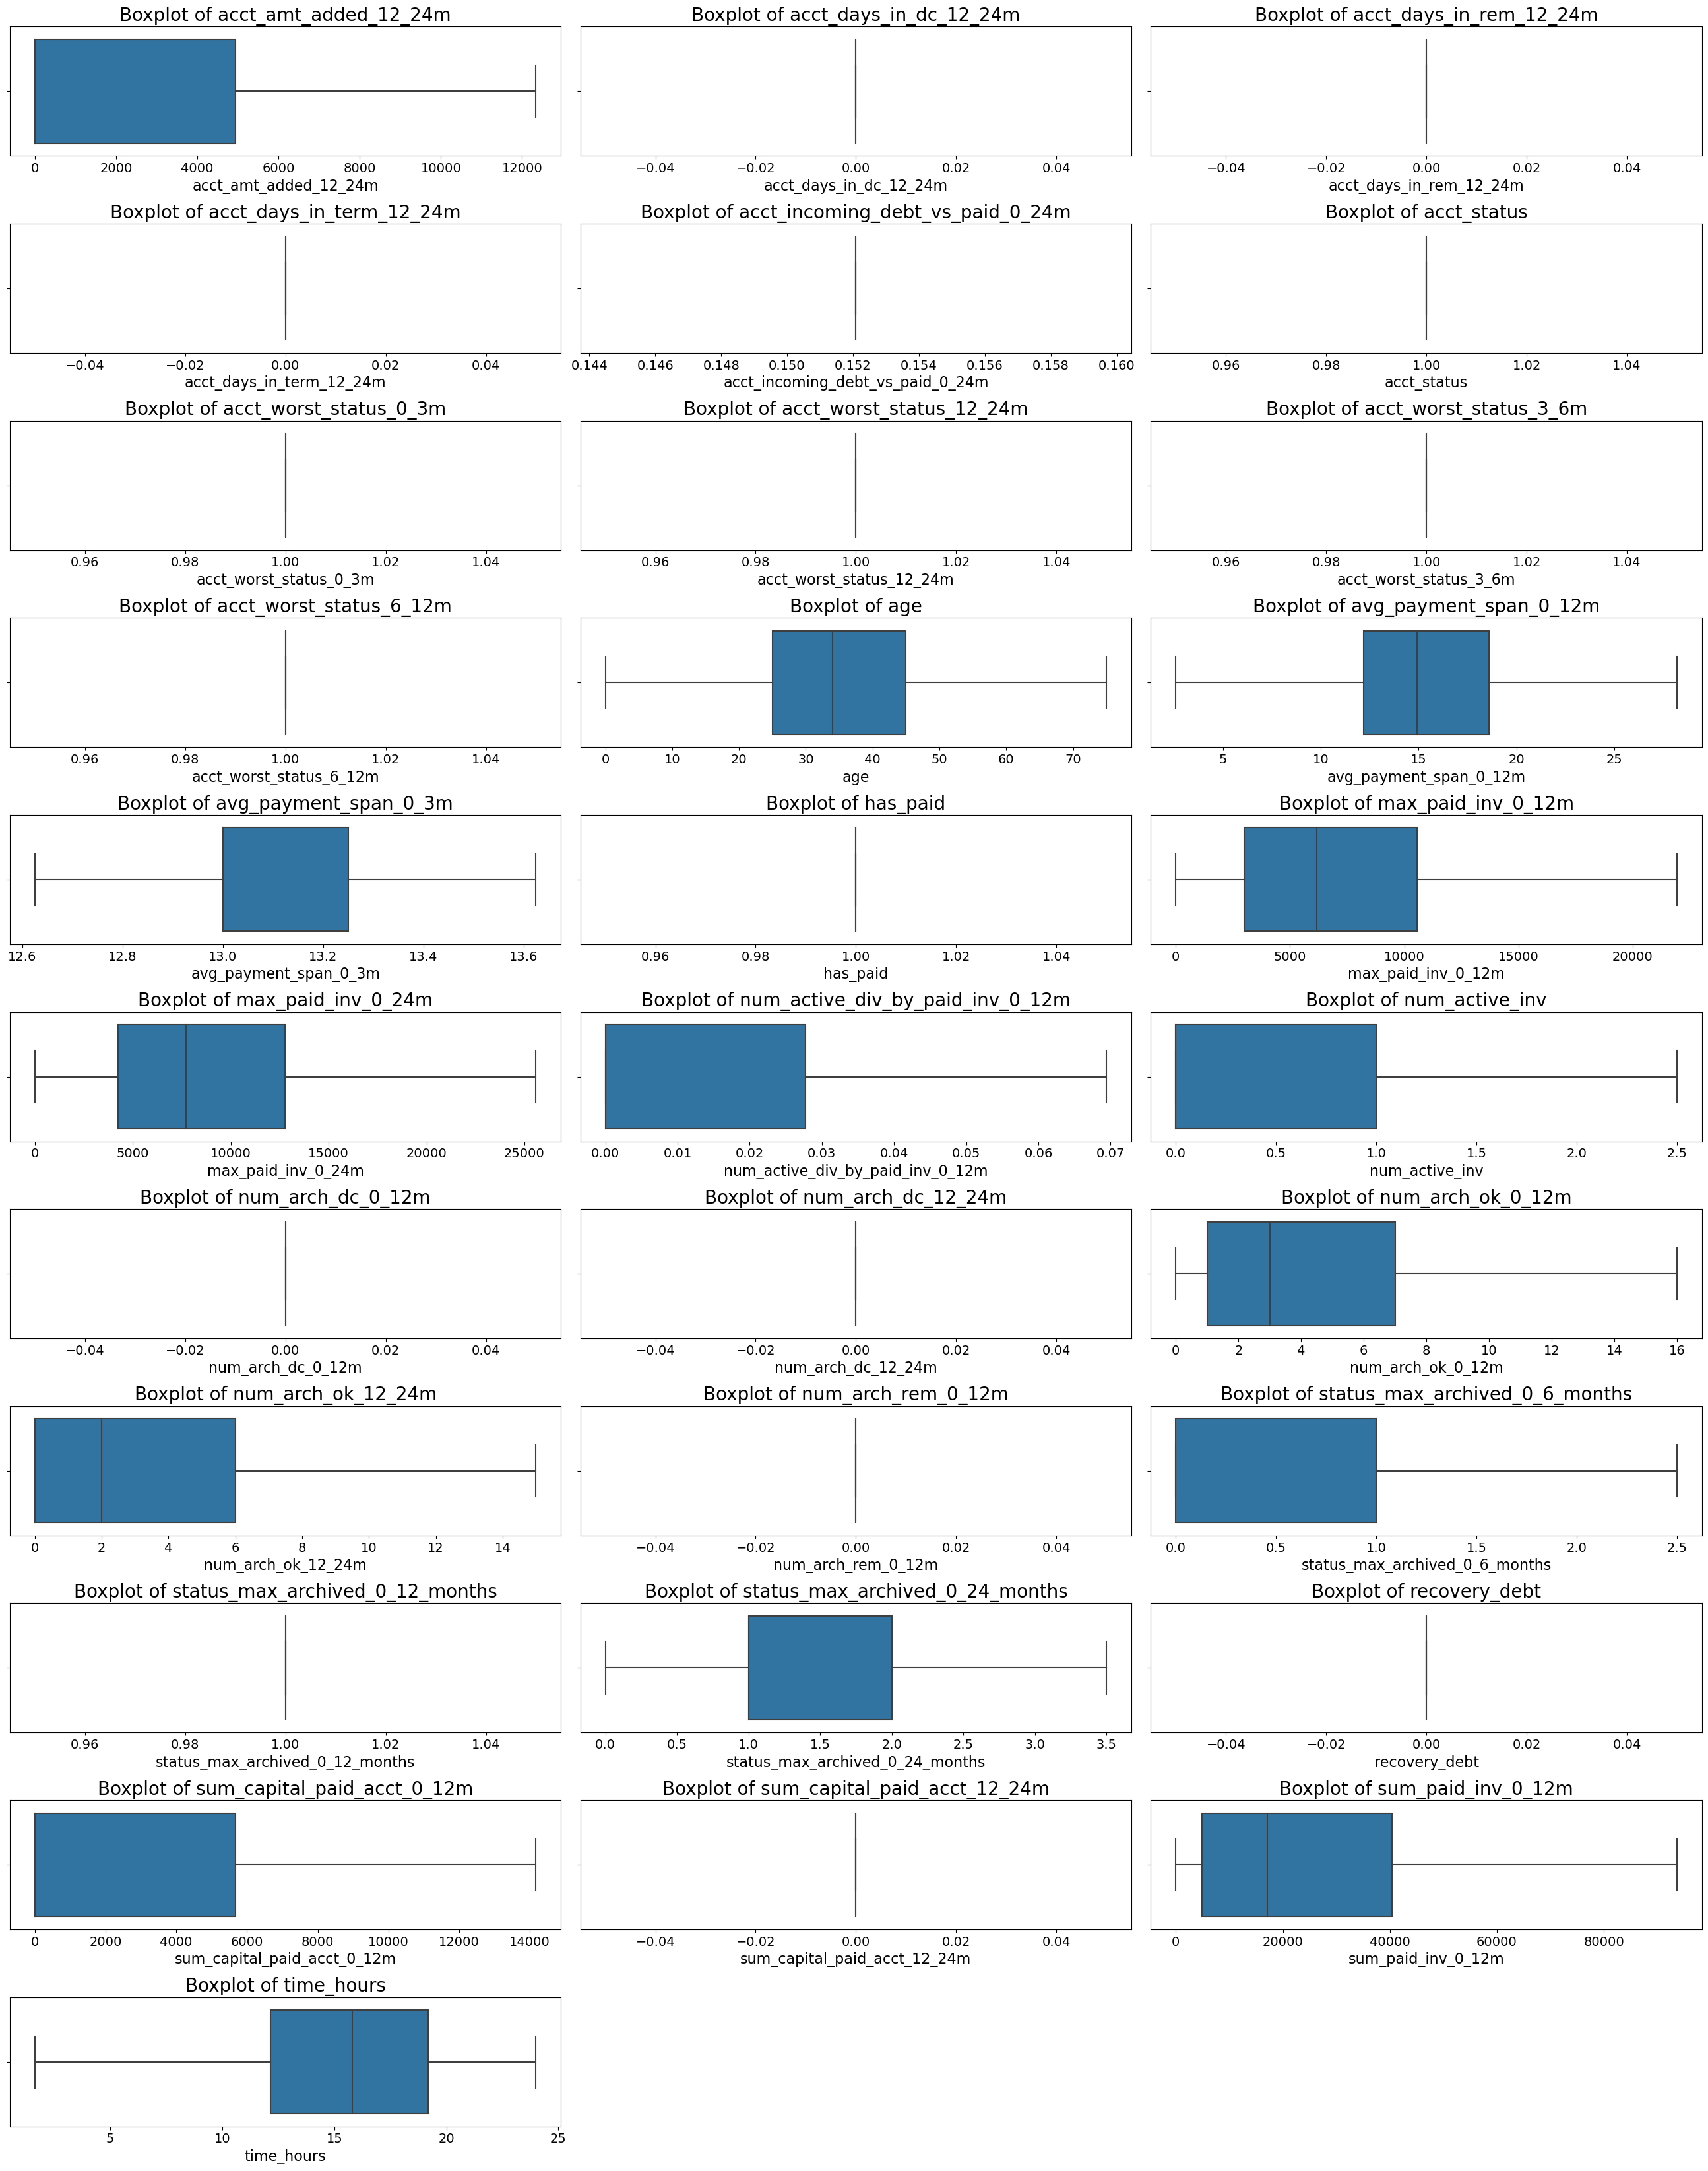

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate the number of columns and rows needed
num_columns = len(credit_num.columns)
num_rows = math.ceil(num_columns / 3)

# Generate box plots for all columns except 'default'
plt.figure(figsize=(26, num_rows * 3))
p = 1
for i in credit_num.drop(['default'], axis=1).columns:
    plt.subplot(num_rows, 3, p)
    p += 1
    sns.boxplot(data=credit_num, x=credit_num[i])
    plt.title('Boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

plt.show()


In [49]:
credit_num.describe().T

count          mean           std  \
default                           99978.0      0.112905  3.162642e+01   
acct_amt_added_12_24m             99978.0   2975.806953  5.052036e+03   
acct_days_in_dc_12_24m            99978.0      0.000000  0.000000e+00   
acct_days_in_rem_12_24m           99978.0      0.000000  0.000000e+00   
acct_days_in_term_12_24m          99978.0      0.000000  0.000000e+00   
acct_incoming_debt_vs_paid_0_24m  99978.0      0.152090  1.585406e-13   
acct_status                       99978.0      1.000000  0.000000e+00   
acct_worst_status_0_3m            99978.0      1.000000  0.000000e+00   
acct_worst_status_12_24m          99978.0      1.000000  0.000000e+00   
acct_worst_status_3_6m            99978.0      1.000000  0.000000e+00   
acct_worst_status_6_12m           99978.0      1.000000  0.000000e+00   
age                               99978.0     35.994009  1.292914e+01   
avg_payment_span_0_12m            99978.0     15.805050  6.329372e+00   
avg_payment_span_0_3m             99978.0     13.068460  3.522674e-01   
has_paid                          99978.0      1.000000  0.000000e+00   
max_paid_inv_0_12m                99978.0   7535.895787  6.412968e+03   
max_paid_inv_0_24m                99978.0   9307.615680  7.411366e+03   
num_active_div_by_paid_inv_0_12m  99978.0      0.016678  2.885079e-02   
num_active_inv                    99978.0      0.415977  7.475043e-01   
num_arch_dc_0_12m                 99978.0      0.000000  0.000000e+00   
num_arch_dc_12_24m                99978.0      0.000000  0.000000e+00   
num_arch_ok_0_12m                 99978.0      4.656014  5.179025e+00   
num_arch_ok_12_24m                99978.0      3.966213  4.927371e+00   
num_arch_rem_0_12m                99978.0      0.000000  0.000000e+00   
status_max_archived_0_6_months    99978.0      0.833453  6.554061e-01   
status_max_archived_0_12_months   99978.0      1.000000  0.000000e+00   
status_max_archived_0_24_months   99978.0      1.220559  7.768742e-01   
recovery_debt                     99978.0      0.000000  0.000000e+00   
sum_capital_paid_acct_0_12m       99978.0   3400.989238  5.720188e+03   
sum_capital_paid_acct_12_24m      99978.0      0.000000  0.000000e+00   
sum_paid_inv_0_12m                99978.0  27836.954380  2.980450e+04   
time_hours                        99978.0     15.406261  4.707589e+00   

                                        min          25%           50%  \
default                            0.000000     0.000000      0.000000   
acct_amt_added_12_24m              0.000000     0.000000      0.000000   
acct_days_in_dc_12_24m             0.000000     0.000000      0.000000   
acct_days_in_rem_12_24m            0.000000     0.000000      0.000000   
acct_days_in_term_12_24m           0.000000     0.000000      0.000000   
acct_incoming_debt_vs_paid_0_24m   0.152090     0.152090      0.152090   
acct_status                        1.000000     1.000000      1.000000   
acct_worst_status_0_3m             1.000000     1.000000      1.000000   
acct_worst_status_12_24m           1.000000     1.000000      1.000000   
acct_worst_status_3_6m             1.000000     1.000000      1.000000   
acct_worst_status_6_12m            1.000000     1.000000      1.000000   
age                                0.000000    25.000000     34.000000   
avg_payment_span_0_12m             2.602027    12.200000     14.909091   
avg_payment_span_0_3m             12.625000    13.000000     13.000000   
has_paid                           1.000000     1.000000      1.000000   
max_paid_inv_0_12m                 0.000000  2990.000000   6170.000000   
max_paid_inv_0_24m                 0.000000  4249.250000   7720.000000   
num_active_div_by_paid_inv_0_12m   0.000000     0.000000      0.000000   
num_active_inv                     0.000000     0.000000      0.000000   
num_arch_dc_0_12m                  0.000000     0.000000      0.000000   
num_arch_dc_12_24m                 0.000000     0.000000      0.000000  

In [50]:
credit_num['default'].value_counts()


0.0        98689
1.0         1288
10000.0        1
Name: default, dtype: int64

In [51]:
#As we can see outliers, all the outliers have been treated, but some of the variables have only zeroes left. Therefore dropping such variables.

In [52]:
credit_num.drop([
    'acct_days_in_dc_12_24m',
    'acct_days_in_rem_12_24m',
    'acct_days_in_term_12_24m',
    'acct_incoming_debt_vs_paid_0_24m',
    'acct_status',
    'acct_worst_status_0_3m',
    'acct_worst_status_12_24m',
    'acct_worst_status_3_6m',
    'acct_worst_status_6_12m',
    'has_paid',
    'num_arch_dc_0_12m',
    'num_arch_dc_12_24m',
    'num_arch_rem_0_12m',
    'status_max_archived_0_12_months',
    'recovery_debt',
    'sum_capital_paid_acct_12_24m'
], axis=1, inplace=True)


In [53]:
credit_num.describe().T


count          mean           std  \
default                           99978.0      0.112905     31.626416   
acct_amt_added_12_24m             99978.0   2975.806953   5052.036358   
age                               99978.0     35.994009     12.929143   
avg_payment_span_0_12m            99978.0     15.805050      6.329372   
avg_payment_span_0_3m             99978.0     13.068460      0.352267   
max_paid_inv_0_12m                99978.0   7535.895787   6412.967942   
max_paid_inv_0_24m                99978.0   9307.615680   7411.365919   
num_active_div_by_paid_inv_0_12m  99978.0      0.016678      0.028851   
num_active_inv                    99978.0      0.415977      0.747504   
num_arch_ok_0_12m                 99978.0      4.656014      5.179025   
num_arch_ok_12_24m                99978.0      3.966213      4.927371   
status_max_archived_0_6_months    99978.0      0.833453      0.655406   
status_max_archived_0_24_months   99978.0      1.220559      0.776874   
sum_capital_paid_acct_0_12m       99978.0   3400.989238   5720.188199   
sum_paid_inv_0_12m                99978.0  27836.954380  29804.498310   
time_hours                        99978.0     15.406261      4.707589   

                                        min          25%           50%  \
default                            0.000000     0.000000      0.000000   
acct_amt_added_12_24m              0.000000     0.000000      0.000000   
age                                0.000000    25.000000     34.000000   
avg_payment_span_0_12m             2.602027    12.200000     14.909091   
avg_payment_span_0_3m             12.625000    13.000000     13.000000   
max_paid_inv_0_12m                 0.000000  2990.000000   6170.000000   
max_paid_inv_0_24m                 0.000000  4249.250000   7720.000000   
num_active_div_by_paid_inv_0_12m   0.000000     0.000000      0.000000   
num_active_inv                     0.000000     0.000000      0.000000   
num_arch_ok_0_12m                  0.000000     1.000000      3.000000   
num_arch_ok_12_24m                 0.000000     0.000000      2.000000   
status_max_archived_0_6_months     0.000000     0.000000      1.000000   
status_max_archived_0_24_months    0.000000     1.000000      1.000000   
sum_capital_paid_acct_0_12m        0.000000     0.000000      0.000000   
sum_paid_inv_0_12m                 0.000000  4870.000000  17057.000000   
time_hours                         1.635868    12.157847     15.808333   

                                           75%           max  
default                               0.000000  10000.000000  
acct_amt_added_12_24m              4936.500000  12341.250000  
age                                  45.000000     75.000000  
avg_payment_span_0_12m               18.598649     28.196622  
avg_payment_span_0_3m                13.250000     13.625000  
max_paid_inv_0_12m                10570.000000  21940.000000  
max_paid_inv_0_24m                12785.000000  25588.625000  
num_active_div_by_paid_inv_0_12m      0.027778      0.069444  
num_active_inv                        1.000000      2.500000  
num_arch_ok_0_12m                     7.000000     16.000000  
num_arch_ok_12_24m                    6.000000     15.000000  
status_max_archived_0_6_months        1.000000      2.500000  
status_max_archived_0_24_months       2.000000      3.500000  
sum_capital_paid_acct_0_12m        5670.000000  14175.000000  
sum_paid_inv_0_12m                40393.000000  93677.500000  
time_hours                           19.172500     23.999722

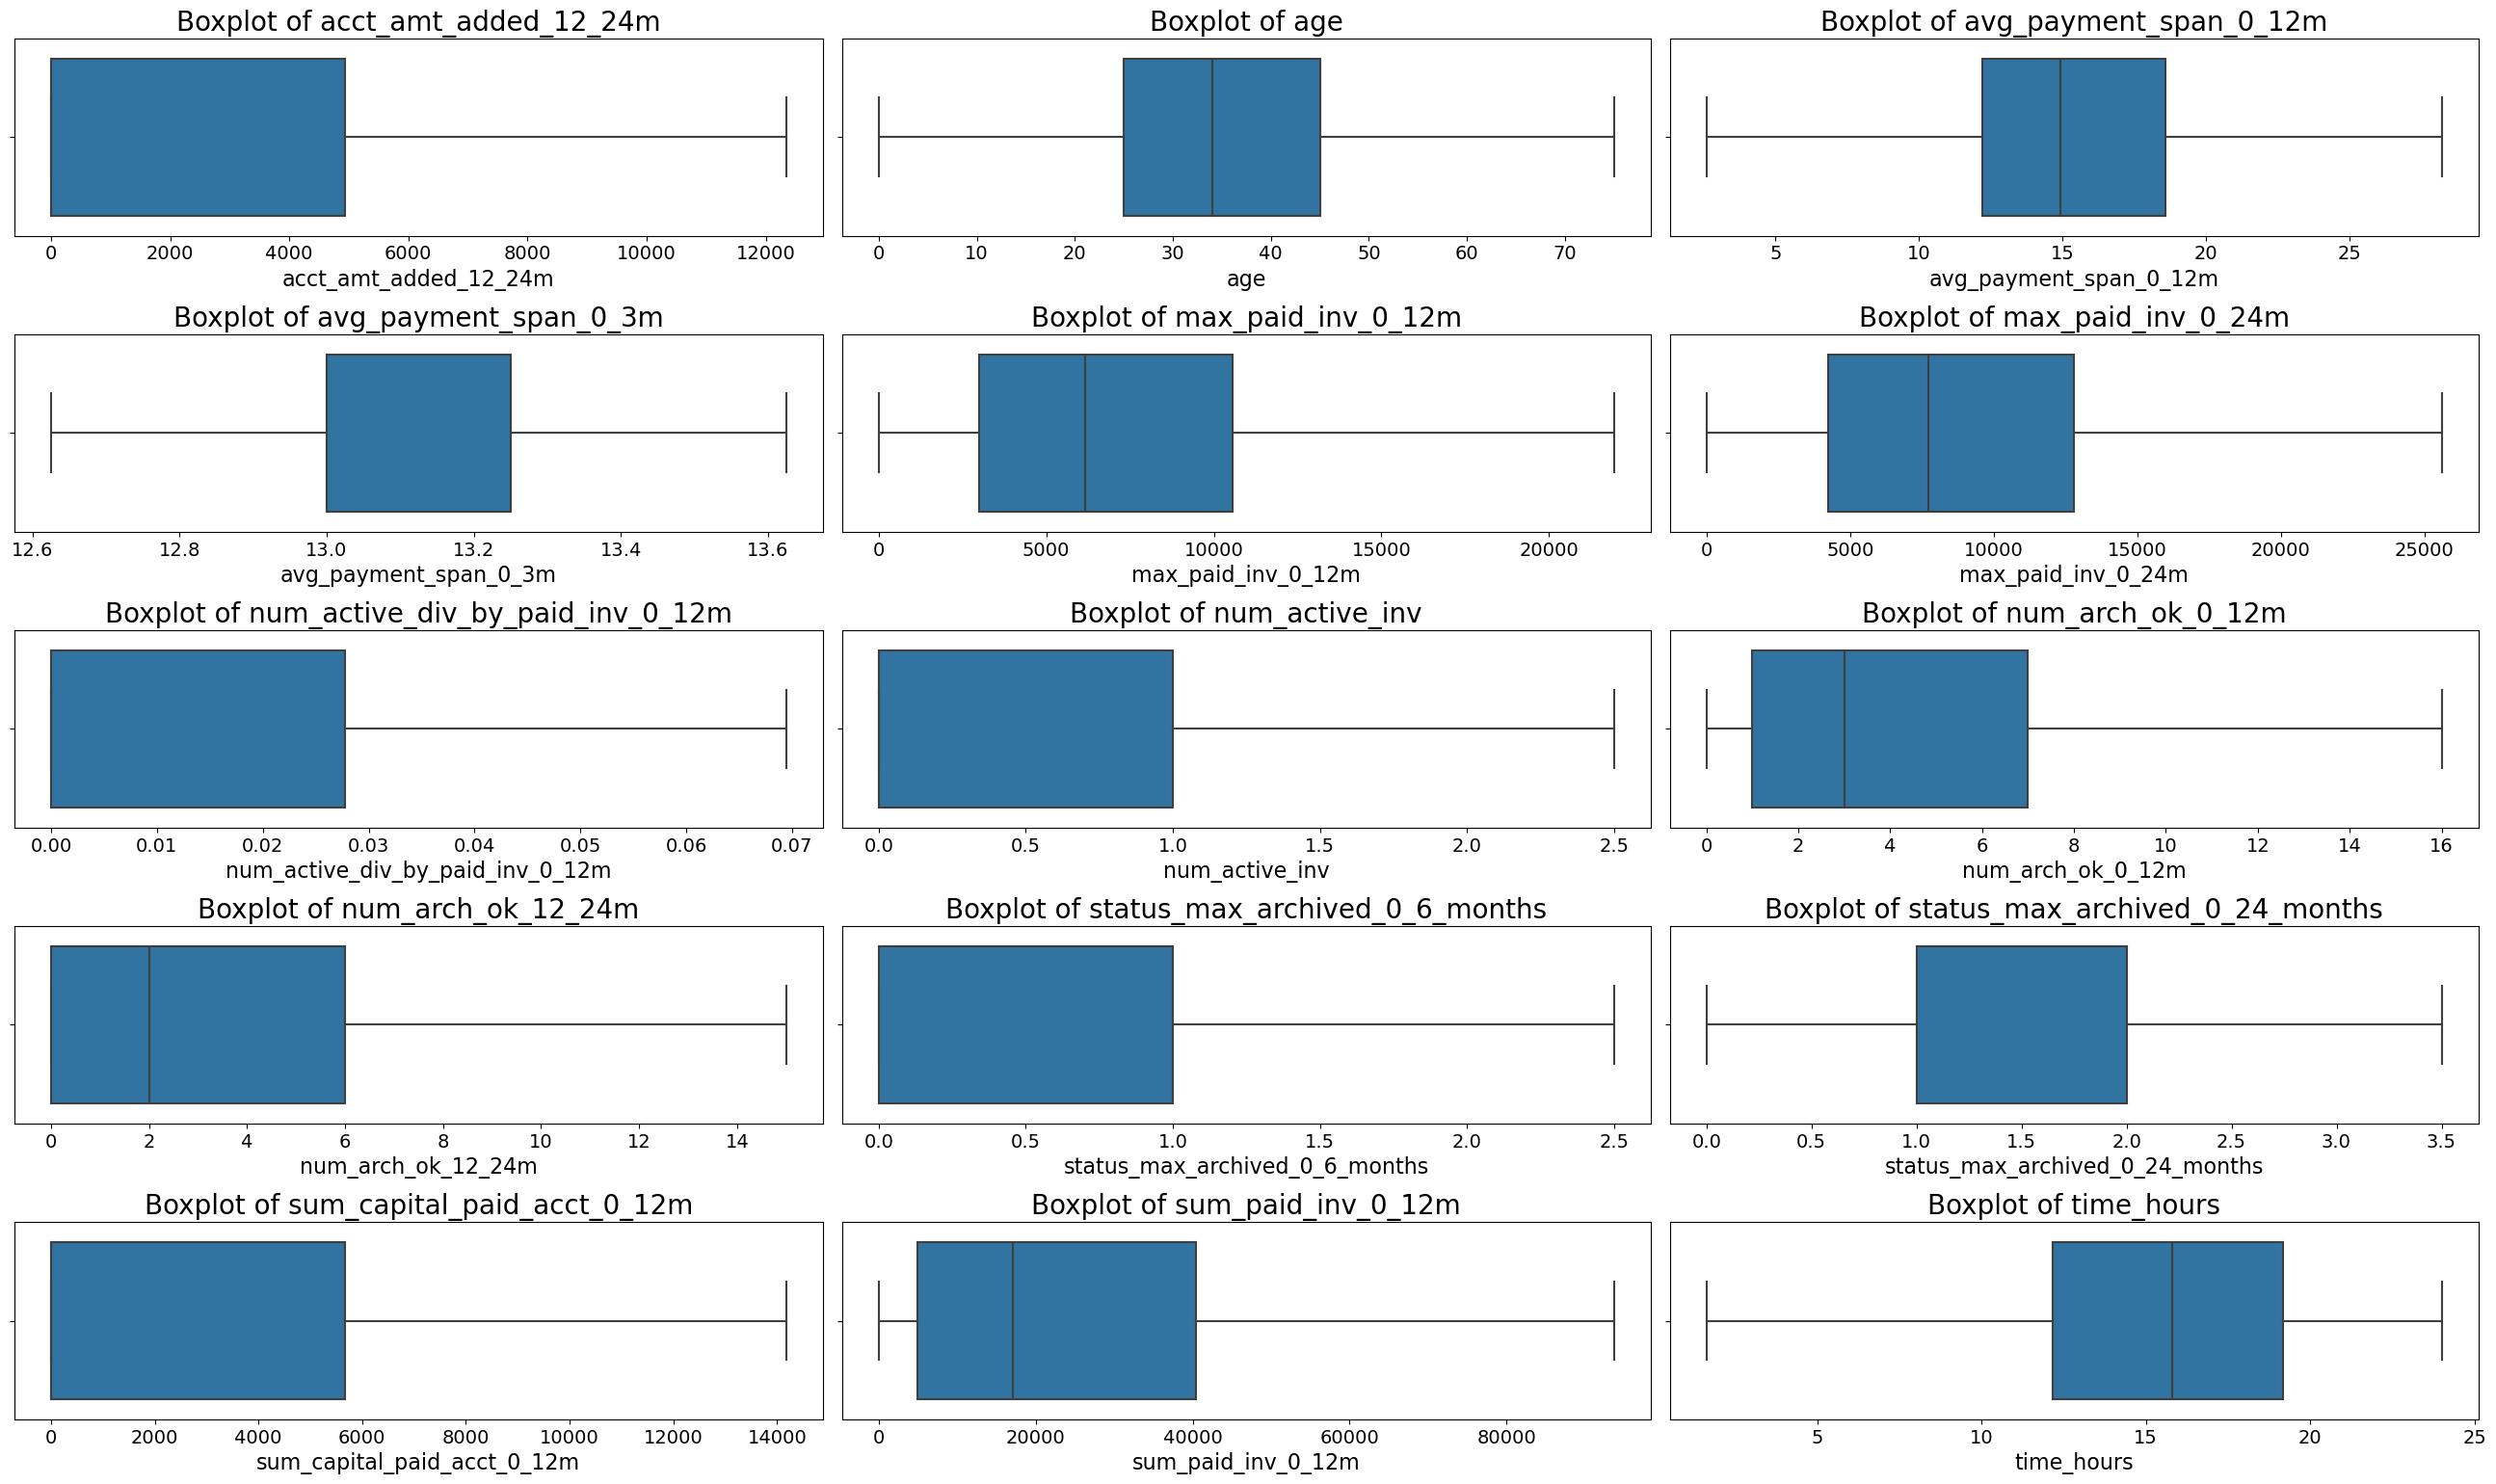

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate the number of columns and rows needed
num_columns = len(credit_num.columns)
num_rows = math.ceil(num_columns / 3)

# Generate box plots for all columns except 'default'
plt.figure(figsize=(26, num_rows * 3))
p = 1
for i in credit_num.drop(['default'], axis=1).columns:
    plt.subplot(num_rows, 3, p)
    p += 1
    sns.boxplot(data=credit_num, x=credit_num[i])
    plt.title('Boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

plt.show()


In [55]:
credit_num.describe().T


count          mean           std  \
default                           99978.0      0.112905     31.626416   
acct_amt_added_12_24m             99978.0   2975.806953   5052.036358   
age                               99978.0     35.994009     12.929143   
avg_payment_span_0_12m            99978.0     15.805050      6.329372   
avg_payment_span_0_3m             99978.0     13.068460      0.352267   
max_paid_inv_0_12m                99978.0   7535.895787   6412.967942   
max_paid_inv_0_24m                99978.0   9307.615680   7411.365919   
num_active_div_by_paid_inv_0_12m  99978.0      0.016678      0.028851   
num_active_inv                    99978.0      0.415977      0.747504   
num_arch_ok_0_12m                 99978.0      4.656014      5.179025   
num_arch_ok_12_24m                99978.0      3.966213      4.927371   
status_max_archived_0_6_months    99978.0      0.833453      0.655406   
status_max_archived_0_24_months   99978.0      1.220559      0.776874   
sum_capital_paid_acct_0_12m       99978.0   3400.989238   5720.188199   
sum_paid_inv_0_12m                99978.0  27836.954380  29804.498310   
time_hours                        99978.0     15.406261      4.707589   

                                        min          25%           50%  \
default                            0.000000     0.000000      0.000000   
acct_amt_added_12_24m              0.000000     0.000000      0.000000   
age                                0.000000    25.000000     34.000000   
avg_payment_span_0_12m             2.602027    12.200000     14.909091   
avg_payment_span_0_3m             12.625000    13.000000     13.000000   
max_paid_inv_0_12m                 0.000000  2990.000000   6170.000000   
max_paid_inv_0_24m                 0.000000  4249.250000   7720.000000   
num_active_div_by_paid_inv_0_12m   0.000000     0.000000      0.000000   
num_active_inv                     0.000000     0.000000      0.000000   
num_arch_ok_0_12m                  0.000000     1.000000      3.000000   
num_arch_ok_12_24m                 0.000000     0.000000      2.000000   
status_max_archived_0_6_months     0.000000     0.000000      1.000000   
status_max_archived_0_24_months    0.000000     1.000000      1.000000   
sum_capital_paid_acct_0_12m        0.000000     0.000000      0.000000   
sum_paid_inv_0_12m                 0.000000  4870.000000  17057.000000   
time_hours                         1.635868    12.157847     15.808333   

                                           75%           max  
default                               0.000000  10000.000000  
acct_amt_added_12_24m              4936.500000  12341.250000  
age                                  45.000000     75.000000  
avg_payment_span_0_12m               18.598649     28.196622  
avg_payment_span_0_3m                13.250000     13.625000  
max_paid_inv_0_12m                10570.000000  21940.000000  
max_paid_inv_0_24m                12785.000000  25588.625000  
num_active_div_by_paid_inv_0_12m      0.027778      0.069444  
num_active_inv                        1.000000      2.500000  
num_arch_ok_0_12m                     7.000000     16.000000  
num_arch_ok_12_24m                    6.000000     15.000000  
status_max_archived_0_6_months        1.000000      2.500000  
status_max_archived_0_24_months       2.000000      3.500000  
sum_capital_paid_acct_0_12m        5670.000000  14175.000000  
sum_paid_inv_0_12m                40393.000000  93677.500000  
time_hours                           19.172500     23.999722

In [56]:
credit_num.describe().T.round(2)


count      mean       std    min      25%  \
default                           99978.0      0.11     31.63   0.00     0.00   
acct_amt_added_12_24m             99978.0   2975.81   5052.04   0.00     0.00   
age                               99978.0     35.99     12.93   0.00    25.00   
avg_payment_span_0_12m            99978.0     15.81      6.33   2.60    12.20   
avg_payment_span_0_3m             99978.0     13.07      0.35  12.62    13.00   
max_paid_inv_0_12m                99978.0   7535.90   6412.97   0.00  2990.00   
max_paid_inv_0_24m                99978.0   9307.62   7411.37   0.00  4249.25   
num_active_div_by_paid_inv_0_12m  99978.0      0.02      0.03   0.00     0.00   
num_active_inv                    99978.0      0.42      0.75   0.00     0.00   
num_arch_ok_0_12m                 99978.0      4.66      5.18   0.00     1.00   
num_arch_ok_12_24m                99978.0      3.97      4.93   0.00     0.00   
status_max_archived_0_6_months    99978.0      0.83      0.66   0.00     0.00   
status_max_archived_0_24_months   99978.0      1.22      0.78   0.00     1.00   
sum_capital_paid_acct_0_12m       99978.0   3400.99   5720.19   0.00     0.00   
sum_paid_inv_0_12m                99978.0  27836.95  29804.50   0.00  4870.00   
time_hours                        99978.0     15.41      4.71   1.64    12.16   

                                       50%       75%       max  
default                               0.00      0.00  10000.00  
acct_amt_added_12_24m                 0.00   4936.50  12341.25  
age                                  34.00     45.00     75.00  
avg_payment_span_0_12m               14.91     18.60     28.20  
avg_payment_span_0_3m                13.00     13.25     13.62  
max_paid_inv_0_12m                 6170.00  10570.00  21940.00  
max_paid_inv_0_24m                 7720.00  12785.00  25588.62  
num_active_div_by_paid_inv_0_12m      0.00      0.03      0.07  
num_active_inv                        0.00      1.00      2.50  
num_arch_ok_0_12m                     3.00      7.00     16.00  
num_arch_ok_12_24m                    2.00      6.00     15.00  
status_max_archived_0_6_months        1.00      1.00      2.50  
status_max_archived_0_24_months       1.00      2.00      3.50  
sum_capital_paid_acct_0_12m           0.00   5670.00  14175.00  
sum_paid_inv_0_12m                17057.00  40393.00  93677.50  
time_hours                           15.81     19.17     24.00

In [57]:
# Remove the last row of the DataFrame because the default its showing an unsual number '10000'.
credit_num = credit_num.drop(credit_num.index[-1])

# Display the updated DataFrame
print(credit_num)


       default  acct_amt_added_12_24m   age  avg_payment_span_0_12m  \
0          0.0                   0.00  20.0               12.692308   
1          0.0                   0.00  50.0               25.833333   
2          0.0                   0.00  22.0               20.000000   
3          0.0                   0.00  36.0                4.687500   
4          0.0                   0.00  25.0               13.000000   
...        ...                    ...   ...                     ...   
99972      0.0                   0.00  44.0               28.196622   
99973      0.0               12341.25  24.0               14.909091   
99974      0.0               12341.25  31.0               17.500000   
99975      0.0                   0.00  41.0               28.196622   
99976      0.0                   0.00  34.0               14.909091   

       avg_payment_span_0_3m  max_paid_inv_0_12m  max_paid_inv_0_24m  \
0                     12.625             21940.0           25588.625   
1  

In [58]:
credit_num.describe().T.round(2)


count      mean       std    min      25%  \
default                           99977.0      0.01      0.11   0.00     0.00   
acct_amt_added_12_24m             99977.0   2975.84   5052.05   0.00     0.00   
age                               99977.0     35.99     12.93  18.00    25.00   
avg_payment_span_0_12m            99977.0     15.80      6.33   2.60    12.20   
avg_payment_span_0_3m             99977.0     13.07      0.35  12.62    13.00   
max_paid_inv_0_12m                99977.0   7535.97   6412.96   0.00  2990.00   
max_paid_inv_0_24m                99977.0   9307.71   7411.34   0.00  4250.00   
num_active_div_by_paid_inv_0_12m  99977.0      0.02      0.03   0.00     0.00   
num_active_inv                    99977.0      0.42      0.75   0.00     0.00   
num_arch_ok_0_12m                 99977.0      4.66      5.18   0.00     1.00   
num_arch_ok_12_24m                99977.0      3.97      4.93   0.00     0.00   
status_max_archived_0_6_months    99977.0      0.83      0.66   0.00     0.00   
status_max_archived_0_24_months   99977.0      1.22      0.78   0.00     1.00   
sum_capital_paid_acct_0_12m       99977.0   3401.02   5720.21   0.00     0.00   
sum_paid_inv_0_12m                99977.0  27837.23  29804.52   0.00  4870.00   
time_hours                        99977.0     15.41      4.71   1.64    12.16   

                                       50%       75%       max  
default                               0.00      0.00      1.00  
acct_amt_added_12_24m                 0.00   4937.00  12341.25  
age                                  34.00     45.00     75.00  
avg_payment_span_0_12m               14.91     18.59     28.20  
avg_payment_span_0_3m                13.00     13.25     13.62  
max_paid_inv_0_12m                 6170.00  10570.00  21940.00  
max_paid_inv_0_24m                 7720.00  12785.00  25588.62  
num_active_div_by_paid_inv_0_12m      0.00      0.03      0.07  
num_active_inv                        0.00      1.00      2.50  
num_arch_ok_0_12m                     3.00      7.00     16.00  
num_arch_ok_12_24m                    2.00      6.00     15.00  
status_max_archived_0_6_months        1.00      1.00      2.50  
status_max_archived_0_24_months       1.00      2.00      3.50  
sum_capital_paid_acct_0_12m           0.00   5670.00  14175.00  
sum_paid_inv_0_12m                17057.00  40393.00  93677.50  
time_hours                           15.81     19.17     24.00

In [59]:
#Variable transformation

In [60]:
credit_num.head()

default  acct_amt_added_12_24m   age  avg_payment_span_0_12m  \
0      0.0                    0.0  20.0               12.692308   
1      0.0                    0.0  50.0               25.833333   
2      0.0                    0.0  22.0               20.000000   
3      0.0                    0.0  36.0                4.687500   
4      0.0                    0.0  25.0               13.000000   

   avg_payment_span_0_3m  max_paid_inv_0_12m  max_paid_inv_0_24m  \
0                 12.625             21940.0           25588.625   
1                 13.625             13749.0           13749.000   
2                 13.625             21940.0           25588.625   
3                 12.625             21940.0           25588.625   
4                 13.000              7100.0            7100.000   

   num_active_div_by_paid_inv_0_12m  num_active_inv  num_arch_ok_0_12m  \
0                          0.069444             2.0               13.0   
1                          0.000000             0.0                9.0   
2                          0.069444             1.0               11.0   
3                          0.031250             1.0               16.0   
4                          0.000000             0.0                1.0   

   num_arch_ok_12_24m  status_max_archived_0_6_months  \
0                14.0                             1.0   
1                15.0                             1.0   
2                 0.0                             1.0   
3                15.0                             1.0   
4                 0.0                             1.0   

   status_max_archived_0_24_months  sum_capital_paid_acct_0_12m  \
0                              1.0                          0.0   
1                              2.0                          0.0   
2                              2.0                          0.0   
3                              1.0                          0.0   
4                              1.0                          0.0   

   sum_paid_inv_0_12m  time_hours  
0             93677.5    9.653333  
1             49014.0   13.181389  
2             93677.5   11.561944  
3             93677.5   15.751111  
4              7100.0   12.698611

In [61]:
predictors = credit_num.drop(['default'],axis=1)
response = credit_num['default']




In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)


In [63]:
credit1_scaled = pd.concat([scaled_predictors, response], axis = 1)


In [64]:
credit1_scaled.columns


Index(['acct_amt_added_12_24m', 'age', 'avg_payment_span_0_12m',
       'avg_payment_span_0_3m', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_24_months',
       'sum_capital_paid_acct_0_12m', 'sum_paid_inv_0_12m', 'time_hours',
       'default'],
      dtype='object')

In [65]:
credit1_scaled.head()


acct_amt_added_12_24m       age  avg_payment_span_0_12m  \
0              -0.589038 -1.237127               -0.491783   
1              -0.589038  1.083303                1.584454   
2              -0.589038 -1.082431                0.662807   
3              -0.589038  0.000436               -1.756515   
4              -0.589038 -0.850389               -0.443169   

   avg_payment_span_0_3m  max_paid_inv_0_12m  max_paid_inv_0_24m  \
0              -1.258872            2.246094            2.196767   
1               1.579916            0.968829            0.599259   
2               1.579916            2.246094            2.196767   
3              -1.258872            2.246094            2.196767   
4              -0.194326           -0.067983           -0.297884   

   num_active_div_by_paid_inv_0_12m  num_active_inv  num_arch_ok_0_12m  \
0                          1.828982        2.119081           1.611109   
1                         -0.578079       -0.556494           0.838760   
2                          1.828982        0.781294           1.224934   
3                          0.505098        0.781294           2.190371   
4                         -0.578079       -0.556494          -0.705939   

   num_arch_ok_12_24m  status_max_archived_0_6_months  \
0            2.036336                        0.254101   
1            2.239284                        0.254101   
2           -0.804946                        0.254101   
3            2.239284                        0.254101   
4           -0.804946                        0.254101   

   status_max_archived_0_24_months  sum_capital_paid_acct_0_12m  \
0                        -0.283924                    -0.594566   
1                         1.003301                    -0.594566   
2                         1.003301                    -0.594566   
3                        -0.283924                    -0.594566   
4                        -0.283924                    -0.594566   

   sum_paid_inv_0_12m  time_hours  default  
0            2.209081   -1.222135      0.0  
1            0.710526   -0.472663      0.0  
2            2.209081   -0.816685      0.0  
3            2.209081    0.073228      0.0  
4           -0.695778   -0.575221      0.0

In [66]:
credit_num['default'].value_counts()


0.0    98689
1.0     1288
Name: default, dtype: int64

In [67]:
credit1_scaled.describe().T.round(2)


count  mean   std   min   25%   50%   75%  \
acct_amt_added_12_24m             99977.0 -0.00  1.00 -0.59 -0.59 -0.59  0.39   
age                               99977.0 -0.00  1.00 -1.39 -0.85 -0.15  0.70   
avg_payment_span_0_12m            99977.0 -0.00  1.00 -2.09 -0.57 -0.14  0.44   
avg_payment_span_0_3m             99977.0  0.00  1.00 -1.26 -0.19 -0.19  0.52   
max_paid_inv_0_12m                99977.0  0.00  1.00 -1.18 -0.71 -0.21  0.47   
max_paid_inv_0_24m                99977.0 -0.00  1.00 -1.26 -0.68 -0.21  0.47   
num_active_div_by_paid_inv_0_12m  99977.0 -0.00  1.00 -0.58 -0.58 -0.58  0.38   
num_active_inv                    99977.0 -0.00  1.00 -0.56 -0.56 -0.56  0.78   
num_arch_ok_0_12m                 99977.0 -0.00  1.00 -0.90 -0.71 -0.32  0.45   
num_arch_ok_12_24m                99977.0 -0.00  1.00 -0.80 -0.80 -0.40  0.41   
status_max_archived_0_6_months    99977.0  0.00  1.00 -1.27 -1.27  0.25  0.25   
status_max_archived_0_24_months   99977.0 -0.00  1.00 -1.57 -0.28 -0.28  1.00   
sum_capital_paid_acct_0_12m       99977.0 -0.00  1.00 -0.59 -0.59 -0.59  0.40   
sum_paid_inv_0_12m                99977.0  0.00  1.00 -0.93 -0.77 -0.36  0.42   
time_hours                        99977.0  0.00  1.00 -2.93 -0.69  0.09  0.80   
default                           99977.0  0.01  0.11  0.00  0.00  0.00  0.00   

                                   max  
acct_amt_added_12_24m             1.85  
age                               3.02  
avg_payment_span_0_12m            1.96  
avg_payment_span_0_3m             1.58  
max_paid_inv_0_12m                2.25  
max_paid_inv_0_24m                2.20  
num_active_div_by_paid_inv_0_12m  1.83  
num_active_inv                    2.79  
num_arch_ok_0_12m                 2.19  
num_arch_ok_12_24m                2.24  
status_max_archived_0_6_months    2.54  
status_max_archived_0_24_months   2.93  
sum_capital_paid_acct_0_12m       1.88  
sum_paid_inv_0_12m                2.21  
time_hours                        1.83  
default                           1.00

In [68]:
# Business insights from EDA

In [69]:
credit1_scaled.head()

acct_amt_added_12_24m       age  avg_payment_span_0_12m  \
0              -0.589038 -1.237127               -0.491783   
1              -0.589038  1.083303                1.584454   
2              -0.589038 -1.082431                0.662807   
3              -0.589038  0.000436               -1.756515   
4              -0.589038 -0.850389               -0.443169   

   avg_payment_span_0_3m  max_paid_inv_0_12m  max_paid_inv_0_24m  \
0              -1.258872            2.246094            2.196767   
1               1.579916            0.968829            0.599259   
2               1.579916            2.246094            2.196767   
3              -1.258872            2.246094            2.196767   
4              -0.194326           -0.067983           -0.297884   

   num_active_div_by_paid_inv_0_12m  num_active_inv  num_arch_ok_0_12m  \
0                          1.828982        2.119081           1.611109   
1                         -0.578079       -0.556494           0.838760   
2                          1.828982        0.781294           1.224934   
3                          0.505098        0.781294           2.190371   
4                         -0.578079       -0.556494          -0.705939   

   num_arch_ok_12_24m  status_max_archived_0_6_months  \
0            2.036336                        0.254101   
1            2.239284                        0.254101   
2           -0.804946                        0.254101   
3            2.239284                        0.254101   
4           -0.804946                        0.254101   

   status_max_archived_0_24_months  sum_capital_paid_acct_0_12m  \
0                        -0.283924                    -0.594566   
1                         1.003301                    -0.594566   
2                         1.003301                    -0.594566   
3                        -0.283924                    -0.594566   
4                        -0.283924                    -0.594566   

   sum_paid_inv_0_12m  time_hours  default  
0            2.209081   -1.222135      0.0  
1            0.710526   -0.472663      0.0  
2            2.209081   -0.816685      0.0  
3            2.209081    0.073228      0.0  
4           -0.695778   -0.575221      0.0

In [70]:
credit1_scaled['default']


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99972    0.0
99973    0.0
99974    0.0
99975    0.0
99976    0.0
Name: default, Length: 99977, dtype: float64

In [71]:
# Checking the balance of the target variable 'default'
default_balance = credit1_scaled['default'].value_counts(normalize=True) * 100


In [72]:
default_balance

0.0    98.711704
1.0     1.288296
Name: default, dtype: float64

In [73]:
# Check the distribution of the target variable 'default'
default_distribution = credit1_scaled['default'].value_counts(normalize=True)
default_distribution



0.0    0.987117
1.0    0.012883
Name: default, dtype: float64

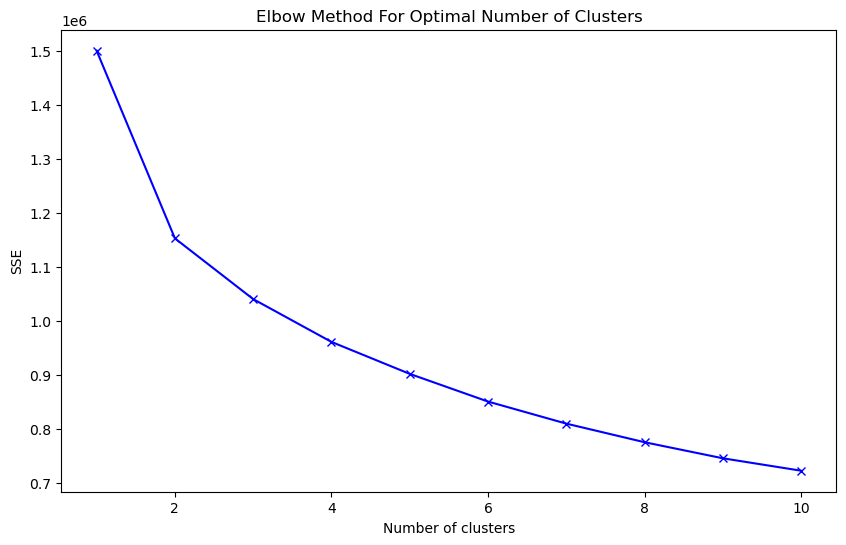

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(credit1_scaled.drop('default', axis=1))
    sse[k] = kmeans.inertia_

# Plot the SSE values to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [75]:
#NOTES II : MODEL BUILDING AND TUNING


In [76]:
#balancing the target variable 'default' using SMOTE.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, response,
                                        test_size = 0.30, random_state = 1, stratify = response)

In [78]:
response.value_counts(normalize=True)


0.0    0.987117
1.0    0.012883
Name: default, dtype: float64

In [79]:
!pip install imbalanced-learn


In [80]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state= 1, sampling_strategy=0.67)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [81]:
print('Resampled class proportion:')
print('---------------------------')
print(y_res.value_counts(normalize = True),'\n\n')
print('Original class proportion:')
print('--------------------------')
print(response.value_counts(normalize = True))

Resampled class proportion:
---------------------------
0.0    0.598804
1.0    0.401196
Name: default, dtype: float64 


Original class proportion:
--------------------------
0.0    0.987117
1.0    0.012883
Name: default, dtype: float64


In [82]:
#Building Models

In [83]:
X_train1 = X_res.copy()
X_test1 = X_test.copy()

In [84]:
# Logistic Regression Model

In [85]:
!pip install statsmodels


In [86]:
import statsmodels.api as sm

# Assuming X_train1 is already defined
X_train2 = sm.add_constant(X_train1)  # Adding a constant term (intercept)


In [87]:
import statsmodels.api as sm

# Assuming X_train1 is your training dataset without the constant term
X_train2 = sm.add_constant(X_train1)  # Adding a constant term (intercept)

# Now X_train2 contains the intercept term and can be used for modeling


In [88]:
X_train2 = sm.add_constant(X_train1)  # Adding a constant term (intercept)


In [89]:
X_test2 = sm.add_constant(X_test1)


In [90]:
logit_model = sm.Logit(y_res, X_train2)  
result_lgr = logit_model.fit()

print(result_lgr.summary())

Optimization terminated successfully.
         Current function value: 0.497893
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               115365
Model:                          Logit   Df Residuals:                   115349
Method:                           MLE   Df Model:                           15
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                  0.2607
Time:                        11:42:03   Log-Likelihood:                -57439.
converged:                       True   LL-Null:                       -77698.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                9.0585      0.402     22.52

In [91]:
#Inspecting possible correlations between independent variables to get rid of Multicollinearity.

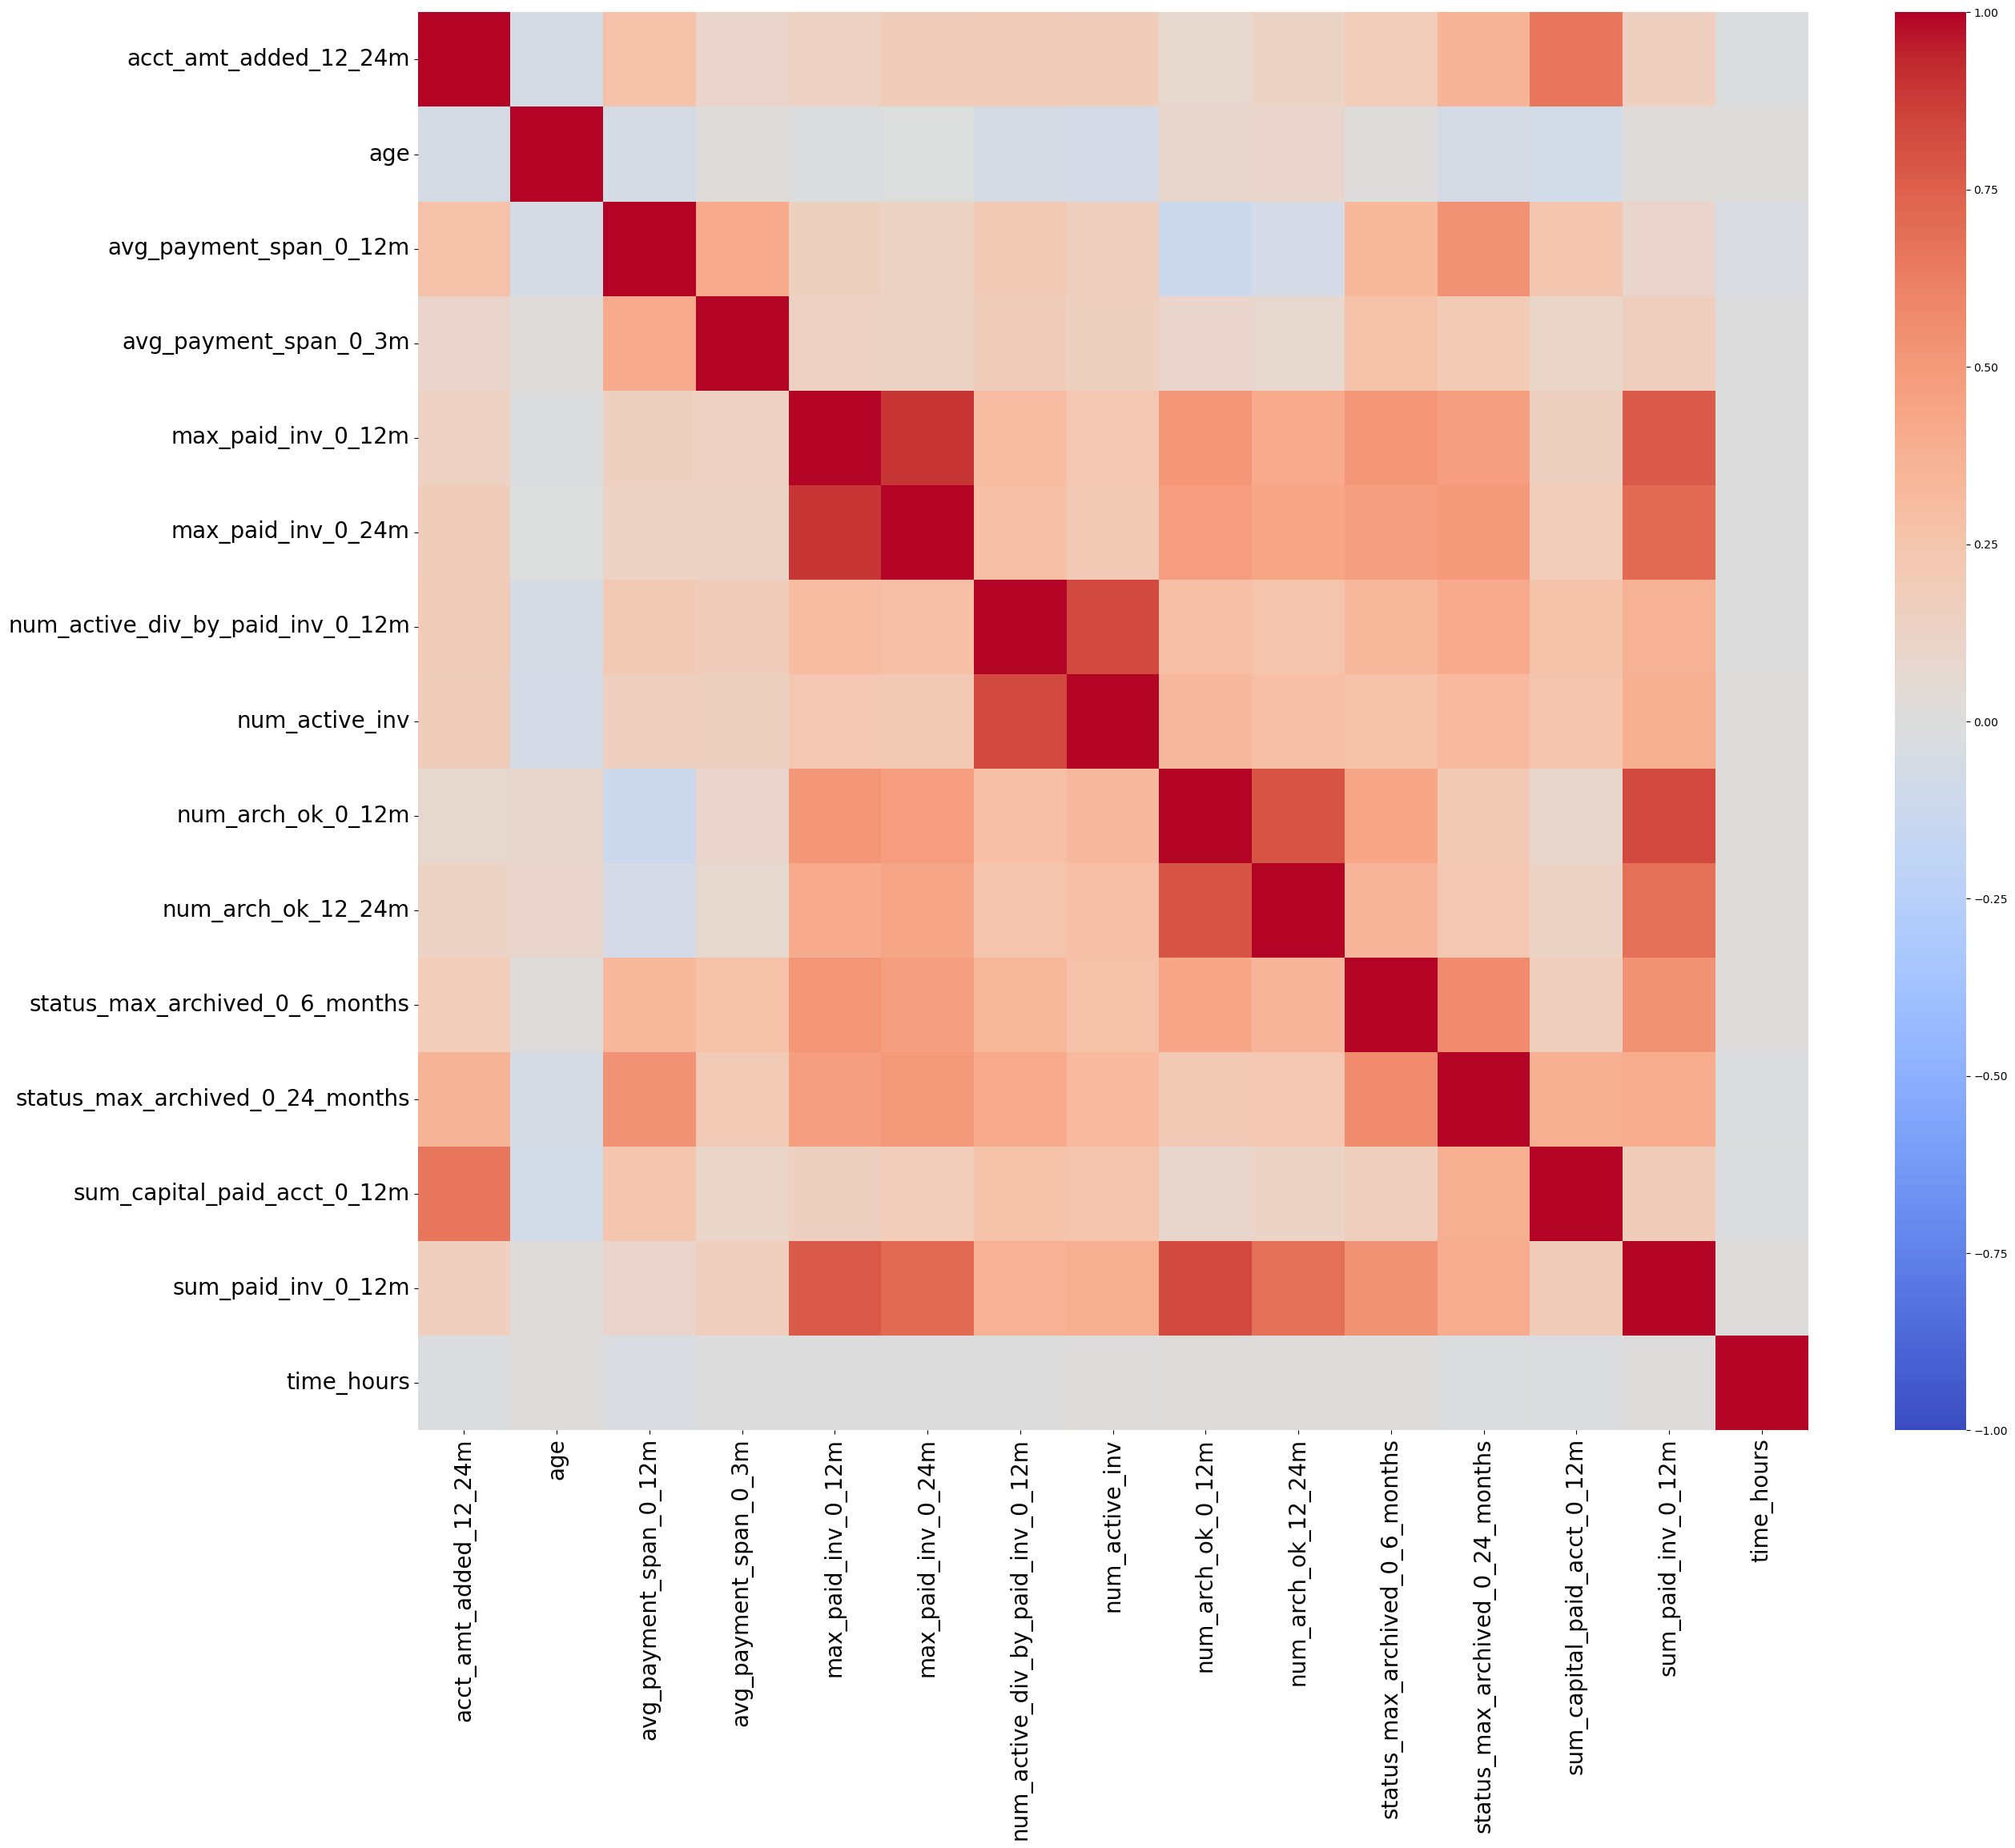

In [92]:
plt.figure(figsize = (28,23))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cor_matrix = X_train1.corr()
sns.heatmap(cor_matrix, cmap = 'coolwarm', vmin = -1, vmax= 1)
plt.show()

In [93]:
#Notice the red squares concentrated along the diagonal line, indicating high correlation. 
#To address this, we will use the Variance Inflation Factor (VIF) method to eliminate highly correlated columns.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [95]:
i= pd.Series([vif(X_train2.values, j) for j in range(X_train2.shape[1])],index=X_train2.columns)
i.sort_values(ascending =False, inplace = True)
print('VIF Values for the variables:')
print('-----------------------------')
print(i)

VIF Values for the variables:
-----------------------------
const                               2266.813876
sum_paid_inv_0_12m                     8.038395
max_paid_inv_0_12m                     7.108495
num_arch_ok_0_12m                      5.987026
max_paid_inv_0_24m                     5.444234
num_active_div_by_paid_inv_0_12m       3.706019
num_active_inv                         3.665473
num_arch_ok_12_24m                     2.903870
status_max_archived_0_24_months        2.448174
avg_payment_span_0_12m                 2.003846
status_max_archived_0_6_months         1.935996
sum_capital_paid_acct_0_12m            1.921783
acct_amt_added_12_24m                  1.851901
avg_payment_span_0_3m                  1.288695
age                                    1.035082
time_hours                             1.002298
dtype: float64


In [96]:
pseudo_r_squared = np.round(result_lgr.prsquared, 3)
print("Pseudo R-squared with all the variables present:", pseudo_r_squared)

Pseudo R-squared with all the variables present: 0.261


In [97]:
X_train3 = X_train2.drop(["sum_paid_inv_0_12m"], axis=1)
logit_model2 = sm.Logit(y_res, X_train3)  
result_lgr2 = logit_model2.fit()
pseudo_r_squared = np.round(result_lgr2.prsquared, 3)
print("Pseudo R-squared after dropping 'sum_paid_inv_0_12m':", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.500519
         Iterations 7
Pseudo R-squared after dropping 'sum_paid_inv_0_12m': 0.257


In [98]:
i= pd.Series([vif(X_train3.values, j) for j in range(X_train3.shape[1])],index=X_train3.columns)
i.sort_values(ascending =False, inplace = True)
print('VIF Values for the variables:')
print('-----------------------------')
print(i)

VIF Values for the variables:
-----------------------------
const                               2266.681227
max_paid_inv_0_12m                     5.617758
max_paid_inv_0_24m                     5.439577
num_active_div_by_paid_inv_0_12m       3.658315
num_arch_ok_0_12m                      3.550617
num_active_inv                         3.517918
num_arch_ok_12_24m                     2.882973
status_max_archived_0_24_months        2.442856
status_max_archived_0_6_months         1.935331
avg_payment_span_0_12m                 1.912313
sum_capital_paid_acct_0_12m            1.910846
acct_amt_added_12_24m                  1.851478
avg_payment_span_0_3m                  1.288403
age                                    1.033138
time_hours                             1.002177
dtype: float64


In [99]:
X_train4 = X_train3.drop(["max_paid_inv_0_12m"], axis=1)
logit_model3 = sm.Logit(y_res, X_train4)  
result_lgr3 = logit_model3.fit()
pseudo_r_squared = np.round(result_lgr3.prsquared, 3)
print("Pseudo R-squared after dropping 'max_paid_inv_0_12m':", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.500537
         Iterations 7
Pseudo R-squared after dropping 'max_paid_inv_0_12m': 0.257


In [100]:
#On dropping 'max_paid_inv_0_12m', Pseudo R-squared didnot decrese at all, 
#thus we can definitely drop 'max_paid_inv_0_12m'.

In [101]:

i= pd.Series([vif(X_train4.values, j) for j in range(X_train4.shape[1])],index=X_train4.columns)
i.sort_values(ascending =False, inplace = True)
print('VIF Values for the variables:')
print('-----------------------------')
print(i)

VIF Values for the variables:
-----------------------------
const                               2266.550521
num_active_div_by_paid_inv_0_12m       3.634548
num_active_inv                         3.506606
num_arch_ok_0_12m                      3.368427
num_arch_ok_12_24m                     2.805097
status_max_archived_0_24_months        2.440642
sum_capital_paid_acct_0_12m            1.910843
avg_payment_span_0_12m                 1.904050
status_max_archived_0_6_months         1.884529
acct_amt_added_12_24m                  1.845838
max_paid_inv_0_24m                     1.698941
avg_payment_span_0_3m                  1.288299
age                                    1.031498
time_hours                             1.002175
dtype: float64


In [102]:
y_res.value_counts()


0.0    69081
1.0    46284
Name: default, dtype: int64

In [103]:
y_test.value_counts()


0.0    29608
1.0      386
Name: default, dtype: int64

In [104]:
print(y_res.value_counts(normalize=True), y_test.value_counts(normalize=True))


0.0    0.598804
1.0    0.401196
Name: default, dtype: float64 0.0    0.987131
1.0    0.012869
Name: default, dtype: float64


In [105]:
#Logistic regression model

In [106]:
logit_model = sm.Logit(y_res, X_train4)  
result_lgr = logit_model.fit()

print(result_lgr.summary())

Optimization terminated successfully.
         Current function value: 0.500537
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               115365
Model:                          Logit   Df Residuals:                   115351
Method:                           MLE   Df Model:                           13
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                  0.2568
Time:                        11:42:09   Log-Likelihood:                -57744.
converged:                       True   LL-Null:                       -77698.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                8.9428      0.399     22.40

In [107]:
#Based on the p-value significance and multicollinearity analysis, 
#we identified redundant variables that should be removed from the training and test data. Specifically,
#the variable sum_capital_paid_acct_0_12m has a p-value of 0.729, which is greater than 0.05. This indicates that it is not significant for predicting classes and should be dropped from the model.



In [108]:
X_train1 = X_train1.drop(["sum_paid_inv_0_12m", "max_paid_inv_0_12m", "sum_capital_paid_acct_0_12m"], axis=1)
X_test1 = X_test1.drop(["sum_paid_inv_0_12m", "max_paid_inv_0_12m", "sum_capital_paid_acct_0_12m"], axis=1)

In [109]:
#lets make the modal again 

In [110]:
X_train2 = sm.add_constant(X_train1)  # Adding a constant term (intercept)


In [111]:
X_test2 = sm.add_constant(X_test1)


In [112]:
logit_model = sm.Logit(y_res, X_train2)  
result_lgr = logit_model.fit()

print(result_lgr.summary())

Optimization terminated successfully.
         Current function value: 0.500551
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               115365
Model:                          Logit   Df Residuals:                   115352
Method:                           MLE   Df Model:                           12
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                  0.2568
Time:                        11:42:10   Log-Likelihood:                -57746.
converged:                       True   LL-Null:                       -77698.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                8.9139      0.399     22.35

In [113]:
#After addressing multicollinearity, 
#we identified 10 significant variables (all with p-values < 0.05) that remain in the model. These are the final set of predictors.

In [114]:
#Prediction 

In [115]:
train_pred_lgr = result_lgr.predict(X_train2)
test_pred_lgr = result_lgr.predict(X_test2)

In [116]:
#By default, the threshold for predicting classes is set to 0.5. 
#This value balances the trade-off between the true positive rate (TPR) and the false positive rate (FPR) of the model. 
#The optimum threshold, or cut-off, is the probability that best achieves this balance. 
#We use this default threshold of 0.5 to obtain predicted classes for both the training and test data.

In [117]:
y_class_train_pred=[]   # Getting the Predicted Classes
for p in range(0,len(train_pred_lgr)):
    if np.array(train_pred_lgr)[p]>0.5:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

In [118]:
y_class_test_pred=[]
for p in range(0,len(test_pred_lgr)):
    if np.array(test_pred_lgr)[p]>0.5:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

In [119]:
#Classification report 

In [120]:
from sklearn.metrics import classification_report

print('Classification report for train data:')
print('------------------------------------')
print(classification_report(y_res, y_class_train_pred))
print('======================================================\n')
print('Classification report for test data:')
print('-----------------------------------')
print(classification_report(y_test, y_class_test_pred))


Classification report for train data:
------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79     69081
         1.0       0.69      0.66      0.68     46284

    accuracy                           0.75    115365
   macro avg       0.74      0.73      0.73    115365
weighted avg       0.75      0.75      0.75    115365


Classification report for test data:
-----------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89     29608
         1.0       0.04      0.68      0.08       386

    accuracy                           0.81     29994
   macro avg       0.52      0.74      0.49     29994
weighted avg       0.98      0.81      0.88     29994



In [121]:
#Optimum threshold or cut off means choosing a threshold probability that best balances the trade-off between the true positive rate(TPR) and the false positive rate(FPR) of the model.
#By default this value is 0.5.

In [122]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_res, train_pred_lgr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.3995082659056441


In [123]:
#Getting predicted classes for train and test data on the optimum threshold of 0.4


In [124]:
y_class_train_pred=[]
for i in range(0,len(train_pred_lgr)):
    if np.array(train_pred_lgr)[i]>0.4:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

In [125]:
y_class_test_pred=[]
for i in range(0,len(test_pred_lgr)):
    if np.array(test_pred_lgr)[i]>0.4:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

In [126]:
from sklearn.metrics import classification_report

print('Updated classification_report for train data:')
print('--------------------------------------------')
print(classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76     69081
         1.0       0.64      0.80      0.71     46284

    accuracy                           0.74    115365
   macro avg       0.74      0.75      0.74    115365
weighted avg       0.76      0.74      0.74    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82     29608
         1.0       0.03      0.80      0.06       386

    accuracy                           0.70     29994
   macro avg       0.51      0.75      0.44     29994
weighted avg       0.98      0.70      0.81     29994



In [127]:
#Updated Confusion matrix for the train data based on optimum threshold of 0.4:


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


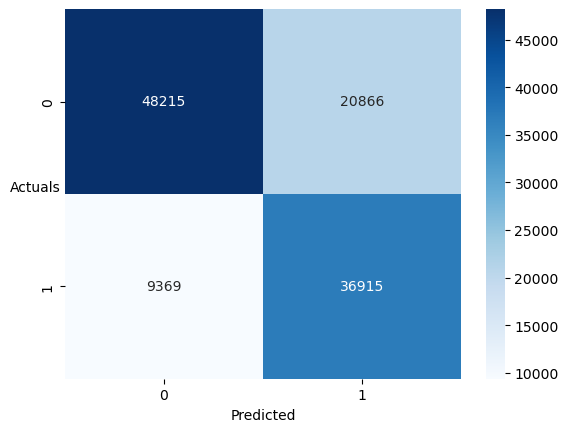

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_res, y_class_train_pred)
sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.show()


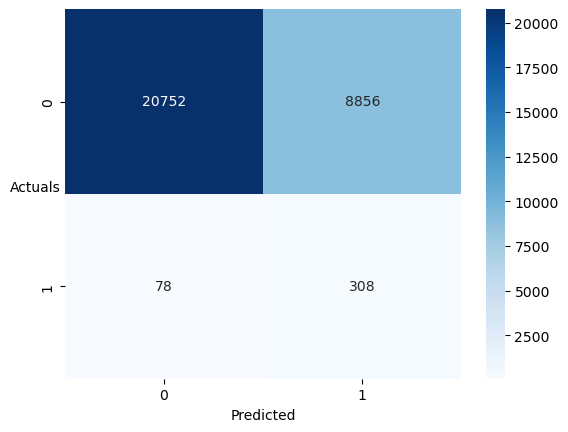

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_class_test_pred are already defined
cm_test = confusion_matrix(y_test, y_class_test_pred)
sns.heatmap(cm_test, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.show()


AUC for training data: 0.823


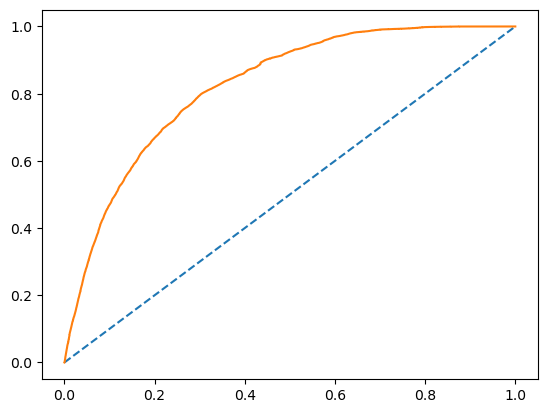

In [131]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# calculate AUC
train_auc = roc_auc_score(y_res, train_pred_lgr)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, train_pred_lgr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [132]:
#AUC and ROC for the testing data:


AUC for testing data: 0.831


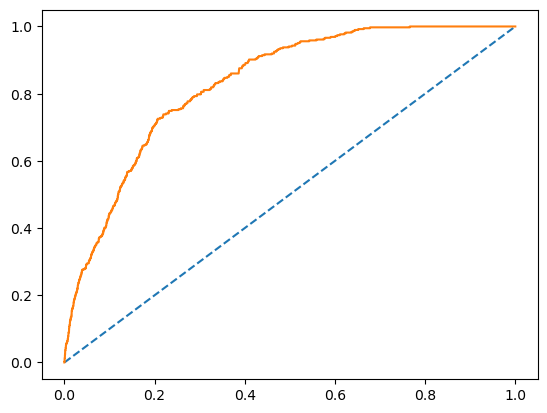

In [133]:
test_auc = roc_auc_score(y_test, test_pred_lgr)
print('AUC for testing data: %.3f' % test_auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred_lgr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [134]:
#LDA(Linear Discriminant Analysis) Model:

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train1,y_res)

In [136]:
print('The intercept value for the linear discriminant function is:',np.round(clf.intercept_,2))


The intercept value for the linear discriminant function is: [9.23]


In [137]:
print('Coefficients for the Linear Discriminant Function are:\n\n',np.round(clf.coef_,2))


Coefficients for the Linear Discriminant Function are:

 [[  0.    -0.03   0.08  -0.72  -0.   -17.81   1.21  -0.1   -0.11  -0.16
    0.29  -0.02]]


In [138]:
X_train1.columns


Index(['acct_amt_added_12_24m', 'age', 'avg_payment_span_0_12m',
       'avg_payment_span_0_3m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_24_months',
       'time_hours'],
      dtype='object')

In [139]:
#Predicting on Train and Test data using the trained LDA model:


In [140]:
train_pred_lda = lda_model.predict(X_train1)
test_pred_lda = lda_model.predict(X_test1)

In [141]:
print('classification_report for train data:')
print('------------------------------------')
print(classification_report(y_res,train_pred_lda))
print('======================================================\n')
print('classification_report for test data:')
print('-----------------------------------')
print(classification_report(y_test,test_pred_lda))

classification_report for train data:
------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79     69081
         1.0       0.69      0.65      0.67     46284

    accuracy                           0.74    115365
   macro avg       0.73      0.73      0.73    115365
weighted avg       0.74      0.74      0.74    115365


classification_report for test data:
-----------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89     29608
         1.0       0.04      0.66      0.08       386

    accuracy                           0.81     29994
   macro avg       0.52      0.74      0.49     29994
weighted avg       0.98      0.81      0.88     29994



In [142]:
#Model tuning using Hyper-parameters optimisation:


In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


In [144]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
grid = {
    'solver': ['lsqr', 'eigen'],  # Solvers for covariance estimation
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Shrinkage parameter (if solver='lsqr')
    'n_components': [None, 1, 2, 3],  # Number of components to keep
}

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Initialize GridSearchCV with single job
grid_search = GridSearchCV(estimator=lda, param_grid=grid, cv=5, scoring='accuracy', n_jobs=1)

# Fit GridSearchCV
grid_search.fit(X_train1, y_res)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 576, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_messag

Best parameters found:  {'n_components': None, 'shrinkage': None, 'solver': 'lsqr'}
Best accuracy score:  0.7435444025484333


In [145]:
grid = {
    'solver': ['lsqr', 'eigen'],  # Solvers for covariance estimation
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Shrinkage parameter (if solver='lsqr')
    'n_components': [None, 1, 2, 3],  # Number of components to keep
}


In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

lda = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator=lda, param_grid=grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train1, y_res)


/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gauravbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 576, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_messag

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=1,
             param_grid={'n_components': [None, 1, 2, 3],
                         'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
                         'solver': ['lsqr', 'eigen']},
             scoring='accuracy')

In [147]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best parameters found:  {'n_components': None, 'shrinkage': None, 'solver': 'lsqr'}
Best accuracy score:  0.7435444025484333


In [148]:
lda_best_model = grid_search.best_estimator_


In [149]:
train_pred_lda_best = lda_best_model.predict(X_train1)
test_pred_lda_best = lda_best_model.predict(X_test1)

In [150]:
print('classification_report for train data:')
print('------------------------------------')
print(classification_report(y_res,train_pred_lda_best))
print('======================================================\n')
print('classification_report for test data:')
print('-----------------------------------')
print(classification_report(y_test,test_pred_lda_best))

classification_report for train data:
------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79     69081
         1.0       0.69      0.65      0.67     46284

    accuracy                           0.74    115365
   macro avg       0.73      0.73      0.73    115365
weighted avg       0.74      0.74      0.74    115365


classification_report for test data:
-----------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89     29608
         1.0       0.04      0.66      0.08       386

    accuracy                           0.81     29994
   macro avg       0.52      0.74      0.49     29994
weighted avg       0.98      0.81      0.88     29994



In [151]:
train_probs_lda_best = lda_best_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_lda_best = lda_best_model.predict_proba(X_test1)[:,1]

In [152]:
#Model tuning using Performance Metrics based on optimum cut-off (threshold value

In [153]:
#Choosing the optimal threshold

fpr, tpr, thresholds = roc_curve(y_res, train_probs_lda_best)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)


The optimum Cut-off value is: 0.3818388200547485


In [154]:
#Updated Confusion matrix for the train and test data based on optimum cut-off of 0.395:


In [155]:
y_class_train_pred=[]
for i in range(0,len(train_probs_lda_best)):
    if np.array(train_probs_lda_best)[i]>0.395:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

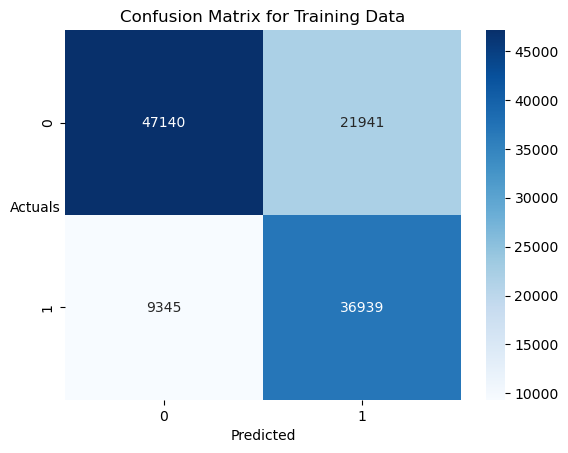

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_res, y_class_train_pred)
sns.heatmap(cm_train, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Training Data')
plt.show()


In [157]:
#Updated Confusion matrix for the test data based on optimum cut-off of 0.395:


In [158]:
y_class_test_pred=[]
for i in range(0,len(test_probs_lda_best)):
    if np.array(test_probs_lda_best)[i]>0.395:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

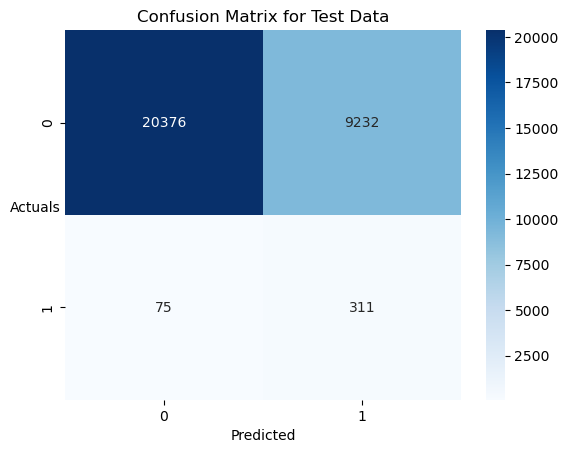

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_class_test_pred are already defined
cm_test = confusion_matrix(y_test, y_class_test_pred)
sns.heatmap(cm_test, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Test Data')
plt.show()


In [160]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75     69081
         1.0       0.63      0.80      0.70     46284

    accuracy                           0.73    115365
   macro avg       0.73      0.74      0.73    115365
weighted avg       0.75      0.73      0.73    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81     29608
         1.0       0.03      0.81      0.06       386

    accuracy                           0.69     29994
   macro avg       0.51      0.75      0.44     29994
weighted avg       0.98      0.69      0.80     29994



In [161]:
#AUC and ROC for the train data:


AUC for training data: 0.819


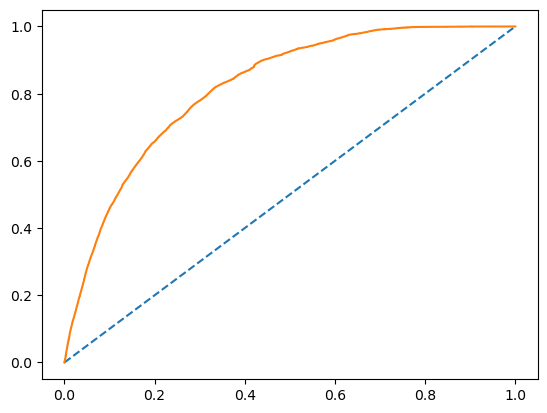

In [162]:
# calculate AUC
train_auc = roc_auc_score(y_res, train_probs_lda_best)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, train_probs_lda_best)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC for testing data: 0.829


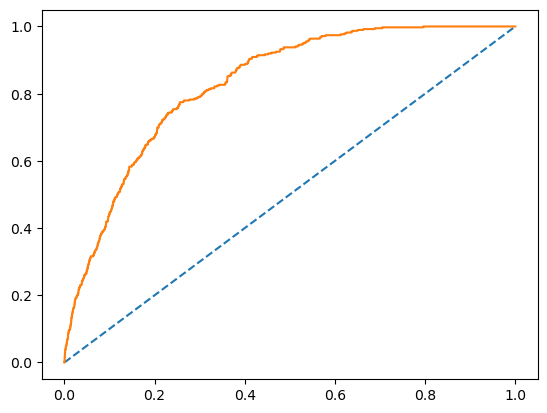

In [163]:
#AUC and ROC for the testing data:

test_auc = roc_auc_score(y_test, test_probs_lda_best)
print('AUC for testing data: %.3f' % test_auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs_lda_best)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [164]:
#3.) Bagging


In [165]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


bag_model = BaggingClassifier(base_estimator= RandomForestClassifier(),n_estimators=50,random_state=1)

bag_model.fit(X_train1, y_res)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=1)

In [166]:
train_pred_bag = bag_model.predict(X_train1)
test_pred_bag = bag_model.predict(X_test1)

In [167]:
#Now checking the model performance on train and test data:
#Model performance (Bag_rf) on the Train and Test Data

In [168]:
print('train data:')
print('-----------')
print(classification_report(y_res, train_pred_bag))
print('======================================================')
print('test data:')
print('----------')
print(classification_report(y_test,test_pred_bag))

train data:
-----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     69081
         1.0       0.99      0.99      0.99     46284

    accuracy                           0.99    115365
   macro avg       0.99      0.99      0.99    115365
weighted avg       0.99      0.99      0.99    115365

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     29608
         1.0       0.05      0.09      0.06       386

    accuracy                           0.96     29994
   macro avg       0.52      0.53      0.52     29994
weighted avg       0.98      0.96      0.97     29994



In [169]:
#Tuning the base model based on optimum threshold value:


In [170]:
#Getting the Predicted Classes and Probabilities:


In [171]:
train_probs_bag = bag_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_bag = bag_model.predict_proba(X_test1)[:,1]

In [172]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_bag)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.3962272920129756


In [173]:
#Updated Confusion matrix for the train and test data based on optimum cut-off of 0.4:


In [174]:
y_class_train_pred=[]
for i in range(0,len(train_probs_bag)):
    if np.array(train_probs_bag)[i]>0.4:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

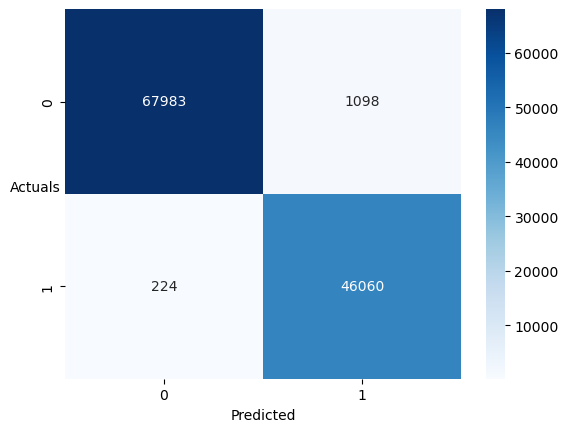

In [175]:
sns.heatmap((confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [176]:
#Updated Confusion matrix for the test data based on optimum cut-off of 0.4:


In [177]:
y_class_test_pred=[]
for i in range(0,len(test_probs_bag)):
    if np.array(test_probs_bag)[i]>0.4:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

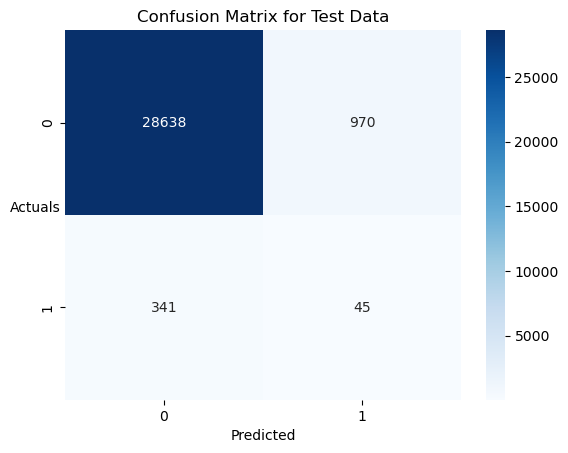

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_class_test_pred are already defined
cm_test = confusion_matrix(y_test, y_class_test_pred)
sns.heatmap(cm_test, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Test Data')
plt.show()


In [179]:
#Updated Classification report for the train and test data:


In [180]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     69081
         1.0       0.98      1.00      0.99     46284

    accuracy                           0.99    115365
   macro avg       0.99      0.99      0.99    115365
weighted avg       0.99      0.99      0.99    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     29608
         1.0       0.04      0.12      0.06       386

    accuracy                           0.96     29994
   macro avg       0.52      0.54      0.52     29994
weighted avg       0.98      0.96      0.97     29994



In [181]:
#AUC and ROC for the train data

AUC for training data: 1.000


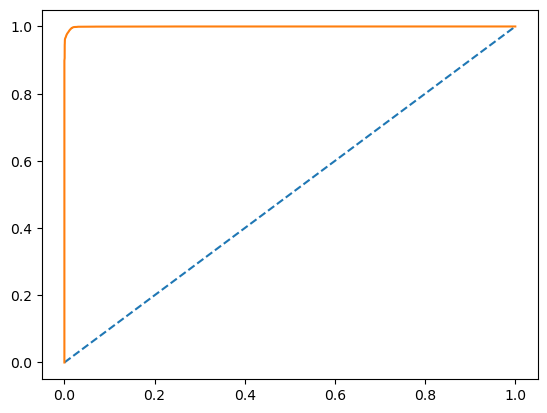

In [182]:
# predict probabilities
probs = bag_model.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [183]:
#AUC and ROC for the test data:


AUC for testing data: 0.799


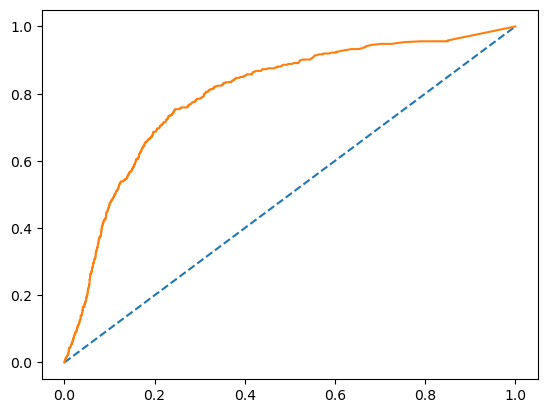

In [184]:
# predict probabilities
probs = bag_model.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [185]:
#4 Boosting


In [186]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
#4 ADA Boosting


In [188]:
adaboost_model = AdaBoostClassifier(random_state=1)
adaboost_model.fit(X_train1,y_res)

AdaBoostClassifier(random_state=1)

In [189]:
#Predicting on Train and Test data using the trained Naive Bayes model:
train_pred_ada = adaboost_model.predict(X_train1)
test_pred_ada = adaboost_model.predict(X_test1)

In [190]:
#Model performance (ada_boost) on the Train and Test Data


In [191]:
print('train data:\n===========\n')
print('Accuracy score on training data:\n-------------------------------\n', 
      adaboost_model.score(X_train1, y_res))
print('\n')
print('Classification Report:\n----------------------\n', 
      classification_report(y_res, train_pred_ada))

print('\n')

print('test data:\n===========\n')
print('Accuracy score on testing data:\n-------------------------------\n', 
      adaboost_model.score(X_test1, y_test))
print('\n')
print('Classification Report:\n----------------------\n', 
      classification_report(y_test, test_pred_ada))

train data:

Accuracy score on training data:
-------------------------------
 0.851488753088025


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     69081
         1.0       0.80      0.83      0.82     46284

    accuracy                           0.85    115365
   macro avg       0.84      0.85      0.85    115365
weighted avg       0.85      0.85      0.85    115365



test data:

Accuracy score on testing data:
-------------------------------
 0.8610722144428886


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.92     29608
         1.0       0.05      0.52      0.09       386

    accuracy                           0.86     29994
   macro avg       0.52      0.69      0.51     29994
weighted avg       0.98      0.86      0.91     29994



In [192]:
#Model Tuning:


In [193]:
adaboost_model.get_params().keys()


dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [194]:
grid={'n_estimators': [30, 50, 70],
    'learning_rate':[0.01,0.1,1],
     'algorithm': ['SAMME', 'SAMME.R']}

In [195]:
grid_search = GridSearchCV(estimator = adaboost_model, param_grid = grid, cv = 7, n_jobs=-1)


In [196]:
grid_search.fit(X_train1, y_res)


GridSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [30, 50, 70]})

In [197]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 70} 

AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state=1)


In [198]:
ada_best_model = grid_search.best_estimator_


In [199]:
train_pred_ada_best = ada_best_model.predict(X_train1)
test_pred_ada_best = ada_best_model.predict(X_test1)

In [201]:
print('train data:')
print('-----------')
print(classification_report(y_res, train_pred_ada_best))
print('======================================================')
print('test data:')
print('----------')
print(classification_report(y_test,test_pred_ada_best))

train data:
-----------
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     69081
         1.0       0.83      0.83      0.83     46284

    accuracy                           0.86    115365
   macro avg       0.86      0.86      0.86    115365
weighted avg       0.86      0.86      0.86    115365

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     29608
         1.0       0.05      0.44      0.09       386

    accuracy                           0.88     29994
   macro avg       0.52      0.66      0.51     29994
weighted avg       0.98      0.88      0.93     29994



In [202]:
train_probs_ada = adaboost_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_ada = adaboost_model.predict_proba(X_test1)[:,1]

In [203]:
#Model tuning using Performance Metrics based on optimum cut-off (threshold value):


In [204]:
#Choosing the optimal threshold


In [205]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_ada)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.49734188090819065


In [207]:
#Updated Confusion matrix for the train data based on optimum cut-off of 0.497



In [208]:
y_class_train_pred=[]
for i in range(0,len(train_probs_ada)):
    if np.array(train_probs_ada)[i]>0.497:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

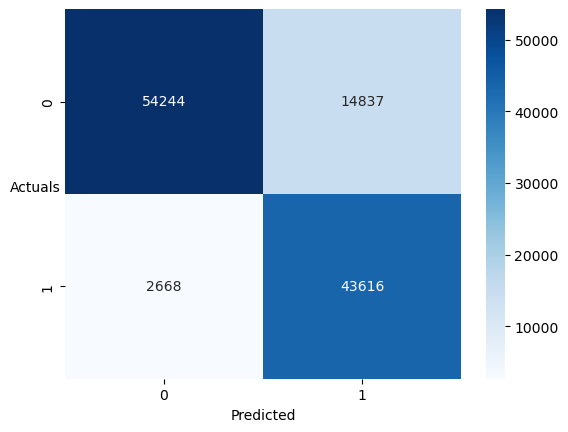

In [210]:
sns.heatmap((confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [211]:
#Updated Confusion matrix for the test data based on optimum cut-off of 0.497:


In [212]:
y_class_test_pred=[]
for i in range(0,len(test_probs_ada)):
    if np.array(test_probs_ada)[i]>0.498:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

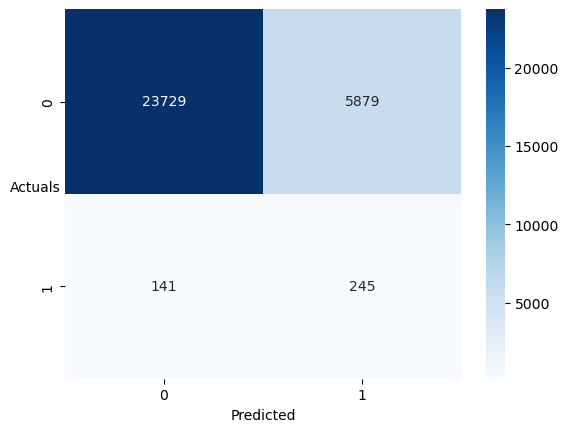

In [213]:
sns.heatmap((confusion_matrix(y_test,y_class_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [214]:
#Updated Classification report for the train and test data:


In [216]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86     69081
         1.0       0.75      0.94      0.83     46284

    accuracy                           0.85    115365
   macro avg       0.85      0.86      0.85    115365
weighted avg       0.87      0.85      0.85    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89     29608
         1.0       0.04      0.63      0.08       386

    accuracy                           0.80     29994
   macro avg       0.52      0.72      0.48     29994
weighted avg       0.98      0.80      0.88     29994



In [217]:
#AUC and ROC for the tuned train data:


AUC for training data: 0.951


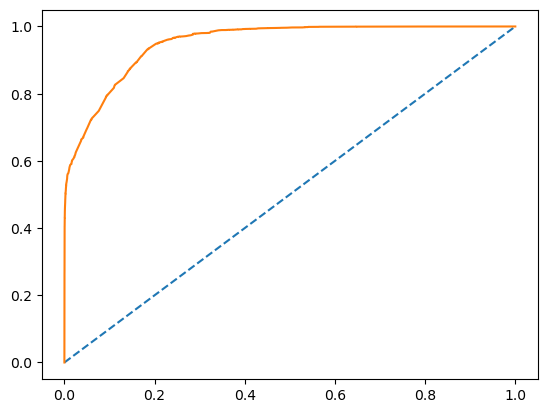

In [218]:
# predict probabilities
probs = ada_best_model.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [219]:
#for Test 

AUC for testing data: 0.823


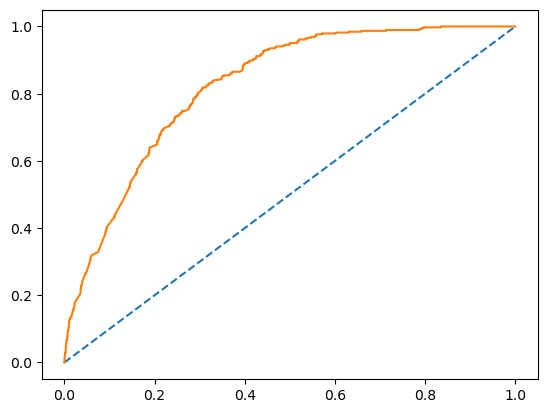

In [220]:
# predict probabilities
probs = ada_best_model.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [221]:
#Feature importances for ADA Boosting model:


In [222]:
print (pd.DataFrame(adaboost_model.feature_importances_, columns = ["Imp"], index = X_train1.columns).sort_values('Imp',ascending=False))


                                   Imp
num_active_inv                    0.24
avg_payment_span_0_3m             0.18
status_max_archived_0_24_months   0.14
age                               0.08
num_arch_ok_0_12m                 0.08
status_max_archived_0_6_months    0.08
avg_payment_span_0_12m            0.04
max_paid_inv_0_24m                0.04
num_active_div_by_paid_inv_0_12m  0.04
num_arch_ok_12_24m                0.04
time_hours                        0.04
acct_amt_added_12_24m             0.00


In [224]:
# Gradient Boosting:


In [225]:
#Predicting on Train and Test data:

gradboost_model = GradientBoostingClassifier(random_state=1)
gradboost_model.fit(X_train1,y_res)

GradientBoostingClassifier(random_state=1)

In [226]:
train_pred_grad = gradboost_model.predict(X_train1)
test_pred_grad = gradboost_model.predict(X_test1)

In [227]:
#Now checking the model performance (grad_boost) on train and test data:


In [229]:
print('Accuracy score on training data is:', gradboost_model.score(X_train1, y_res))
print('\n')
print(classification_report(y_res, train_pred_ada))

Accuracy score on training data is: 0.8915875698868808


              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     69081
         1.0       0.80      0.83      0.82     46284

    accuracy                           0.85    115365
   macro avg       0.84      0.85      0.85    115365
weighted avg       0.85      0.85      0.85    115365



In [230]:
#Model performance on the Test Data


In [232]:
print('Accuracy score on testing data is:', gradboost_model.score(X_test1, y_test))
print('\n')
print(classification_report(y_test, test_pred_ada))

Accuracy score on testing data is: 0.9008468360338734


              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92     29608
         1.0       0.05      0.52      0.09       386

    accuracy                           0.86     29994
   macro avg       0.52      0.69      0.51     29994
weighted avg       0.98      0.86      0.91     29994



In [244]:
#Model Tuning:


In [233]:
gradboost_model.get_params().keys()


dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [234]:
grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
}

In [235]:
grid_search = GridSearchCV(estimator = gradboost_model, param_grid = grid, cv = 3, n_jobs=-1)


In [236]:
grid_search.fit(X_train1, y_res)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [237]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300} 

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=300,
                           random_state=1)


In [238]:
grad_best_model = grid_search.best_estimator_


In [239]:
train_pred_grad_best = grad_best_model.predict(X_train1)
test_pred_grad_best = grad_best_model.predict(X_test1)

In [240]:
#Now checking the model performance on train and test data:


In [241]:
#Model performance on the Train and Test Data


In [243]:
print('train data:')
print('-----------')
print(classification_report(y_res, train_pred_grad_best))
print('======================================================')
print('test data:')
print('----------')
print(classification_report(y_test,test_pred_grad_best))

train data:
-----------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     69081
         1.0       0.98      0.96      0.97     46284

    accuracy                           0.98    115365
   macro avg       0.98      0.98      0.98    115365
weighted avg       0.98      0.98      0.98    115365

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     29608
         1.0       0.06      0.06      0.06       386

    accuracy                           0.97     29994
   macro avg       0.52      0.53      0.52     29994
weighted avg       0.98      0.97      0.98     29994



In [245]:
#Getting the Predicted Classes and Probabilities:


In [246]:
train_probs_grad = gradboost_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_grad = gradboost_model.predict_proba(X_test1)[:,1]

In [247]:
#Model tuning using Performance Metrics based on optimum cut-off (threshold value):


In [248]:
#Choosing the optimal threshold


In [249]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_grad)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.4205018516656461


In [250]:
#Updated Confusion matrix for the train and test data based on optimum cut-off of 0.420:


In [251]:
y_class_train_pred=[]
for i in range(0,len(train_probs_grad)):
    if np.array(train_probs_grad)[i]>0.456:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

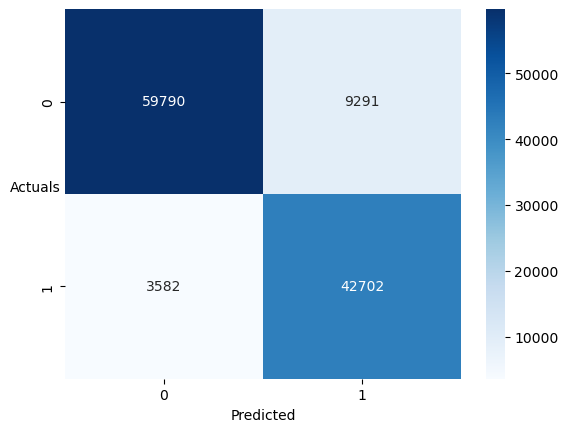

In [253]:
sns.heatmap((confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [254]:
#for test 

In [255]:
y_class_test_pred=[]
for i in range(0,len(test_probs_grad)):
    if np.array(test_probs_grad)[i]>0.456:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

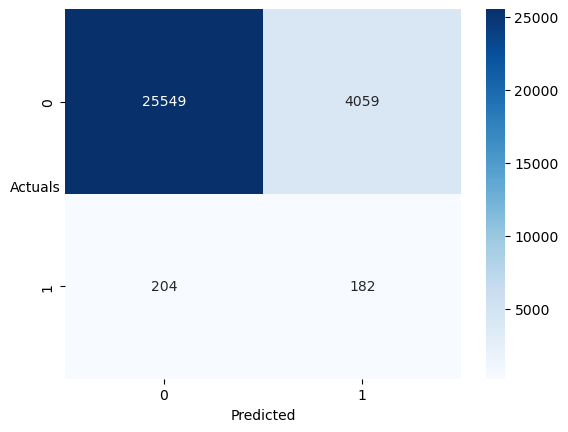

In [256]:
sns.heatmap((confusion_matrix(y_test,y_class_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [257]:
#Updated Classification report for the train and test data:


In [258]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     69081
         1.0       0.82      0.92      0.87     46284

    accuracy                           0.89    115365
   macro avg       0.88      0.89      0.89    115365
weighted avg       0.89      0.89      0.89    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     29608
         1.0       0.04      0.47      0.08       386

    accuracy                           0.86     29994
   macro avg       0.52      0.67      0.50     29994
weighted avg       0.98      0.86      0.91     29994



In [259]:
#AUC and ROC for the train data:


AUC for training data: 0.969


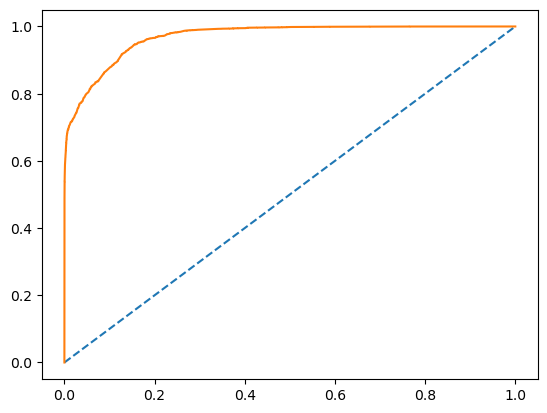

In [260]:
# predict probabilities
probs = gradboost_model.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [261]:
#AUC and ROC for the test data:


AUC for testing data: 0.824


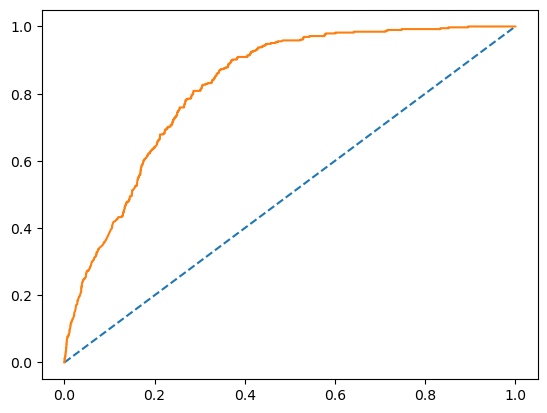

In [262]:
# predict probabilities
probs = gradboost_model.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [263]:
#Confusion Matrix for the best model:


In [264]:
y_class_train_pred=[]
for i in range(0,len(train_probs_grad)):
    if np.array(train_probs_grad)[i]>0.5:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

In [265]:
y_class_test_pred=[]
for i in range(0,len(test_probs_grad)):
    if np.array(test_probs_grad)[i]>0.5:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

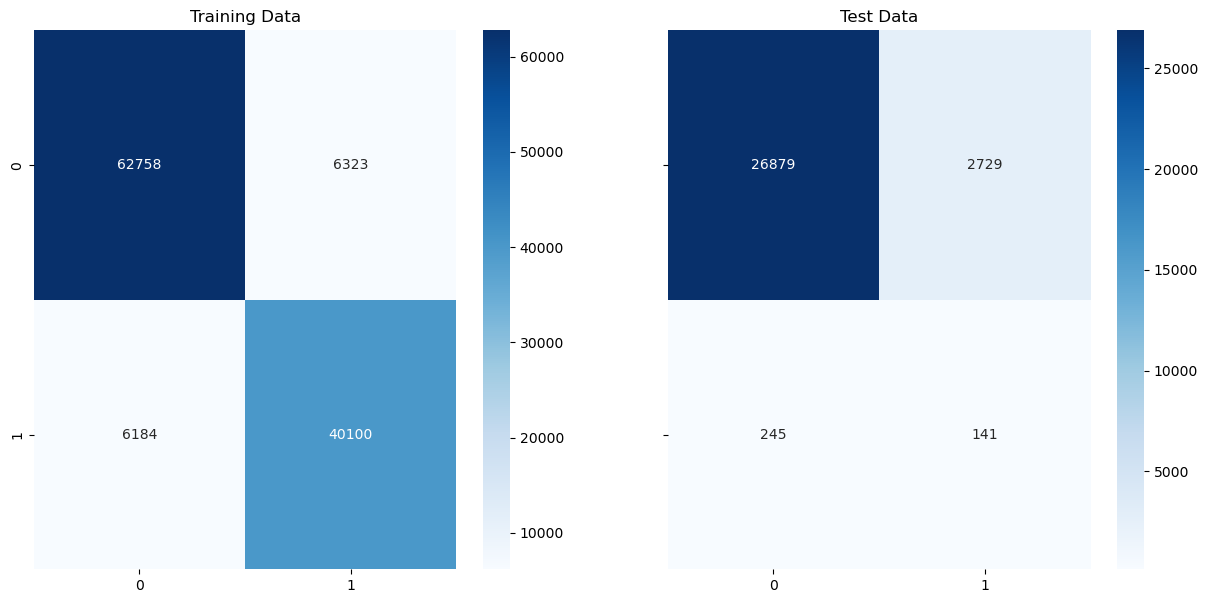

In [267]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_res,train_pred_grad)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,test_pred_grad)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [268]:
#Feature importances for the Gradient Boosting model:


In [269]:
print (pd.DataFrame(gradboost_model.feature_importances_, columns = ["Imp"], index = X_train1.columns).sort_values('Imp',ascending=False))


                                       Imp
num_active_inv                    0.196141
status_max_archived_0_24_months   0.181955
num_arch_ok_0_12m                 0.163403
avg_payment_span_0_3m             0.134939
num_arch_ok_12_24m                0.121887
age                               0.066404
num_active_div_by_paid_inv_0_12m  0.040084
avg_payment_span_0_12m            0.034558
max_paid_inv_0_24m                0.024085
status_max_archived_0_6_months    0.018555
time_hours                        0.016542
acct_amt_added_12_24m             0.001447
